# Introduction 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/user/r_d/data/fifa_players.csv")

In [3]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_position', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_loaned_from',
       'club_joined', 'club_jersey_number', 'club_contract_valid_until',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_spe

# Analytical block 

Цей блок можна виконувати як з використанням pandas та групових операцій в цьому пакеті (group by, order, limit), так і завантаживши датафрейм в SQL database та пишучи запити мовою SQL:

1. Топ 100 гравців з найвищим рейтингом. (1 бал)

2. Топ 100 гравців з найвищими зарплатами. Порівняти з п.1 чи відповідають гравці з найвищими рейтингами найвищим зарплатам і навпаки. (1 бал)

3. Топ 30 воротарів з найвищим рейтингом. (1 бал)

4. Топ 30 команд з гравцями найвищого рейтингу в середньому.(1 бал)

5. Топ 30 команд в яких в середньому гравці мають найбільшу швидкість. (1 бал)

6. Топ усіх Ліг в яких зібрані найкращі дриблери. (dribbling) (2 бали)

7. Топ 30 команд з гравцями найвищого рейтингу враховуючи, що команда складається з 11 гравців, серед яких обовʼязково 1 воротар, 4 захисники, 4 півзахисники, 2 нападники. (3 бали)

In [4]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                      6                    11                   15   
1                     15                     6                   12   
2                      7                    11                   15   
3                      9                     9                   15   
4                     15                    13                    5   
...                  ...                   ...                  ...   
19234                  6                    10                    5   
19235                 11                    12                    6   
19236                  8                     6                    7   
19237                  7                    10                    7   
19238                  8                    13                   13   

      goalkeeping_positioning  goalkeeping_reflexes goalkeeping_speed  \
0                          14                     8               NaN   
1                           8                    10               NaN   
2                          14                    11               NaN   
3                          15                    11               NaN   
4                          10                    13               NaN   
...                       ...                   ...               ...   
19234                      15                   

In [5]:
df['club_position']

0         RW
1         ST
2         ST
3         LW
4        RCM
        ... 
19234    SUB
19235    RES
19236    RES
19237    RES
19238    SUB
Name: club_position, Length: 19239, dtype: object

Overall stands for the overall rating. So the best 100 players are:

In [6]:
df_overall = df.sort_values(by='overall', ascending=False)

df_overall[['short_name', 'overall']].head(100)

short_name  overall
0             L. Messi       93
1       R. Lewandowski       92
2    Cristiano Ronaldo       91
3            Neymar Jr       91
4         K. De Bruyne       91
..                 ...      ...
80           K. Walker       85
81       P. Aubameyang       85
130         J. Giménez       84
120             Felipe       84
121        Y. Carrasco       84

[100 rows x 2 columns]

We can see above taht the fisrt 81 players have an overall rating 85 and higher, but at least the next 50 players have a rating of 84. So we will create a dictionary of sets where the key is the overall rating and the value is a set of player names for players who have that rating,

In [7]:
filtered_df = df[df['overall'] >= 84]

players_by_rating = {
    rating: set(filtered_df[filtered_df['overall'] == rating]['short_name'])
    for rating in sorted(filtered_df['overall'].unique(), reverse=True)
}

for rating, players in players_by_rating.items():
    print(f"Overall rating {rating}: {players}")

players_high_rating = [player for players in players_by_rating.values() for player in players]

Overall rating 93: {'L. Messi'}
Overall rating 92: {'R. Lewandowski'}
Overall rating 91: {'K. Mbappé', 'J. Oblak', 'Cristiano Ronaldo', 'K. De Bruyne', 'Neymar Jr'}
Overall rating 90: {'M. ter Stegen', 'M. Neuer', 'N. Kanté', 'H. Kane'}
Overall rating 89: {'M. Salah', 'Ederson', 'T. Courtois', 'J. Kimmich', 'H. Son', 'V. van Dijk', 'S. Mané', 'Casemiro', 'K. Benzema', 'G. Donnarumma', 'Alisson'}
Overall rating 88: {'T. Kroos', 'E. Haaland', 'R. Lukaku', 'R. Sterling', 'L. Suárez', 'Bruno Fernandes', 'K. Navas', 'Sergio Ramos'}
Overall rating 87: {'T. Alexander-Arnold', 'J. Sancho', 'W. Szczęsny', 'T. Müller', 'A. Robertson', 'Rúben Dias', 'P. Dybala', 'Marquinhos', 'L. Goretzka', 'Á. Di María', 'M. Verratti', 'F. de Jong', 'S. Agüero', 'H. Lloris', 'C. Immobile', 'P. Pogba', 'L. Modrić'}
Overall rating 86: {'Bernardo Silva', 'Jordi Alba', 'Marcos Llorente', 'K. Casteels', 'J. Vardy', 'L. Insigne', 'Parejo', 'Fabinho', 'S. Handanovič', 'João Cancelo', 'A. Laporte', 'R. Varane', 'R. Mahr

Топ 100 гравців з найвищими зарплатами. Порівняти з п.1 чи відповідають гравці з найвищими рейтингами найвищим зарплатам і навпаки. (1 бал)

In [8]:
df_overall = df.sort_values(by='wage_eur', ascending=False)

df_overall[['short_name', 'wage_eur']].head(100)

short_name  wage_eur
4    K. De Bruyne  350000.0
11     K. Benzema  350000.0
0        L. Messi  320000.0
14       Casemiro  310000.0
24       T. Kroos  310000.0
..            ...       ...
631      L. Jović  130000.0
158      J. Matip  130000.0
26       K. Navas  130000.0
31      H. Lloris  125000.0
436     S. Umtiti  125000.0

[100 rows x 2 columns]

So straight away we can see that Messi, who has the highest rating, is in top 3 for the salary, but he doesn't have the highest wage. There are other players with the highest rating, but they don't have the highest wage. So we can coclude that other factors impact the salary, like the club they are playing for. 

In [9]:
goalkeepers = df[df['player_positions'].str.contains('GK', na=False)]

goalkeepers_overall = goalkeepers.sort_values(by='overall', ascending=False)

goalkeepers_overall[['short_name', 'player_positions', 'overall']].head(30)

short_name player_positions  overall
5             J. Oblak               GK       91
8        M. ter Stegen               GK       90
7             M. Neuer               GK       90
12         T. Courtois               GK       89
18             Ederson               GK       89
20             Alisson               GK       89
21       G. Donnarumma               GK       89
26            K. Navas               GK       88
31           H. Lloris               GK       87
34         W. Szczęsny               GK       87
54         K. Casteels               GK       86
48       S. Handanovič               GK       86
70       K. Schmeichel               GK       85
73           Y. Sommer               GK       85
77          P. Gulácsi               GK       85
106             De Gea               GK       84
113        E. Martínez               GK       84
127         M. Maignan               GK       84
167            N. Pope               GK       83
194           É. Mendy               GK       83
169        J. Pickford               GK       83
154            B. Leno               GK       83
152        L. Hrádecký               GK       83
143      Sergio Asenjo               GK       83
222               Neto               GK       82
282       D. Livaković               GK       82
267         Unai Simón               GK       82
265  Raphaelinho Anjos               GK       82
243         P. Gollini               GK       82
226           A. Lopes               GK       82

In [10]:
columns_needed = ['club_name', 'short_name', 'overall', 'pace', 'movement_acceleration', 'movement_sprint_speed']
df_filtered = df[columns_needed]

# group players by their club name, and then add columns representing the average overall rating and average pace of the players in the club

clubs = df_filtered.groupby('club_name').agg(
    players=('short_name', lambda x: ', '.join(x)),  
    player_count=('short_name', 'count'),
    avg_overall=('overall', 'mean'),  
    avg_pace=('pace', 'mean'),  
    avg_movement_acceleration = ('movement_acceleration', 'mean'),
    avg_movement_sprint_speed = ('movement_sprint_speed', 'mean')
).reset_index()

clubs

club_name  \
0        1. FC Heidenheim 1846   
1         1. FC Kaiserslautern   
2                   1. FC Köln   
3              1. FC Magdeburg   
4               1. FC Nürnberg   
..                         ...   
696                  Örebro SK   
697              Östersunds FK   
698     İstanbul Başakşehir FK   
699  İttifak Holding Konyaspor   
700              Śląsk Wrocław   

                                               players  player_count  \
0    P. Mainka, T. Kleindienst, K. Müller, O. Hüsin...            27   
1    J. Zimmer, M. Wunderlich, P. Hercher, F. Götze...            28   
2    J. Hector, E. Skhiri, T. Horn, F. Kainz, M. Ut...            31   
3    B. Atik, T. Müller, A. Bittroff, F. Kath, R. O...            28   
4    C. Schindler, K. Rausch, M. Schäffler, M. Dæhl...            29   
..                                                 ...           ...   
696  N. Besara, A. Yasin, J. Hamad, B. Allain, A. S...            25   
697  A. Keita, N. Sundberg, I. Ssewankambo, F. Hörb...            24   
698  E. Višća, N. Chadli, S. Okaka, Júnior Caiçara,...            27   
699  A. Hassan, N. Skubic, P. Mpoku, Guilherme Sity...            24   
700  Caye Quintana, R. Pich, K. Mączyński, Erik Exp...            28   

     avg_overall   avg_pace  avg_movement_acceleration  \
0      66.925926  68.041667                  64.148148   
1      62.821429  69.960000                  65.178571   
2      69.161290  66.703704                  64.096774   
3      62.107143  69.800000                  66.571429   
4      65.689655  67.807692                  64.862069   
..           ...        ...                        ...   
696    61.440000  66.590909                  63.200000   
697    61.666667  72.454545                  69.416667   
698    70.000000  67.250000                  63.962963   
699    67.750000  66.476190                  63.666667   
700    62.964286  69.400000                  65.678571   

     avg_movement_sprint_speed  
0                    64.925926  
1                    64.928571  
2                    62.580645  
3                    64.857143  
4                    64.310345  
..                         ...  
696                  62.520000  
697                  69.041667  
698                  63.814815  
699                  62.750000  
700                  66.107143  

[701 rows x 7 columns]

In [11]:
clubs.sort_values(by='avg_overall', ascending=False).head(30)

club_name  \
368                Juventus   
470     Paris Saint-Germain   
358                   Inter   
241       FC Bayern München   
412       Manchester United   
509          Real Madrid CF   
434                  Napoli   
63                 Atalanta   
512           Real Sociedad   
546              SL Benfica   
411         Manchester City   
239            FC Barcelona   
69       Atlético de Madrid   
10                 AC Milan   
135                 Chelsea   
264                FC Porto   
403               Liverpool   
572              Sevilla FC   
93        Borussia Dortmund   
598             Sporting CP   
293                Flamengo   
508     Real Betis Balompié   
23                AS Monaco   
398          Leicester City   
79      Bayer 04 Leverkusen   
666           Villarreal CF   
391                   Lazio   
183  Clube Atlético Mineiro   
630       Tottenham Hotspur   
467               Palmeiras   

                                               players  player_count  \
368  W. Szczęsny, P. Dybala, G. Chiellini, L. Bonuc...            26   
470  L. Messi, Neymar Jr, K. Mbappé, G. Donnarumma,...            33   
358  S. Handanovič, M. Škriniar, S. de Vrij, L. Mar...            28   
241  R. Lewandowski, M. Neuer, J. Kimmich, T. Mülle...            28   
412  Cristiano Ronaldo, Bruno Fernandes, P. Pogba, ...            33   
509  K. Benzema, T. Courtois, Casemiro, T. Kroos, L...            33   
434  L. Insigne, K. Koulibaly, D. Mertens, K. Manol...            26   
63   J. Iličić, D. Zapata, R. Gosens, L. Muriel, M....            25   
512  David Silva, Oyarzabal, Merino, Portu, A. Isak...            25   
546  Grimaldo, Rafa, J. Vertonghen, N. Otamendi, Pi...            29   
411  K. De Bruyne, Ederson, R. Sterling, Rúben Dias...            32   
239  M. ter Stegen, S. Agüero, F. de Jong, Jordi Al...            33   
69   J. Oblak, L. Suárez, Marcos Llorente, Koke, A....            32   
10   Z. Ibrahimović, M. Maignan, F. Kessié, T. Hern...            28   
135  N. Kanté, R. Lukaku, Thiago Silva, Jorginho, H...            33   
264  Pepe, J. Corona, A. Marchesín, Otávio, Sérgio ...            26   
403  V. van Dijk, S. Mané, M. Salah, Alisson, A. Ro...            33   
572  A. Gómez, Jesús Navas, Fernando, M. Acuña, L. ...            33   
93   E. Haaland, M. Hummels, M. Reus, R. Guerreiro,...            31   
598  S. Coates, Palhinha, Adán, Pedro Gonçalves, Pa...            25   
293  Oswaldinato, Héniton Pires, Wellington Sabrão,...            20   
508  N. Fekir, Canales, Joaquín, Rui Silva, Bartra,...            33   
23   W. Ben Yedder, K. Volland, R. Aguilar, A. Golo...            27   
398  J. Vardy, K. Schmeichel, W. Ndidi, Ricardo Per...            33   
79   L. Hrádecký, M. Diaby, E. Tapsoba, C. Aránguiz...            27   
666  Parejo, Gerard Moreno, Sergio Asenjo, Raúl Alb...            33   
391  C. Immobile, S. Milinković-Savić, Luis Alberto...            32   
183  Juiano Mestres, Welington Dano, Alexo Baia, Ro...            20   
630  H. Kane, H. Son, H. Lloris, P. Højbjerg, P. Go...            33   
467  Fredditinho, Lucas Mantela, Enzo Chissano, Cla...            20   

     avg_overall   avg_pace  avg_movement_acceleration  \
368    79.961538  75.391304                  71.307692   
470    79.454545  75.724138                  73.212121   
358    78.857143  69.375000                  64.464286   
241    78.071429  74.200000                  70.821429   
412    78.000000  73.241379                  69.484848   
509    77.757576  74.366667                  70.818182   
434    77.500000  74.791667                  72.000000   
63     77.480000  72.045455                  67.080000   
512    77.280000  70.304348                  68.440000   
546    76.931034  74.192308                  72.275862   
411    76.906250  74.586207                  72.718750   
239    76.787879  73.344828                  69.363636   
69     76.718750  73.607143                  70.281250   
10     76.7

In [12]:
clubs.sort_values(by='avg_pace', ascending=False).head(30)

club_name  \
265       FC Red Bull Salzburg   
438         New York Red Bulls   
544            SK Slavia Praha   
470        Paris Saint-Germain   
573           Shakhtar Donetsk   
368                   Juventus   
619                  São Paulo   
365     Jeonbuk Hyundai Motors   
264                   FC Porto   
36                        Ajax   
434                     Napoli   
290                  Feyenoord   
411            Manchester City   
500        Racing Club de Lens   
13             AC Sparta Praha   
509             Real Madrid CF   
671            Vélez Sarsfield   
454             Olympiacos CFP   
465                        PSV   
372                   KRC Genk   
241          FC Bayern München   
546                 SL Benfica   
448                   OGC Nice   
458            Orlando Pirates   
282              FCSB (Steaua)   
10                    AC Milan   
69          Atlético de Madrid   
598                Sporting CP   
142               Club América   
494  RCD Espanyol de Barcelona   

                                               players  player_count  \
265  Z. Junuzović, R. Kristensen, A. Ulmer, M. Wöbe...            28   
438  A. Long, D. Royer, K. Duncan, C. Cásseres Jr, ...            25   
544  N. Stanciu, O. Kolář, O. Kúdela, P. Ševčík, T....            28   
470  L. Messi, Neymar Jr, K. Mbappé, G. Donnarumma,...            33   
573  Marlos, Ismaily, T. Stepanenko, Júnior Moraes,...            28   
368  W. Szczęsny, P. Dybala, G. Chiellini, L. Bonuc...            26   
619  Albertinho Dutra, Nicolás Filhei, Rubem Esteir...            20   
365  Gustavo, Kim Bo Kyung, Han Kyo Won, S. Iljutce...            28   
264  Pepe, J. Corona, A. Marchesín, Otávio, Sérgio ...            26   
36   D. Tadić, D. Blind, N. Tagliafico, S. Berghuis...            29   
434  L. Insigne, K. Koulibaly, D. Mertens, K. Manol...            26   
290  M. Senesi, J. Bijlow, T. Malacia, J. Toornstra...            28   
411  K. De Bruyne, Ederson, R. Sterling, Rúben Dias...            32   
500  G. Kakuta, S. Fofana, J. Clauss, J. Leca, J. G...            27   
13   D. Moberg Karlsson, F. Niță, A. Hložek, B. Doč...            26   
509  K. Benzema, T. Courtois, Casemiro, T. Kroos, L...            33   
671  R. Centurión, L. Giannetti, L. Janson, L. Prat...            28   
454  T. Vaclík, K. Fortounis, Y. M'Vila, Y. El Arab...            28   
465  M. Götze, E. Zahavi, P. Max, C. Gakpo, I. Sang...            30   
372  P. Onuachu, T. Bongonda, J. Ito, D. Muñoz, B. ...            25   
241  R. Lewandowski, M. Neuer, J. Kimmich, T. Mülle...            28   
546  Grimaldo, Rafa, J. Vertonghen, N. Otamendi, Pi...            29   
448  A. Delort, W. Benítez, K. Dolberg, A. Gouiri, ...            27   
458  R. Ofori, T. Lorch, D. Hotto, V. Pule, W. Sand...            28   
282  C. Budescu, C. Keșerü, Paulo Vinícius, F. Tăna...            28   
10   Z. Ibrahimović, M. Maignan, F. Kessié, T. Hern...            28   
69   J. Oblak, L. Suárez, Marcos Llorente, Koke, A....            32   
598  S. Coates, Palhinha, Adán, Pedro Gonçalves, Pa...            25   
142  G. Ochoa, H. Martín, J. Sánchez, P. Aquino, S....            26   
494  Embarba, Sergi Darder, De Tomás, Y. Herrera, P...            33   

     avg_overall   avg_pace  avg_movement_acceleration  \
265    69.642857  76.640000                  70.964286   
438    66.040000  76.272727                  71.240000   
544    73.285714  75.800000                  71.214286   
470    79.454545  75.724138                  73.212121   
573    71.892857  75.640000                  71.642857   
368    79.961538  75.391304                  71.307692   
619    73.450000  75.333333                  71.100000   
365    66.857143  75.320000                  70.785714   
264    76.153846  75.260870                  72.615385   
36     73.827586  75.250000                  68.379310   
434    77.500000  74.791667                  72.000000   
290    69.321429  74.652174          

In [13]:
clubs.sort_values(by='avg_movement_sprint_speed', ascending=False).head(30)

club_name  \
368                   Juventus   
265       FC Red Bull Salzburg   
411            Manchester City   
434                     Napoli   
544            SK Slavia Praha   
438         New York Red Bulls   
619                  São Paulo   
470        Paris Saint-Germain   
454             Olympiacos CFP   
264                   FC Porto   
284              FK Bodø/Glimt   
546                 SL Benfica   
448                   OGC Nice   
671            Vélez Sarsfield   
509             Real Madrid CF   
412          Manchester United   
424                   Molde FK   
58                     Arsenal   
10                    AC Milan   
573           Shakhtar Donetsk   
632                Trabzonspor   
241          FC Bayern München   
458            Orlando Pirates   
467                  Palmeiras   
262            FC Nordsjælland   
239               FC Barcelona   
93           Borussia Dortmund   
365     Jeonbuk Hyundai Motors   
494  RCD Espanyol de Barcelona   
69          Atlético de Madrid   

                                               players  player_count  \
368  W. Szczęsny, P. Dybala, G. Chiellini, L. Bonuc...            26   
265  Z. Junuzović, R. Kristensen, A. Ulmer, M. Wöbe...            28   
411  K. De Bruyne, Ederson, R. Sterling, Rúben Dias...            32   
434  L. Insigne, K. Koulibaly, D. Mertens, K. Manol...            26   
544  N. Stanciu, O. Kolář, O. Kúdela, P. Ševčík, T....            28   
438  A. Long, D. Royer, K. Duncan, C. Cásseres Jr, ...            25   
619  Albertinho Dutra, Nicolás Filhei, Rubem Esteir...            20   
470  L. Messi, Neymar Jr, K. Mbappé, G. Donnarumma,...            33   
454  T. Vaclík, K. Fortounis, Y. M'Vila, Y. El Arab...            28   
264  Pepe, J. Corona, A. Marchesín, Otávio, Sérgio ...            26   
284  U. Saltnes, P. Berg, F. Bjørkan, A. Pellegrino...            27   
546  Grimaldo, Rafa, J. Vertonghen, N. Otamendi, Pi...            29   
448  A. Delort, W. Benítez, K. Dolberg, A. Gouiri, ...            27   
671  R. Centurión, L. Giannetti, L. Janson, L. Prat...            28   
509  K. Benzema, T. Courtois, Casemiro, T. Kroos, L...            33   
412  Cristiano Ronaldo, Bruno Fernandes, P. Pogba, ...            33   
424  M. Eikrem, A. Linde, M. Linnes, B. Sigurðarson...            26   
58   P. Aubameyang, B. Leno, T. Partey, A. Lacazett...            33   
10   Z. Ibrahimović, M. Maignan, F. Kessié, T. Hern...            28   
573  Marlos, Ismaily, T. Stepanenko, Júnior Moraes,...            28   
632  M. Hamšík, U. Çakır, A. Bakasetas, Bruno Peres...            28   
241  R. Lewandowski, M. Neuer, J. Kimmich, T. Mülle...            28   
458  R. Ofori, T. Lorch, D. Hotto, V. Pule, W. Sand...            28   
467  Fredditinho, Lucas Mantela, Enzo Chissano, Cla...            20   
262  M. Andersen, M. Thychosen, K. Hansen, J. Chris...            26   
239  M. ter Stegen, S. Agüero, F. de Jong, Jordi Al...            33   
93   E. Haaland, M. Hummels, M. Reus, R. Guerreiro,...            31   
365  Gustavo, Kim Bo Kyung, Han Kyo Won, S. Iljutce...            28   
494  Embarba, Sergi Darder, De Tomás, Y. Herrera, P...            33   
69   J. Oblak, L. Suárez, Marcos Llorente, Koke, A....            32   

     avg_overall   avg_pace  avg_movement_acceleration  \
368    79.961538  75.391304                  71.307692   
265    69.642857  76.640000                  70.964286   
411    76.906250  74.586207                  72.718750   
434    77.500000  74.791667                  72.000000   
544    73.285714  75.800000                  71.214286   
438    66.040000  76.272727                  71.240000   
619    73.450000  75.333333                  71.100000   
470    79.454545  75.724138                  73.212121   
454    72.428571  74.320000                  70.750000   
264    76.153846  75.260870                  72.615385   
284    64.444444  72.760000                  70.925926   
546    76.931034  74.192308          

We will make a dataframe of leagues. Then we will calculate the average dribbling score for its league based only on the top 10 players' dribbling score in that legue

In [14]:
columns_needed_league = ['league_name', 'short_name', 'dribbling']
df_filtered = df[columns_needed_league]

df_filtered_sorted = df_filtered.sort_values(by=['league_name', 'dribbling'], ascending=[True, False])

top_N_players_per_league = df_filtered_sorted.groupby('league_name').head(10)

grouped_leagues_top_N = top_N_players_per_league.groupby('league_name').agg(
    avg_dribbling=('dribbling', 'mean'),  
    top_player_names=('short_name', lambda x: ', '.join(x)) 
).reset_index()

top_leagues_by_dribbling = grouped_leagues_top_N.sort_values(by='avg_dribbling', ascending=False)

top_leagues_by_dribbling

league_name  avg_dribbling  \
17                English Premier League           89.4   
19                        French Ligue 1           88.5   
45                Spain Primera Division           87.5   
28                       Italian Serie A           87.1   
21                  German 1. Bundesliga           86.1   
38            Portuguese Liga ZON SAGRES           84.3   
25                    Holland Eredivisie           82.9   
51               USA Major League Soccer           82.3   
0             Argentina Primera División           81.9   
42          Saudi Abdul L. Jameel League           81.2   
6                   Chinese Super League           80.5   
4          Campeonato Brasileiro Série A           80.3   
49                     Turkish Süper Lig           80.1   
33                       Mexican Liga MX           79.9   
52              Ukrainian Premier League           79.8   
24                    Greek Super League           79.3   
46              Spanish Segunda División           78.4   
3             Belgian Jupiler Pro League           78.2   
41                Russian Premier League           77.8   
10         Czech Republic Gambrinus Liga           77.5   
13           English League Championship           77.4   
22                  German 2. Bundesliga           77.2   
43                  Scottish Premiership           76.9   
30         Japanese J. League Division 1           76.5   
11                      Danish Superliga           76.1   
48                    Swiss Super League           75.5   
5            Chilian Campeonato Nacional           75.4   
20                        French Ligue 2           75.3   
31                     Korean K League 1           75.2   
8                      Croatian Prva HNL           75.2   
1            Australian Hyundai A-League           75.0   
29                       Italian Serie B           74.8   
2           Austrian Football Bundesliga           74.7   
35           Paraguayan Primera División           74.6   
32  Liga de Fútbol Profesional Boliviano           74.4   
37           Polish T-Mobile Ekstraklasa           74.3   
47                   Swedish Allsvenskan           74.2   
7                Colombian Liga Postobón           73.5   
53            Uruguayan Primera División           73.4   
23                  German 3. Bundesliga           73.0   
26         Hungarian Nemzeti Bajnokság I           72.8   
40                       Romanian Liga I           72.7   
34                 Norwegian Eliteserien           72.7   
14                    English League One           72.6   
12                    Ecuadorian Serie A           72.0   
36             Peruvian Primera División           71.9   
44        South African Premier Division           71.9   
27                   Indian Super League           70.7   
9                 Cypriot First Division           70.7   
54           Venezuelan Primera División           69.2   
50               UAE Arabian Gulf League           69.1   
15                    English League Two           68.7   
39        Rep. Ireland Airtricity League           66.6   
18                 Finnish Veikkausliiga           66.3   
16               English National League           62.1   

                                     top_player_names  
17  J. Sancho, Bernardo Silva, M. Salah, Thiago, R...  
19  L. Messi, Neymar Jr, K. Mbappé, M. Verratti, Á...  
45  L. Modrić, F. de Jong, E. Hazard, Coutinho, Is...  
28  P. Dybala, L. Insigne, D. Mertens, Arthur, J. ...  
21  K. Coman, R. Guerreiro, R. Lewandowski, S. Gna...  
38  Rafa, J. Corona, Otávio, Everton, Pedro Gonçal...  
25  D. Tadić, David Neres, M. Götze, Antony, N. Ma...  
51  Nani, C. Vela, Pozuelo, M. Moreno, Y. Soteldo,...  
0   E. Salvio, M. Suárez, L. Rodríguez, R. Centuri...  
42  Anderson Talisca, É. Banega, A. Carrillo, Igor...  
6   M. Dembélé, J. Quintero, Oscar, A Lan, F. Ache...  
4   Ronaldo Cabrais, Laure Santeiro, Nuno Padrenda..

In [15]:
def select_best_team(club_name, df):
    club_players = df[df['club_name'] == club_name]
    
    def is_goalkeeper(positions):
        return 'GK' in positions
    
    def is_defender(positions):
        return any(pos in positions for pos in ['CB', 'LB', 'RB', 'LWB', 'RWB'])
    
    def is_midfielder(positions):
        return any(pos in positions for pos in ['CM', 'CDM', 'CAM', 'LM', 'RM'])
    
    def is_forward(positions):
        return any(pos in positions for pos in ['ST', 'CF', 'LW', 'RW'])
    
    goalkeepers = club_players[club_players['player_positions'].apply(is_goalkeeper)]
    defenders = club_players[club_players['player_positions'].apply(is_defender)]
    midfielders = club_players[club_players['player_positions'].apply(is_midfielder)]
    forwards = club_players[club_players['player_positions'].apply(is_forward)]
    
    goalkeepers_sorted = goalkeepers.sort_values(by='overall', ascending=False)
    defenders_sorted = defenders.sort_values(by='overall', ascending=False)
    midfielders_sorted = midfielders.sort_values(by='overall', ascending=False)
    forwards_sorted = forwards.sort_values(by='overall', ascending=False)
    
    goalkeeper = ', '.join(goalkeepers_sorted.head(1)['short_name'].values)
    defenders = ', '.join(defenders_sorted.head(4)['short_name'].values)
    midfielders = ', '.join(midfielders_sorted.head(4)['short_name'].values)
    forwards = ', '.join(forwards_sorted.head(2)['short_name'].values)

    defender_list = defenders.split(', ')
    midfielder_list = midfielders.split(', ')
    forward_list = forwards.split(', ')

    # To calculate the total overall rating of the team
    total_overall = (
        df[df['short_name'] == goalkeeper]['overall'].values[0] +  
        df[df['short_name'].isin(defender_list)]['overall'].sum() + 
        df[df['short_name'].isin(midfielder_list)]['overall'].sum() +  
        df[df['short_name'].isin(forward_list)]['overall'].sum() 
    )
    
    return pd.DataFrame({
        'club_name': [club_name],
        'goalkeeper': [goalkeeper],
        'defenders': [defenders],
        'midfielders': [midfielders],
        'forwards': [forwards],
        'total_overall': [total_overall]
    })


best_team = select_best_team('FC Barcelona', df)
best_team

club_name     goalkeeper                                  defenders  \
0  FC Barcelona  M. ter Stegen  F. de Jong, Jordi Alba, Piqué, C. Lenglet   

                                         midfielders             forwards  \
0  F. de Jong, Jordi Alba, Sergio Busquets, M. Depay  S. Agüero, M. Depay   

   total_overall  
0            945

In [16]:
def create_club_best_teams(df, clubs):
    club_best_teams = []
    
    for club in clubs['club_name']:
        best_team = select_best_team(club, df)
        club_best_teams.append({'club_name': club,
                                'goalkeeper': best_team['goalkeeper'].values[0],
                                'defenders': best_team['defenders'].values[0],
                                'midfielders': best_team['midfielders'].values[0],
                                'forwards': best_team['forwards'].values[0],
                                'total_overall': best_team['total_overall'].values[0]})

    return pd.DataFrame(club_best_teams)

club_best_teams_df = create_club_best_teams(df, clubs)

club_best_teams_df

club_name   goalkeeper  \
0        1. FC Heidenheim 1846    K. Müller   
1         1. FC Kaiserslautern    A. Spahić   
2                   1. FC Köln      T. Horn   
3              1. FC Magdeburg   D. Reimann   
4               1. FC Nürnberg  C. Mathenia   
..                         ...          ...   
696                  Örebro SK    B. Allain   
697              Östersunds FK     A. Keita   
698     İstanbul Başakşehir FK   V. Babacan   
699  İttifak Holding Konyaspor     I. Šehić   
700              Śląsk Wrocław  M. Szromnik   

                                             defenders  \
0        P. Mainka, O. Hüsing, M. Busch, N. Theuerkauf   
1            J. Zimmer, P. Hercher, F. Götze, D. Schad   
2       J. Hector, R. Czichos, Jorge Meré, K. Ehizibue   
3       T. Müller, A. Bittroff, R. Obermair, K. Burger   
4    C. Schindler, K. Rausch, F. Hübner, T. Handwerker   
..                                                 ...   
696      A. Skovgaard, K. Wright, N. Moro, M. Almebäck   
697     N. Sundberg, F. Hörberg, S. Mensiro, E. Haugan   
698  Júnior Caiçara, M. Tekdemir, Lucas Lima, H. Ka...   
699  N. Skubic, Guilherme Sityá, A. Çalık, A. Bardakcı   
700    P. Schwarz, D. Štiglec, Víctor García, Verdasca   

                                           midfielders  \
0    N. Theuerkauf, C. Kühlwetter, K. Sessa, D. Tho...   
1         J. Zimmer, M. Wunderlich, F. Götze, D. Schad   
2               J. Hector, E. Skhiri, F. Kainz, M. Uth   
3         B. Atik, R. Obermair, S. Jakubiak, A. Müller   
4          K. Rausch, M. Dæhli, J. Geis, F. Nürnberger   
..                                                 ...   
696          A. Yasin, J. Hamad, N. Gerzić, J. Larsson   
697   I. Ssewankambo, F. Hörberg, S. Kroon, B. Turgott   
698         E. Višća, N. Chadli, D. Türüç, M. Tekdemir   
699  P. Mpoku, Guilherme Sityá, S. Gürler, A. Hadži...   
700      R. Pich, P. Schwarz, D. Štiglec, K. Mączyński   

                          forwards  total_overall  
0    T. Kleindienst, C. Kühlwetter            782  
1         J. Zimmer, M. Wunderlich            737  
2                  M. Uth, O. Duda            825  
3                 B. Atik, F. Kath            800  
4           M. Schäffler, P. Köpke            776  
..                             ...            ...  
696          N. Besara, M. Broberg            867  
697           F. Hörberg, S. Kroon            838  
698            E. Višća, N. Chadli            945  
699            A. Hassan, P. Mpoku            785  
700         Caye Quintana, R. Pich            737  

[701 rows x 6 columns]

Top 30 clubs with the best overall rating of its players:

In [17]:
club_best_teams_df.sort_values(by='total_overall', ascending=False).head(30)

club_name       goalkeeper  \
231                         Everton      J. Pickford   
366                       Junior FC         S. Viera   
260                  FC Midtjylland         J. Lössl   
179       Club Universidad Nacional      A. Talavera   
193                       Cruz Azul        J. Corona   
175  Club Social y Deportivo Macará       J. Pucheta   
206                  Deportivo Cali     G. De Amores   
178                    Club Tijuana        J. Orozco   
53                  América de Cali      J. Graterol   
232                     Exeter City        C. Dawson   
202              Defensa y Justicia        E. Unsain   
229         Estudiantes de La Plata       M. Andújar   
172                     Club Necaxa       L. Malagón   
264                        FC Porto     A. Marchesín   
572                      Sevilla FC        Y. Bounou   
386                       LA Galaxy          J. Bond   
339             Heart of Midlothian        C. Gordon   
466                         Pachuca        O. Ustari   
154           Club Atlético Peñarol        K. Dawson   
499                     Racing Club         G. Arias   
417    Metropolitanos de Caracas FC     G. Schiavone   
114                      CD Tondela  Pedro Trigueira   
521                 Rosario Central         J. Broun   
576                Shanghai Port FC      Yan Junling   
428                   Moreirense FC  Mateus Pasinato   
37                          Al Ahli      M. Al Owais   
475             Peterborough United           C. Pym   
431                       Málaga CF      Dani Barrio   
650               Unión de Santa Fe        S. Moyano   
680        Western Sydney Wanderers       D. Margush   

                                             defenders  \
231            L. Digne, M. Keane, Y. Mina, S. Coleman   
366     M. Piedrahita, G. Mera, F. Viáfara, G. Fuentes   
260    E. Sviatchenko, H. Dalsgaard, Paulinho, Juninho   
179       A. Mozo, N. Freire, E. Velarde, J. Rodríguez   
193        L. Romo, P. Aguilar, J. Escobar, A. Aldrete   
175   D. Schmidt, F. Mora, M. Cortave, S. Portocarrero   
206        J. Angulo, H. Menosse, D. Andrade, J. Arias   
178           B. Angulo, V. Loroña, E. Tercero, Y. Rak   
53         C. Arrieta, M. Torres, J. Malagón, R. Ureña   
232         J. Caprice, P. Sweeney, J. Sparkes, J. Key   
202     M. Benítez, J. Rodríguez, A. Frías, T. Cardona   
229  J. Sánchez Miño, L. Godoy, N. Pasquini, M. Agu...   
172   F. Meza, J. González, F. Formiliano, L. Quintana   
264                Pepe, J. Corona, C. Mbemba, Marcano   
572     Jesús Navas, M. Acuña, J. Koundé, Diego Carlos   
386  J. Villafaña, D. Williams, R. Raveloson, J. Ar...   
339      J. Souttar, M. Smith, C. Halkett, S. Kingsley   
466       Ó. Murillo, G. Cabral, M. Catalán, Y. Moreno   
154  G. González, J. Trindade, M. Pereira, C. Rodrí...   
499      E. Mena, L. Sigali, N. Domínguez, M. Martínez   
417    A. Ferro, L. Bolívar, R. Rodríguez, A. González   
114    J. Murillo, Bebeto, M. Sagnan, Eduardo Quaresma   
521     D. Martínez, F. Torrent, N. Ferreyra, G. Avila   
576              Wang Shenchao, Yu Hai, Li Ang, Yu Rui   
428      Pablo Santos, Artur Jorge, Paulinho, L. Rosić   
37     E. Alioski, M. Hawsawi, T. Al Absi, M. Khubrani   
475           N. Thompson, F. Kent, J. Ward, J. Knight   
431       B. Cufré, A. González, Víctor Gómez, Escassi   
650   E. Brítez, C. Corvalán, J. Portillo, F. Calderón   
680      R. Williams, A. Traoré, Z. Gordon, T. Russell   

                                           midfielders  \
231    Allan, Richarlison, J. Rodríguez, G. Sigurðsson   
366  F. Hinestroza, F. Sambueza, L. Vásquez, J. Rod...   
260          Evander, P. Sisto, J. Cajuste, G. Isaksen   
179   F. Álvarez, C. Battocchio, C. Gutiérrez, E. Lira   
193          O. Pineda, L. Romo, R. Alvarado, R. Otero   
175   A. Rodríguez, R. Garcés, R. Calderón, M. Duffard   
206   G. Rodríguez, J. Vásquez, C. Robles, A. Colorado   
178    F. Martínez, D. Bar

# Visualisation block 

## Players Grouped by Age According to Their Playing Position

We will group players by age according to their playing position. The dark green colour represents the youngest players (in our case from 16 y.o.) and the dark red represents the oldest players

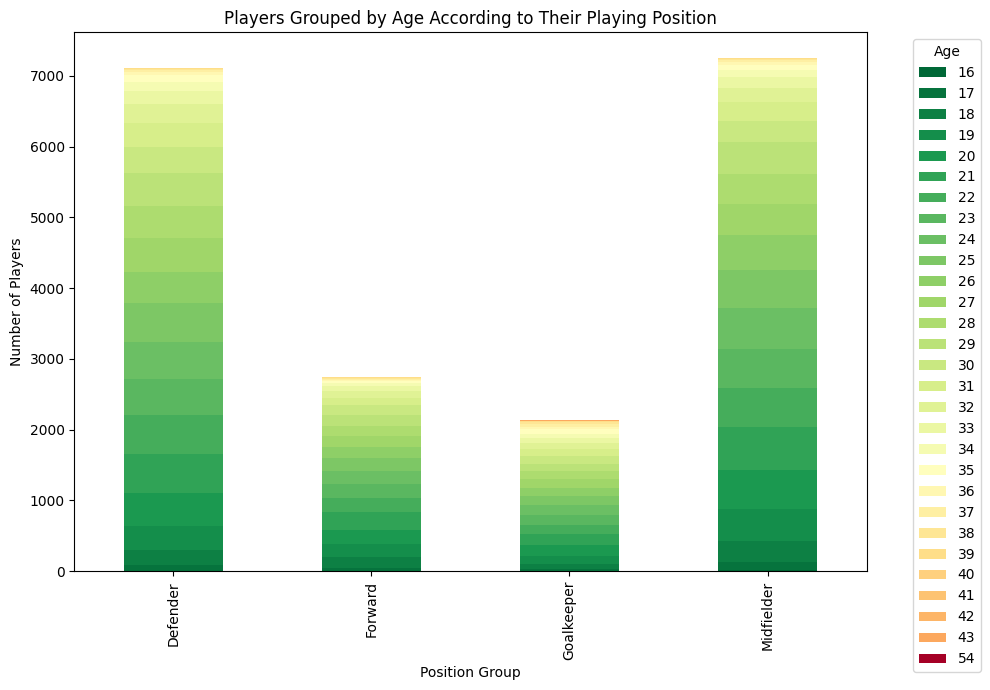

In [18]:
import matplotlib.pyplot as plt

def is_goalkeeper(positions):
    return 'GK' in positions

def is_defender(positions):
    return any(pos in positions for pos in ['CB', 'LB', 'RB', 'LWB', 'RWB'])

def is_midfielder(positions):
    return any(pos in positions for pos in ['CM', 'CDM', 'CAM', 'LM', 'RM'])

def is_forward(positions):
    return any(pos in positions for pos in ['ST', 'CF', 'LW', 'RW'])


df['position_group'] = df['player_positions'].apply(lambda pos: 
    'Goalkeeper' if is_goalkeeper(pos) else 
    'Defender' if is_defender(pos) else 
    'Midfielder' if is_midfielder(pos) else 
    'Forward' if is_forward(pos) else 'Other')

grouped_age = df.groupby(['position_group', 'age']).size().unstack(fill_value=0)

age_min = df['age'].min()
age_max = df['age'].max()
norm = plt.Normalize(vmin=age_min, vmax=age_max)

# Creating a colour map
cmap = plt.cm.get_cmap('RdYlGn_r')  

colors = [cmap(norm(age)) for age in grouped_age.columns]

grouped_age.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)

plt.title('Players Grouped by Age According to Their Playing Position')
plt.xlabel('Position Group')
plt.ylabel('Number of Players')
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Players Grouped by Overall Rating According to Their Playing Position

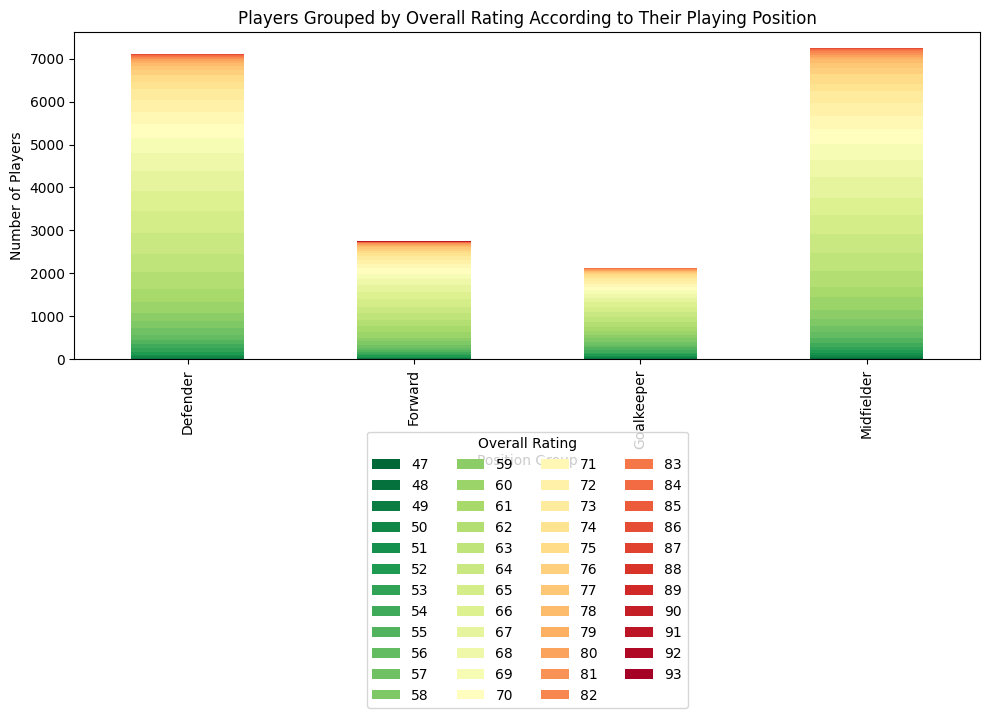

In [19]:
grouped_overall = df.groupby(['position_group', 'overall']).size().unstack(fill_value=0)

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

# Creating a colour map
cmap = plt.cm.get_cmap('RdYlGn_r')  

colors = [cmap(norm(overall)) for overall in grouped_overall.columns]

grouped_overall.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)

plt.title('Players Grouped by Overall Rating According to Their Playing Position')
plt.xlabel('Position Group')
plt.ylabel('Number of Players')
plt.legend(title="Overall Rating", bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.9])


plt.tight_layout()
plt.show()

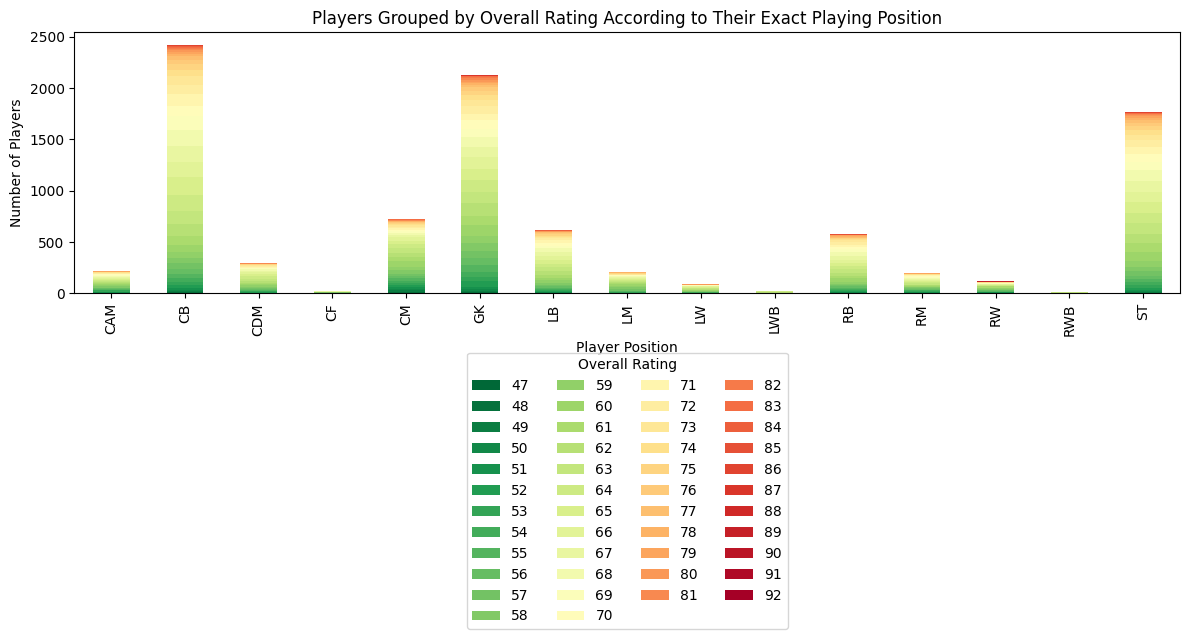

In [20]:
import matplotlib.pyplot as plt

positions = ['CB', 'LB', 'RB', 'LWB', 'RWB', 'CM', 'CDM', 'CAM', 'LM', 'RM', 'ST', 'CF', 'LW', 'RW', 'GK']

df_filtered = df[df['player_positions'].isin(positions)]

grouped_overall = df_filtered.groupby(['player_positions', 'overall']).size().unstack(fill_value=0)

overall_min = df_filtered['overall'].min()
overall_max = df_filtered['overall'].max()

norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')


colors = [cmap(norm(overall)) for overall in grouped_overall.columns]

grouped_overall.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title('Players Grouped by Overall Rating According to Their Exact Playing Position')
plt.xlabel('Player Position')
plt.ylabel('Number of Players')
plt.legend(title="Overall Rating", bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()


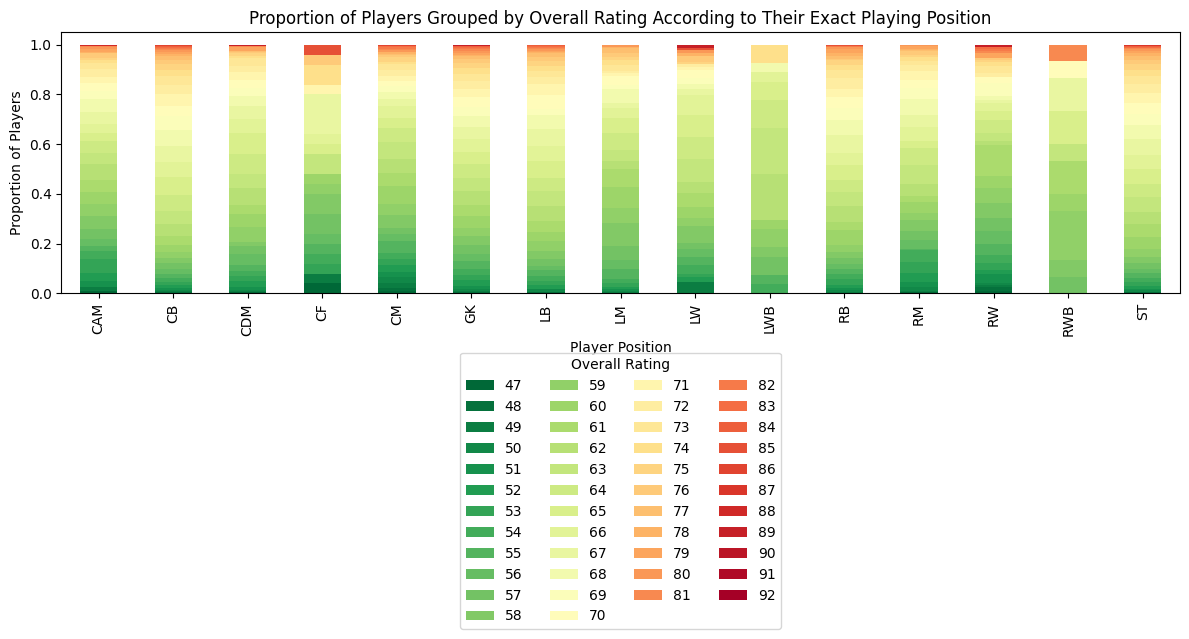

In [21]:
positions = ['CB', 'LB', 'RB', 'LWB', 'RWB', 'CM', 'CDM', 'CAM', 'LM', 'RM', 'ST', 'CF', 'LW', 'RW', 'GK']

df_filtered = df[df['player_positions'].isin(positions)]

grouped_overall = df_filtered.groupby(['player_positions', 'overall']).size().unstack(fill_value=0)

grouped_overall = grouped_overall.div(grouped_overall.sum(axis=1), axis=0)

overall_min = df_filtered['overall'].min()
overall_max = df_filtered['overall'].max()

norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in grouped_overall.columns]

grouped_overall.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title('Proportion of Players Grouped by Overall Rating According to Their Exact Playing Position')
plt.xlabel('Player Position')
plt.ylabel('Proportion of Players')
plt.legend(title="Overall Rating", bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()

## Players Grouped by Overall Rating According to Their Nationality

In [22]:
df['nationality_name'].unique()

array(['Argentina', 'Poland', 'Portugal', 'Brazil', 'Belgium', 'Slovenia',
       'France', 'Germany', 'England', 'Korea Republic', 'Netherlands',
       'Senegal', 'Egypt', 'Italy', 'Spain', 'Uruguay', 'Costa Rica',
       'Norway', 'Croatia', 'Scotland', 'Algeria', 'Slovakia', 'Denmark',
       'Switzerland', 'Hungary', 'Gabon', 'Serbia', 'Nigeria', 'Morocco',
       'Sweden', 'Austria', 'Montenegro', "Côte d'Ivoire", 'Mexico',
       'Bosnia and Herzegovina', 'Finland', 'Greece', 'Armenia',
       'Colombia', 'Cameroon', 'Ghana', 'Wales', 'Russia', 'Turkey',
       'United States', 'Jamaica', 'Canada', 'Czech Republic', 'Chile',
       'Ukraine', 'Venezuela', 'Togo', 'Burkina Faso', 'Northern Ireland',
       'Congo DR', 'Israel', 'Albania', 'Guinea', 'Iceland', 'China PR',
       'New Zealand', 'Central African Republic', 'Peru', 'Mali', 'Japan',
       'North Macedonia', 'Ecuador', 'Iran', 'Republic of Ireland',
       'Angola', 'Romania', 'Mozambique', 'Cape Verde Islands',
     

There are a lot of nationalities, so we firstly gonna group them based on the continent the players are from

In [23]:
def is_asian(nationality):
    return nationality in [
        'Korea Republic', 'Japan', 'China PR', 'Iran', 'Uzbekistan', 'Syria', 
        'India', 'Iraq', 'United Arab Emirates', 'Jordan', 'Lebanon', 'Vietnam',
        'Palestine', 'Philippines', 'Hong Kong', 'Chinese Taipei', 'Korea DPR',
        'Malaysia', 'Indonesia', 'Kazakhstan', 'Kyrgyzstan', 'Thailand', 
        'Afghanistan', 'Bhutan', 'Saudi Arabia', 'Israel', 'Azerbaijan'
    ]

def is_african(nationality):
    return nationality in [
        'Nigeria', 'Senegal', 'Egypt', 'Morocco', 'Algeria', 'Ghana', 'Cameroon', 
        'Tunisia', 'Mali', 'Ivory Coast', "Côte d'Ivoire", 'Burkina Faso', 
        'Guinea', 'Angola', 'South Africa', 'Sudan', 'Zimbabwe', 'Zambia', 
        'Benin', 'Congo', 'Togo', 'Congo DR', 'Kenya', 'Gabon', 'Mauritania', 
        'Mozambique', 'Namibia', 'Malawi', 'Liberia', 'Sierra Leone', 'Eritrea',
        'Madagascar', 'Libya', 'Gambia', 'Ethiopia', 'Uganda', 'Equatorial Guinea', 
        'Somalia', 'Comoros', 'Cape Verde Islands', 'Central African Republic',
        'Guinea Bissau', 'Tanzania', 'Burundi', 'Niger', 'South Sudan', 'Chad', 'Mauritius'
    ]

def is_european(nationality):
    return nationality in [
        'France', 'Germany', 'England', 'Spain', 'Italy', 'Portugal', 'Belgium', 
        'Netherlands', 'Poland', 'Slovenia', 'Switzerland', 'Austria', 'Croatia', 
        'Denmark', 'Sweden', 'Norway', 'Finland', 'Bosnia and Herzegovina', 
        'Serbia', 'Slovakia', 'Hungary', 'Greece', 'Bulgaria', 'Russia', 
        'Ukraine', 'Czech Republic', 'Romania', 'Scotland', 'Ireland', 
        'Northern Ireland', 'Iceland', 'Albania', 'Montenegro', 'Lithuania', 
        'Latvia', 'Estonia', 'Luxembourg', 'Georgia', 'Belarus', 'Armenia', 
        'Faroe Islands', 'Andorra', 'Kosovo', 'Moldova', 'Malta', 'Gibraltar',
        'Republic of Ireland', 'North Macedonia', 'Turkey', 'Cyprus', 'Wales'
    ]

def is_south_american(nationality):
    return nationality in [
        'Argentina', 'Brazil', 'Colombia', 'Chile', 'Uruguay', 'Peru', 'Paraguay', 
        'Venezuela', 'Ecuador', 'Bolivia', 'Suriname', 'Guyana'
    ]

def is_north_american(nationality):
    return nationality in [
        'United States', 'Canada', 'Mexico', 'Costa Rica', 'Panama', 'Jamaica', 
        'Honduras', 'Trinidad and Tobago', 'Cuba', 'Haiti', 'Guatemala', 
        'El Salvador', 'Bahamas', 'Dominican Republic', 'Saint Kitts and Nevis', 
        'Antigua and Barbuda', 'Barbados', 'Grenada', 'Saint Lucia', 
        'Saint Vincent and the Grenadines', 'Puerto Rico', 'Belize',
        'Curacao', 'Bermuda', 'Montserrat'
    ]

def is_australian(nationality):
    return nationality in [
        'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Samoa', 
        'Solomon Islands', 'Vanuatu', 'Guam'
    ]


df['region'] = df['nationality_name'].apply(
    lambda nationality: 'Asia' if is_asian(nationality) else
    'Africa' if is_african(nationality) else
    'Europe' if is_european(nationality) else
    'South America' if is_south_american(nationality) else
    'North America' if is_north_american(nationality) else
    'Australia/Oceania' if is_australian(nationality) else 'Other'
)

df[['short_name', 'nationality_name', 'region']]

short_name     nationality_name         region
0                L. Messi            Argentina  South America
1          R. Lewandowski               Poland         Europe
2       Cristiano Ronaldo             Portugal         Europe
3               Neymar Jr               Brazil  South America
4            K. De Bruyne              Belgium         Europe
...                   ...                  ...            ...
19234           Song Defu             China PR           Asia
19235           C. Porter  Republic of Ireland         Europe
19236            N. Logue  Republic of Ireland         Europe
19237           L. Rudden  Republic of Ireland         Europe
19238  E. Lalchhanchhuaha                India           Asia

[19239 rows x 3 columns]

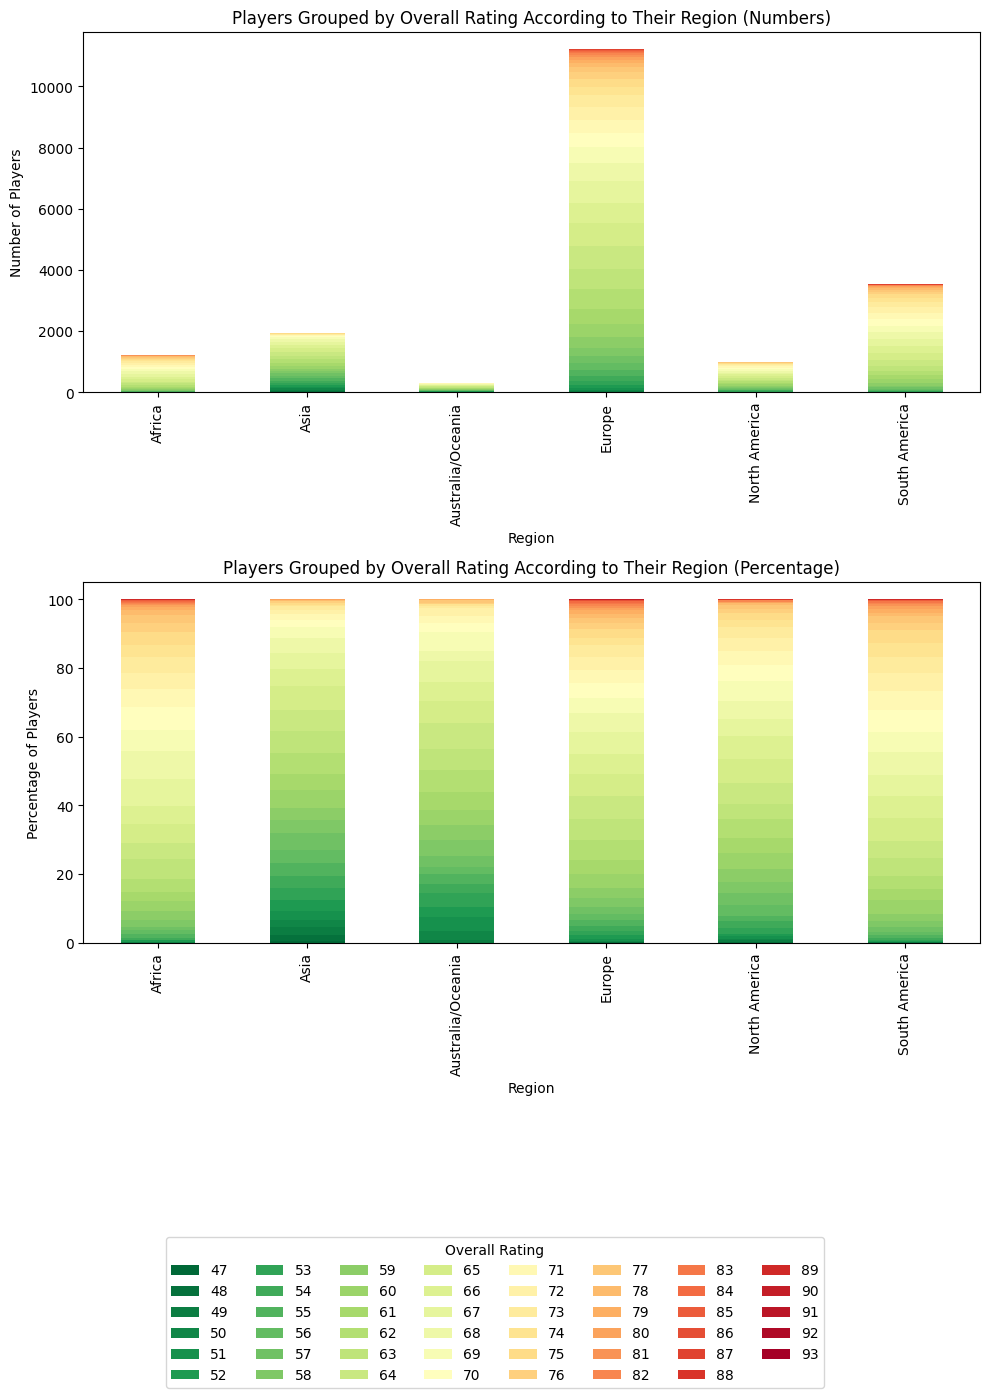

In [24]:
grouped_region = df.groupby(['region', 'overall']).size().unstack(fill_value=0)

grouped_region_percentage = grouped_region.div(grouped_region.sum(axis=1), axis=0) * 100

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in grouped_region.columns]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

grouped_region.plot(kind='bar', stacked=True, ax=ax1, color=colors, legend=False)
ax1.set_title('Players Grouped by Overall Rating According to Their Region (Numbers)')
ax1.set_xlabel('Region')
ax1.set_ylabel('Number of Players')

grouped_region_percentage.plot(kind='bar', stacked=True, ax=ax2, color=colors, legend=False)
ax2.set_title('Players Grouped by Overall Rating According to Their Region (Percentage)')
ax2.set_xlabel('Region')
ax2.set_ylabel('Percentage of Players')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Overall Rating", bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()


### Europe

In [25]:
def is_eastern_europe(nationality):
    return nationality in [
        'Russia', 'Ukraine', 'Poland', 'Romania', 'Czech Republic', 'Slovakia',
        'Hungary', 'Belarus', 'Bulgaria', 'Moldova', 'Armenia', 'Georgia',
        'Lithuania', 'Latvia', 'Estonia', 'Serbia', 'Bosnia and Herzegovina', 
        'Montenegro', 'North Macedonia', 'Albania', 'Kosovo'
    ]

def is_southern_europe(nationality):
    return nationality in [
        'Italy', 'Spain', 'Portugal', 'Greece', 'Croatia', 'Slovenia', 'Malta',
        'Cyprus', 'Turkey', 'Andorra',  'Gibraltar'
    ]

def is_western_europe(nationality):
    return nationality in [
        'France', 'Germany', 'Netherlands', 'Belgium', 'Switzerland', 'Austria',
        'Luxembourg', 'Monaco', 'Liechtenstein'
    ]

def is_northern_europe(nationality):
    return nationality in [
        'Sweden', 'Norway', 'Denmark', 'Finland', 'Iceland', 'Ireland', 
        'Northern Ireland', 'Scotland', 'England', 'Wales', 'Faroe Islands', 
        'Republic of Ireland'
    ]


def european_region(nationality):
    if is_eastern_europe(nationality):
        return 'Eastern Europe'
    elif is_southern_europe(nationality):
        return 'Southern Europe'
    elif is_western_europe(nationality):
        return 'Western Europe'
    elif is_northern_europe(nationality):
        return 'Northern Europe'
    else:
        return 'Other Europe'

df['european_region'] = df['nationality_name'].apply(european_region)

df[['short_name', 'nationality_name', 'european_region']]


short_name     nationality_name  european_region
0                L. Messi            Argentina     Other Europe
1          R. Lewandowski               Poland   Eastern Europe
2       Cristiano Ronaldo             Portugal  Southern Europe
3               Neymar Jr               Brazil     Other Europe
4            K. De Bruyne              Belgium   Western Europe
...                   ...                  ...              ...
19234           Song Defu             China PR     Other Europe
19235           C. Porter  Republic of Ireland  Northern Europe
19236            N. Logue  Republic of Ireland  Northern Europe
19237           L. Rudden  Republic of Ireland  Northern Europe
19238  E. Lalchhanchhuaha                India     Other Europe

[19239 rows x 3 columns]

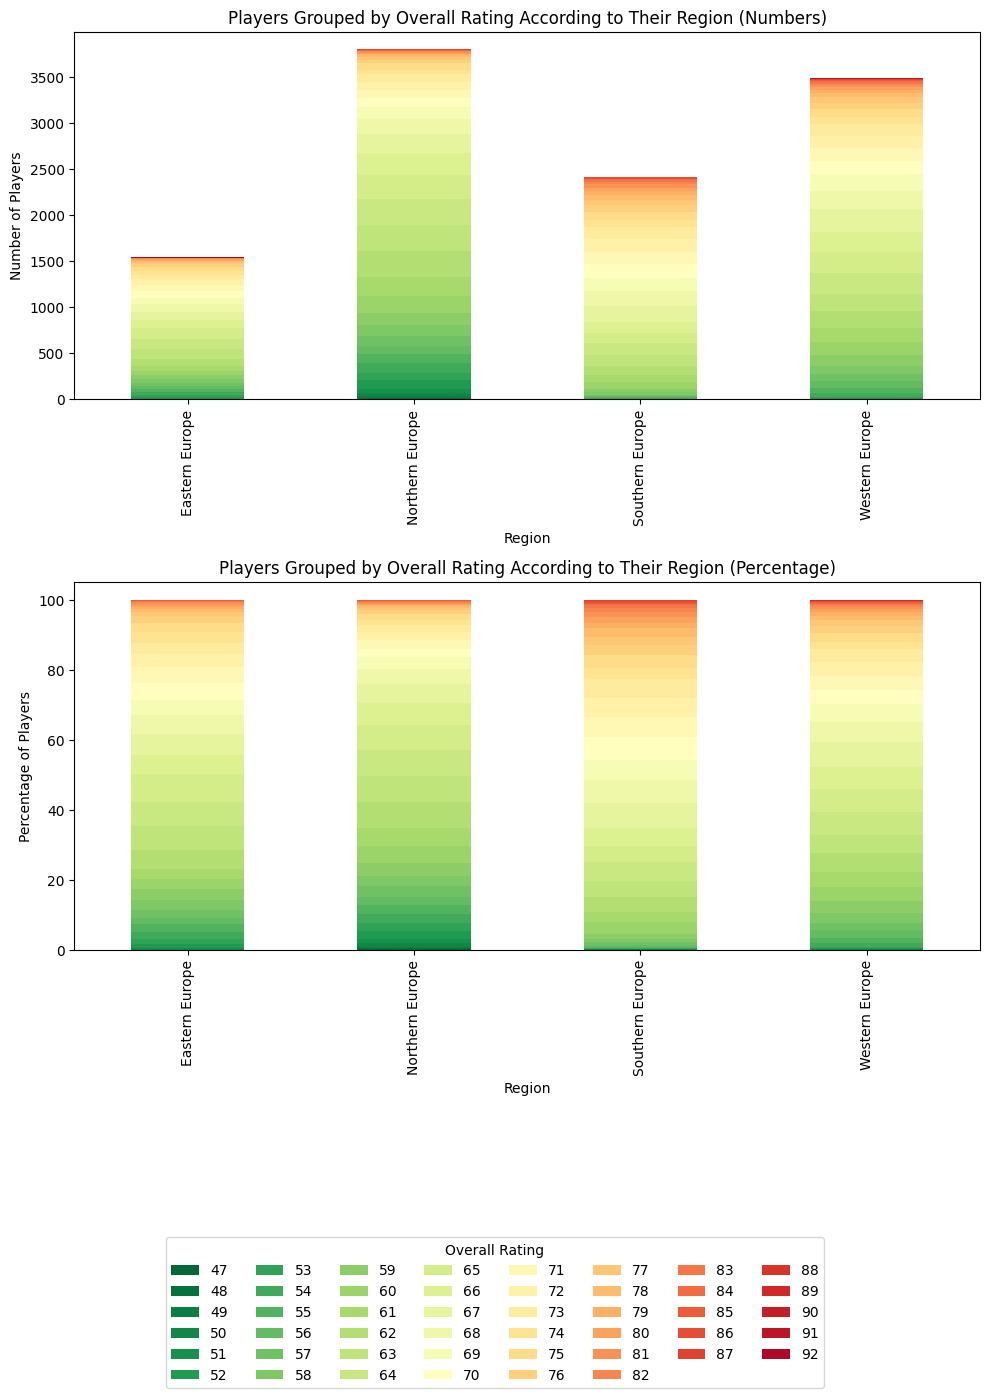

In [26]:
europe_df = df[df['region'] == 'Europe']

grouped_europe_region = europe_df.groupby(['european_region', 'overall']).size().unstack(fill_value=0)

grouped_europe_region_percentage = grouped_europe_region.div(grouped_europe_region.sum(axis=1), axis=0) * 100

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in grouped_europe_region.columns]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

grouped_europe_region.plot(kind='bar', stacked=True, ax=ax1, color=colors, legend=False)
ax1.set_title('Players Grouped by Overall Rating According to Their Region (Numbers)')
ax1.set_xlabel('Region')
ax1.set_ylabel('Number of Players')

grouped_europe_region_percentage.plot(kind='bar', stacked=True, ax=ax2, color=colors, legend=False)
ax2.set_title('Players Grouped by Overall Rating According to Their Region (Percentage)')
ax2.set_xlabel('Region')
ax2.set_ylabel('Percentage of Players')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Overall Rating", bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()

### Africa

In [27]:
def is_north_africa(nationality):
    return nationality in [
        'Egypt', 'Morocco', 'Algeria', 'Tunisia', 'Libya', 'Mauritania', 'Sudan'
    ]

def is_west_africa(nationality):
    return nationality in [
        'Nigeria', 'Senegal', 'Ivory Coast', "Côte d'Ivoire", 'Ghana', 'Burkina Faso', 
        'Guinea', 'Benin', 'Togo', 'Sierra Leone', 'Liberia', 'Cape Verde Islands', 
        'Guinea Bissau', 'Gambia', 'Niger'
    ]

def is_east_africa(nationality):
    return nationality in [
        'Kenya', 'Uganda', 'Ethiopia', 'Tanzania', 'Burundi', 'Rwanda', 'Somalia', 
        'South Sudan', 'Madagascar', 'Mauritius', 'Eritrea'
    ]

def is_central_africa(nationality):
    return nationality in [
        'Cameroon', 'Congo', 'Congo DR', 'Gabon', 'Equatorial Guinea', 
        'Central African Republic', 'Chad', 'Angola'
    ]

def is_southern_africa(nationality):
    return nationality in [
        'South Africa', 'Zimbabwe', 'Zambia', 'Namibia', 'Mozambique', 'Malawi'
    ]


def african_region(nationality):
    if is_north_africa(nationality):
        return 'North Africa'
    elif is_west_africa(nationality):
        return 'West Africa'
    elif is_east_africa(nationality):
        return 'East Africa'
    elif is_central_africa(nationality):
        return 'Central Africa'
    elif is_southern_africa(nationality):
        return 'Southern Africa'
    else:
        return 'Other Africa'

africa_df = df[df['region'] == 'Africa']

africa_df['african_region'] = df['nationality_name'].apply(african_region)

africa_df[['short_name', 'nationality_name', 'african_region']]

short_name nationality_name  african_region
16           S. Mané          Senegal     West Africa
17          M. Salah            Egypt    North Africa
56      K. Koulibaly          Senegal     West Africa
58         R. Mahrez          Algeria    North Africa
81     P. Aubameyang            Gabon  Central Africa
...              ...              ...             ...
18785     G. Asomani            Ghana     West Africa
18816       M. Aguek      South Sudan     East Africa
18918     R. Khaleel          Morocco    North Africa
19045       A. Majok      South Sudan     East Africa
19168         A. Deu      South Sudan     East Africa

[1223 rows x 3 columns]

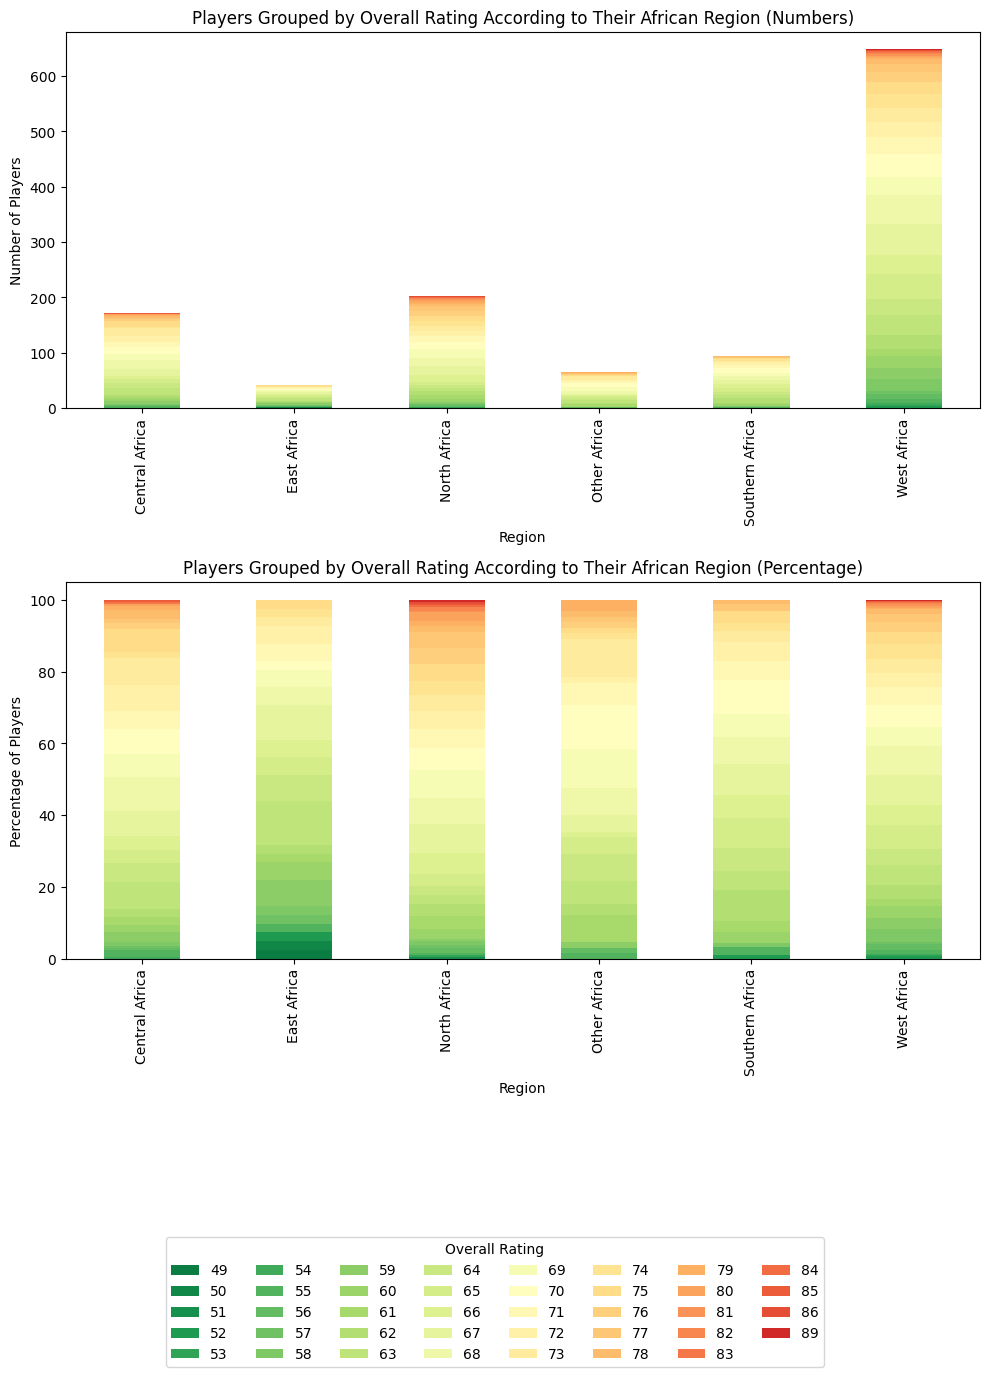

In [28]:
grouped_africa_region = africa_df.groupby(['african_region', 'overall']).size().unstack(fill_value=0)

grouped_africa_region_percentage = grouped_africa_region.div(grouped_africa_region.sum(axis=1), axis=0) * 100

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in grouped_africa_region.columns]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

grouped_africa_region.plot(kind='bar', stacked=True, ax=ax1, color=colors, legend=False)
ax1.set_title('Players Grouped by Overall Rating According to Their African Region (Numbers)')
ax1.set_xlabel('Region')
ax1.set_ylabel('Number of Players')

grouped_africa_region_percentage.plot(kind='bar', stacked=True, ax=ax2, color=colors, legend=False)
ax2.set_title('Players Grouped by Overall Rating According to Their African Region (Percentage)')
ax2.set_xlabel('Region')
ax2.set_ylabel('Percentage of Players')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Overall Rating", bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()

### Asia

In [29]:
def is_south_asia(nationality):
    return nationality in [
        'India', 'Afghanistan', 'Bhutan'
    ]

def is_southeast_asia(nationality):
    return nationality in [
        'Vietnam', 'Philippines', 'Malaysia', 'Indonesia', 'Thailand', 'Singapore'
    ]

def is_east_asia(nationality):
    return nationality in [
        'Korea Republic', 'Japan', 'China PR', 'Hong Kong', 'Chinese Taipei', 'Korea DPR'
    ]

def is_west_asia(nationality):
    return nationality in [
        'Iran', 'Saudi Arabia', 'Syria', 'Iraq', 'Jordan', 'Lebanon', 'Israel', 'Palestine', 'United Arab Emirates'
    ]

def is_central_asia(nationality):
    return nationality in [
        'Kazakhstan', 'Uzbekistan', 'Kyrgyzstan', 'Azerbaijan', 'Turkmenistan', 'Tajikistan'
    ]

def asian_region(nationality):
    if is_south_asia(nationality):
        return 'South Asia'
    elif is_southeast_asia(nationality):
        return 'Southeast Asia'
    elif is_east_asia(nationality):
        return 'East Asia'
    elif is_west_asia(nationality):
        return 'West Asia'
    elif is_central_asia(nationality):
        return 'Central Asia'
    else:
        return 'Other Asia'

asia_df = df[df['region'] == 'Asia']

asia_df['asian_region'] = asia_df['nationality_name'].apply(asian_region)

asia_df[['short_name', 'nationality_name', 'asian_region']]


short_name nationality_name asian_region
13                 H. Son   Korea Republic    East Asia
434             E. Zahavi           Israel    West Asia
536              Gao Late         China PR    East Asia
538              Ai Kesen         China PR    East Asia
634             D. Kamada            Japan    East Asia
...                   ...              ...          ...
19228            F. Molla            India   South Asia
19229            H. Singh            India   South Asia
19231               R. By            India   South Asia
19234           Song Defu         China PR    East Asia
19238  E. Lalchhanchhuaha            India   South Asia

[1950 rows x 3 columns]

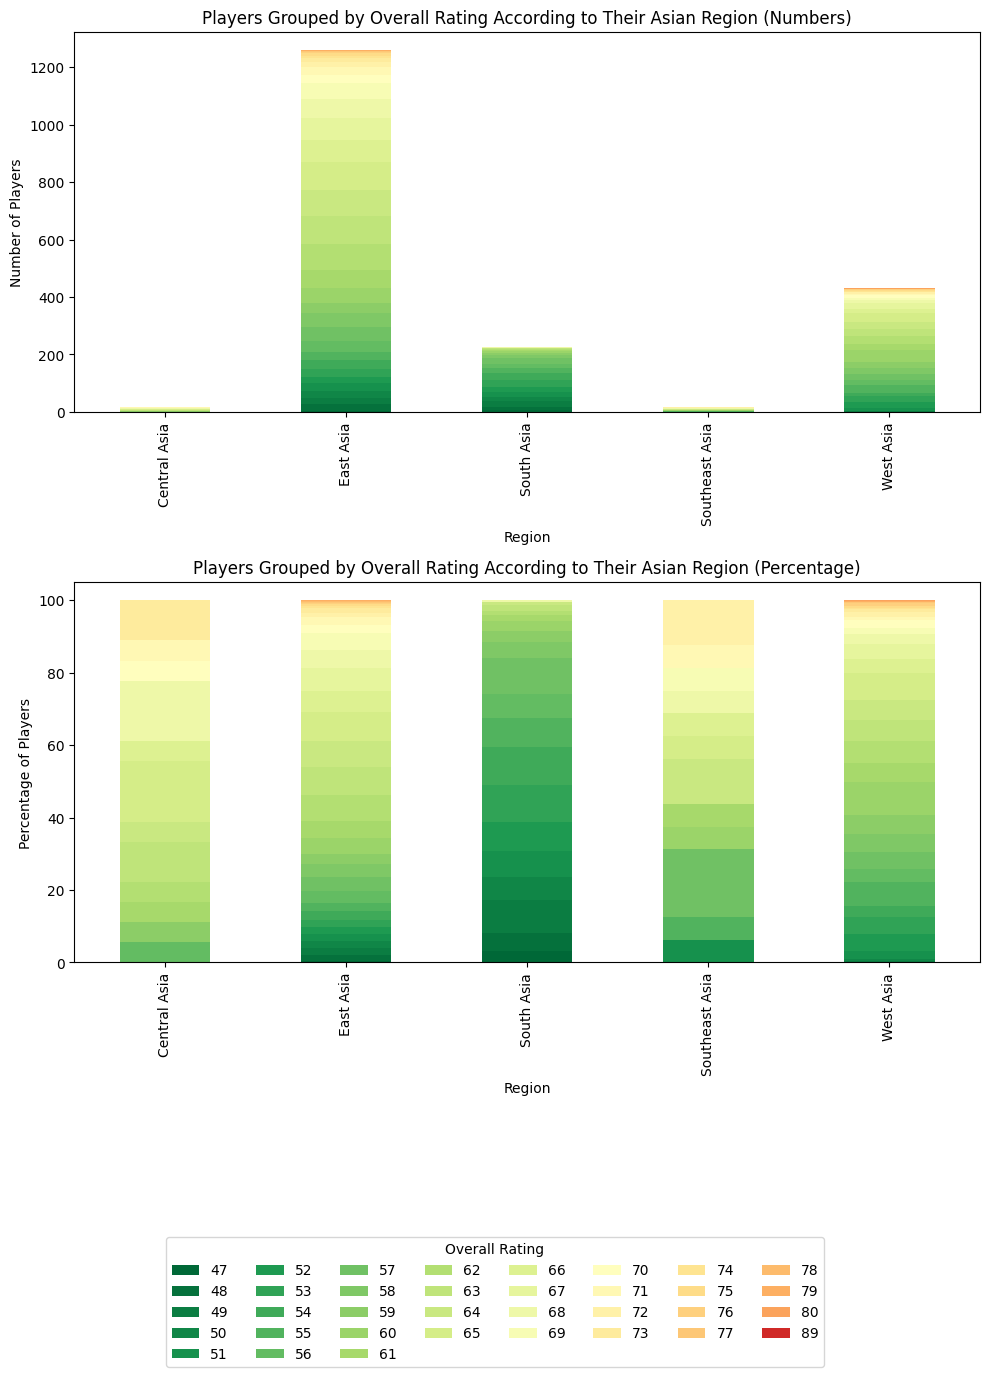

In [30]:
grouped_asia_region = asia_df.groupby(['asian_region', 'overall']).size().unstack(fill_value=0)

grouped_asia_region_percentage = grouped_asia_region.div(grouped_asia_region.sum(axis=1), axis=0) * 100

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in grouped_asia_region.columns]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

grouped_asia_region.plot(kind='bar', stacked=True, ax=ax1, color=colors, legend=False)
ax1.set_title('Players Grouped by Overall Rating According to Their Asian Region (Numbers)')
ax1.set_xlabel('Region')
ax1.set_ylabel('Number of Players')

grouped_asia_region_percentage.plot(kind='bar', stacked=True, ax=ax2, color=colors, legend=False)
ax2.set_title('Players Grouped by Overall Rating According to Their Asian Region (Percentage)')
ax2.set_xlabel('Region')
ax2.set_ylabel('Percentage of Players')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Overall Rating", bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()

## By country

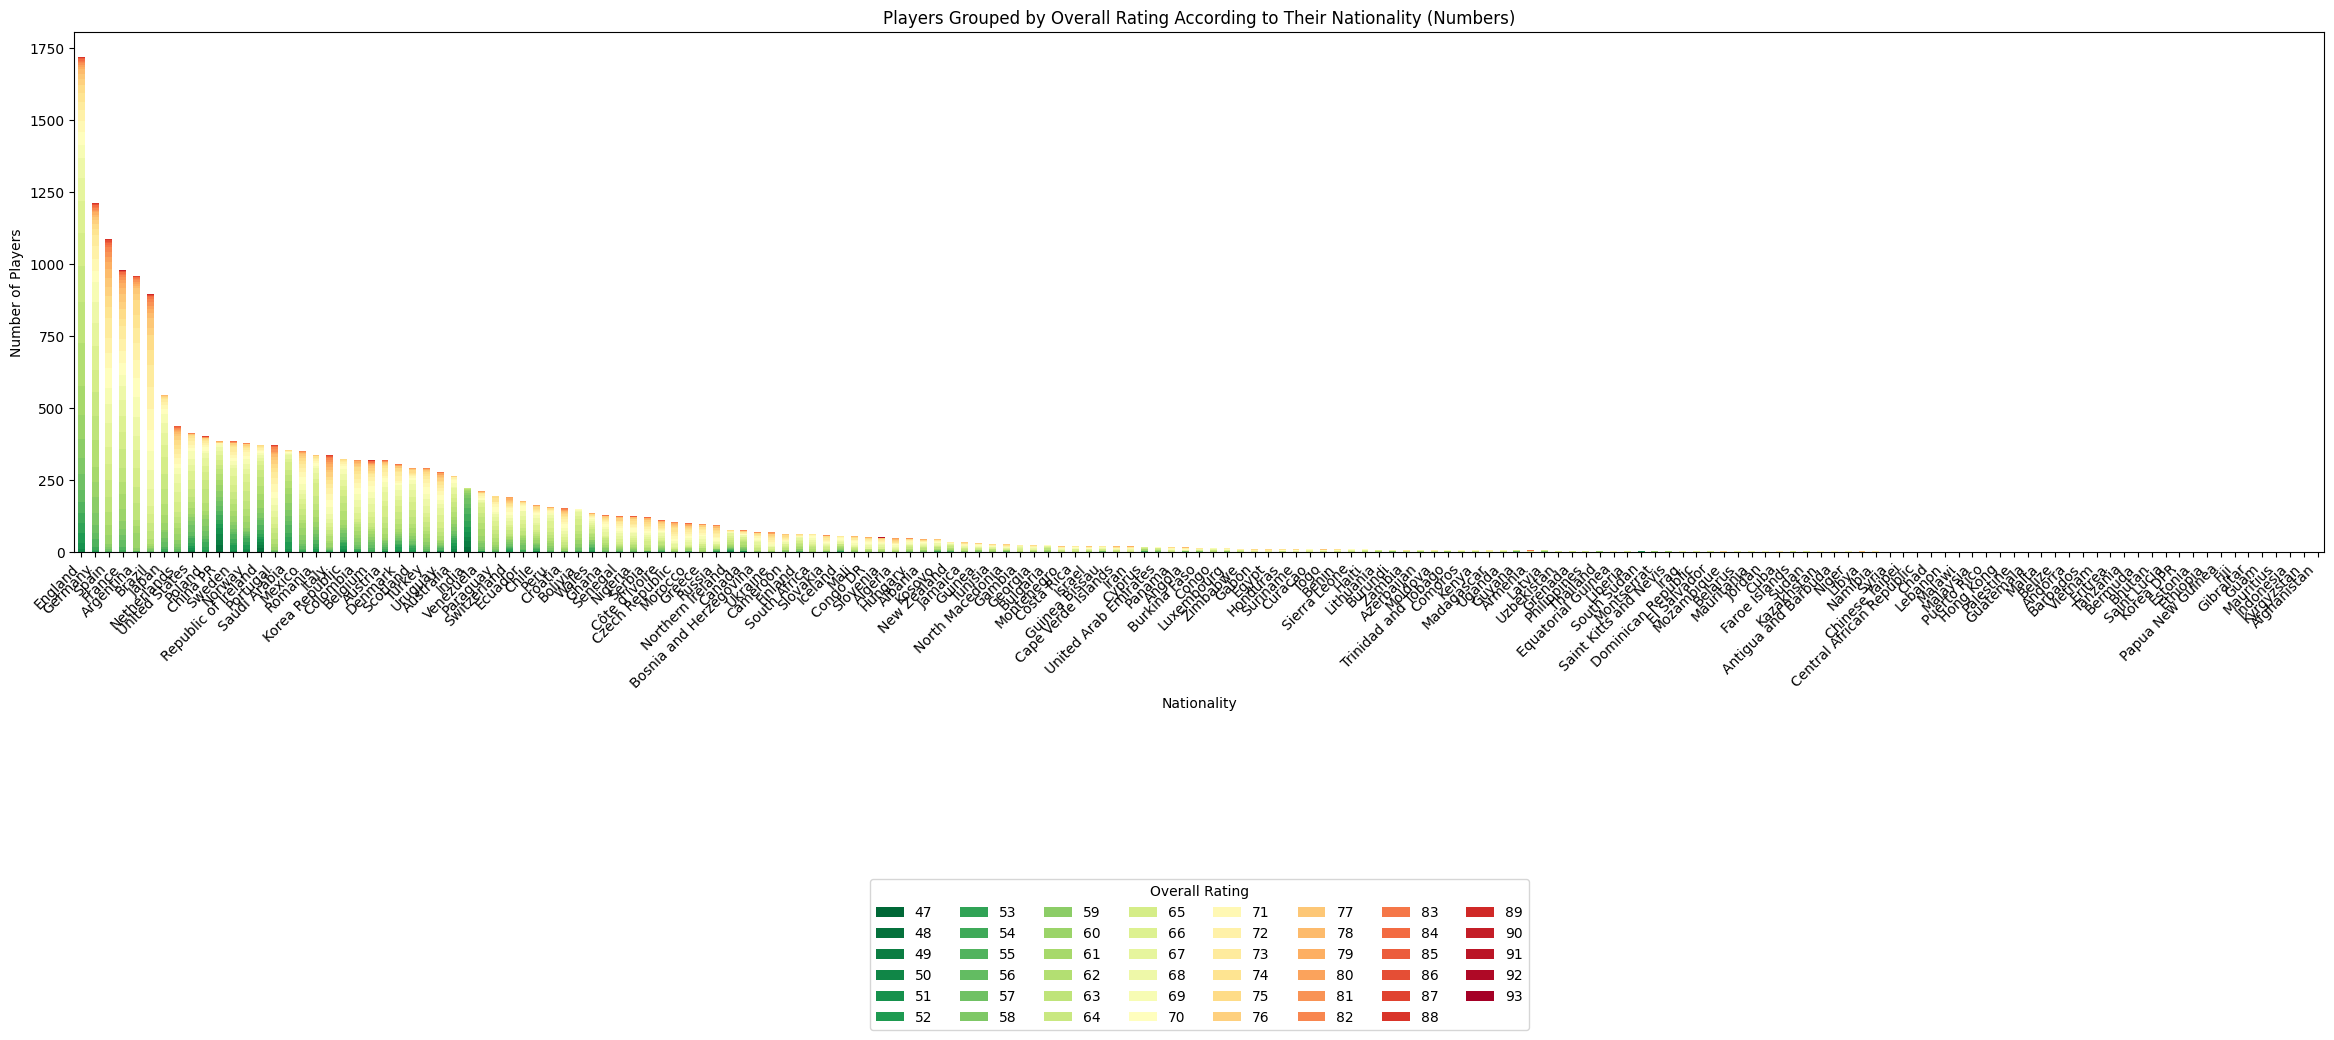

In [31]:
df_grouped = df.groupby(['nationality_name', 'overall']).size().unstack(fill_value=0)

df_grouped['total'] = df_grouped.sum(axis=1)
df_grouped = df_grouped.sort_values(by='total', ascending=False)
df_grouped = df_grouped.drop('total', axis=1)  

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in df_grouped.columns]

fig, ax1 = plt.subplots(figsize=(25, 8))  

df_grouped.plot(kind='bar', stacked=True, ax=ax1, color=colors, legend=False)

ax1.set_title('Players Grouped by Overall Rating According to Their Nationality (Numbers)')
ax1.set_xlabel('Nationality')
ax1.set_ylabel('Number of Players')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Overall Rating", bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.3)

plt.show()

#### Top 15 countries by number of players

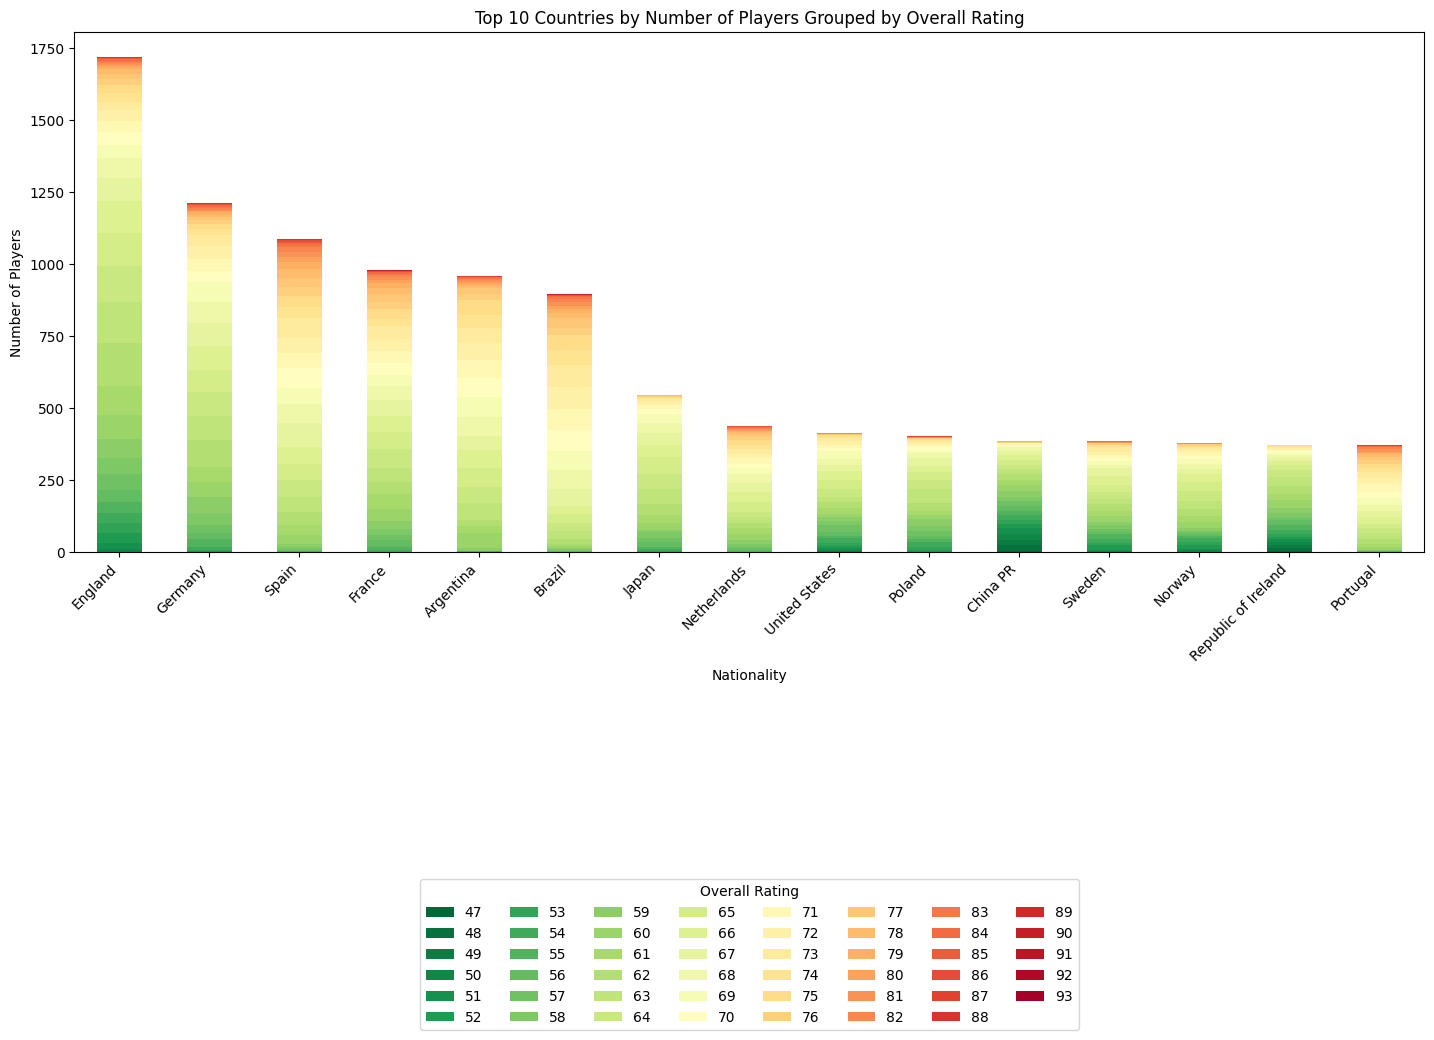

In [32]:
df_grouped = df.groupby(['nationality_name', 'overall']).size().unstack(fill_value=0)

df_grouped['total'] = df_grouped.sum(axis=1)
df_grouped = df_grouped.sort_values(by='total', ascending=False)

df_grouped_top15 = df_grouped.head(15)
df_grouped_top15 = df_grouped_top15.drop('total', axis=1)  

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in df_grouped_top15.columns]

fig, ax1 = plt.subplots(figsize=(15, 8))

df_grouped_top15.plot(kind='bar', stacked=True, ax=ax1, color=colors, legend=False)

ax1.set_title('Top 10 Countries by Number of Players Grouped by Overall Rating')
ax1.set_xlabel('Nationality')
ax1.set_ylabel('Number of Players')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Overall Rating", bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.3)

plt.show()

### Top 50 countries with highest number of players by rating

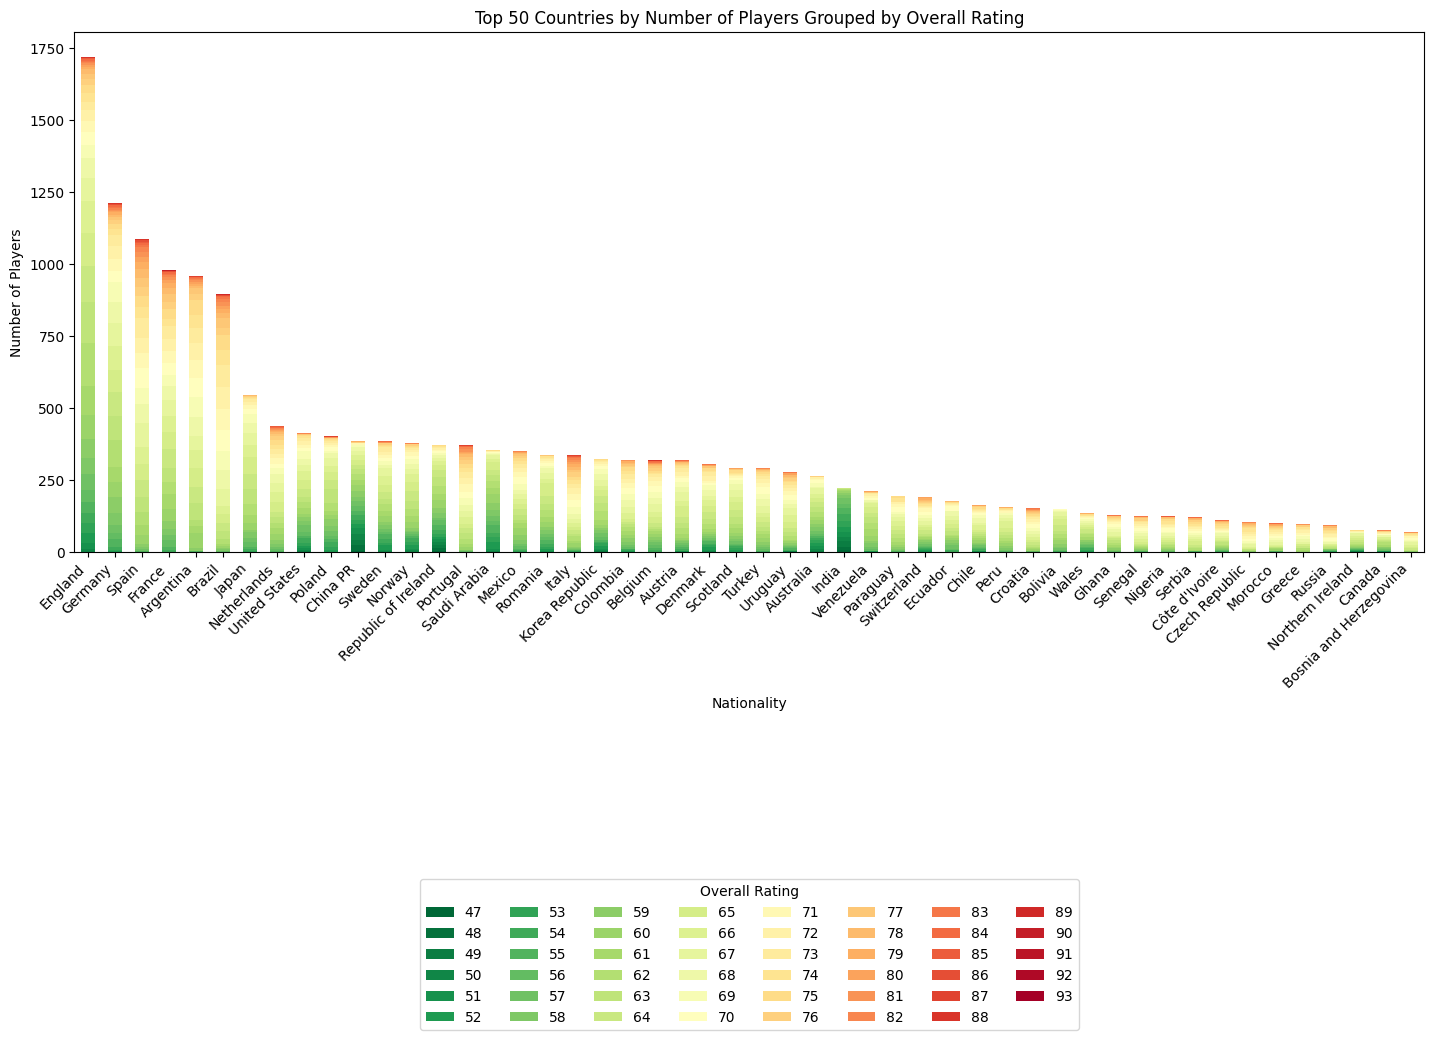

In [33]:
df_grouped = df.groupby(['nationality_name', 'overall']).size().unstack(fill_value=0)

df_grouped['total'] = df_grouped.sum(axis=1)
df_grouped = df_grouped.sort_values(by='total', ascending=False)

df_grouped_top50 = df_grouped.head(50)
df_grouped_top50 = df_grouped_top50.drop('total', axis=1)  

overall_min = df['overall'].min()
overall_max = df['overall'].max()
norm = plt.Normalize(vmin=overall_min, vmax=overall_max)

cmap = plt.cm.get_cmap('RdYlGn_r')

colors = [cmap(norm(overall)) for overall in df_grouped_top50.columns]

fig, ax1 = plt.subplots(figsize=(15, 8))

df_grouped_top50.plot(kind='bar', stacked=True, ax=ax1, color=colors, legend=False)

ax1.set_title('Top 50 Countries by Number of Players Grouped by Overall Rating')
ax1.set_xlabel('Nationality')
ax1.set_ylabel('Number of Players')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Overall Rating", bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.3)

plt.show()

# Business block

One of the Interesting aspect from the visualisation of the date is that vast majorith of football players come from the Europe. And also the players with the highest rating are also from Europe, or Africa or South america. Biggest percentage of players from Asia and Australia have the lowest rating. 
regarding rating South Europe delivers players with the highets rating. 

Will be interesting to investigate the correlation between rating and value/wage. And also add the nationality to the correlation. Would we be able to predict the value and wage of the player based on the following features: nationality, club, overall rating. 

On top of that how, how the position of the player affects the rating and the value/wage. I would assume that those players who strike on the ball would have the highest rating and wage.

The project can be used for coaches to decide which players they want to be in the club and on which position. And if the players want to play a certain position, which skills they have to develop.

# Block of Analytical Thinking

## Penalty kick

Article "The obligation to succeed when it matters the most–The influence of skill and pressure on the success in football penalty kicks":
- High pressure increases the chance that the penalty kick will miss the goal entirely.
- Goalkeeper success decreases when the penalty is taken by a highly skilled player.
  
Article: "On winning the penalty shoot-out in soccer":
- increased pressure and stress results in the conversion rate of penalties taken during a penalty shoot dropping down.
- Clearly, those who have learnt to handle their nerves have an advantage.

Article: "Mastering the Art of Penalty Kick Defence: An Exploratory Study on the Key Factors Influencing Goalkeepers’ Success":
- The assessment of goalkeepers' influence on penalty kick saves considered previous defensive statistics and relied on three main factors:
- --preferred side (the direction where they have a greater tendency to move for a save),
- --reading ability (anticipating the ball's trajectory based on opponent analysis, such as posture and gaze direction),
- --and reaction speed (the ability to respond to the shot).
- Importantly, goalkeepers who instinctively moved towards their preferred side first achieved a significantly higher success rate of 65.3%.
- A statistically significant negative correlation (r = -0.76, p < 0.001) was observed between reaction speed and defence rate, underscoring that faster reactions enhance the likelihood of successful defence.
- goalkeepers with a greater ability to anticipate ball trajectories demonstrated higher defence rates.
- Enhancing diving technique, positioning, and practising various penalty kick angles and trajectories are crucial for technique and coordination.

Article: "The supporting foot as a kinematic indicator of penalty kick direction in soccer ":
- The researchers also found that 
(82.83) % of the penalty kicks where the supporting foot direction matched the ball's direction resulted in goal\

Article: "Kicks from the penalty mark in soccer: The roles of stress,skill, and fatigue for kick outcomes"
- It was concluded that psychological components are most influential for the outcome of penalty kicks.

Article "Anticipating the Direction of Soccer Penalty Shots Depends on the Speed and Technique of the Kick":
- Given the trade-off between kicking speed and directional predictability, a penalty kicker might benefit from kicking below their maximal speed.
- If a keeper is known to dive early, a kicker can maximize unpredictability with a slow side-foot shot. However, if a keeper tends to dive late, a kicker must use the instep to maximize unpredictability, which necessarily reduces accuracy.

Article "Analysis of penalties taken in shoot-outs":
- that shots with less power are more likely to be saved, shots with a lot of power are more likely to miss, and that the sweet spot is in between the two, with the authors suggesting shots at about 75% of full pace have the highest success.
- Best success ratios are from an even run up of 4, 5 and 6 paces.
- the goalkeepers who took a pace forward and stood
up while the striker approached the ball, had the best save and miss ratios. 
Risk v reward
(28)

Although the top area of the goal has the highest scoring success rate, the majority of kicks go to the lower area where it is harder to miss - but easier to save
s

The main thing in the article regarding a good penalty kick is the mental state of the player, the ability to stay calm and focused under pressure. That being said, 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure' are things to focus on in daat analys, in particuler "mentality_penalties".  mentality_composure is the ability to remain calm, so is crucial as well. 
_vision and _position (imagine where to give a shot, which part of the goal) also plays role, while _aggression and interceptions don't matter that much. 
The physic and which foot preffered do not ingluence the success of the penalty, unless the player use the different foot to preffered one. 
However 'pace' and 'power_shot_power' have an inverse corelation with the success of the penalty kick. Players who do not go full power (under 75%) showed a significantly beeter result. 
The dribbling is not important for the penalty kick, however 'skill_fk_accuracy' (free kick accuracy, when ball is stationary) would influence the outcome.
When kicking a stationary ball, movement_balance is an important skill to develop as well
Finaly, skill_curve is important to send the ball away from the goalkeeper. 

'sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_position', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_loaned_from',
       'club_joined', 'club_jersey_number', 'club_contract_valid_until',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'player_face_url', 'club_logo_url', 'nation_logo_url',
       'nation_flag_url'

In total we collected the following skill set: 
'mentality_penalties', 'mentality_composure', 'pace', 'power_shot_power', 'skill_fk_accuracy' and 'movement_balance' 

- Each of the 'mentality_penalties' and 'mentality_composure' will get a weight of 0.45, since they are of equal importance for the penalty kick 
- 'skill_fk_accuracy' is significant, but not as much as the psychology, so 0,35 
- 'movemenet_balance' doesn't play a crucial role, but can have a good impact on one penalty kick perfomance, so 0,15
- Finally, 'pace', 'power_shot_power' both will be awarded with -0,2 

So final metric is:  0,45 'mentality_penalties' + 0,4 'mentality_composure' - 0,1 'pace' - 0,1 'power_shot_power' + 0,2 'skill_fk_accuracy' + 0,15'movement_balance'

## Goalkeeper success 

['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_position', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_loaned_from',
       'club_joined', 'club_jersey_number', 'club_contract_valid_until',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'player_face_url', 'club_logo_url', 'nation_logo_url',
       'nation_flag_url']

- Goalkeeping diving is thea tactic used by some goalkeepers to anticipate the direction of the shot, and so important for penalty since you cannot predict the direction of the ball well and have to guess
- As we discussed earlier, the initial positioning of the goalkeeper can play an important role in the penalty kick
- Goalkeeper reflexes are one of the most vital skill during the penatlty shot
- Surprisingly, but the height,taller the person better the chances to catch the ball. Another would be body_type, but the data is categorical and would require a lot of experimenting with
- finally, mental_composure is significant to stay calm and focused

So the final metric is:

0,3 'mental_composure' + 0,25 'goalkeeper_diving' + 0,15 'goalkeeper_reflexes' + 0,2 'goalkeeping_positioning' + 0,1 'height_cm' 

Regarding the question whether some of the clubs have better penalty players compare to other club's goalkeepers:
From the articles emntioned above we can come to conclusion that it depends on dynamic between the penalty kicker and a goalkeeper. For example, as we talked earlier, the football player develop certain strategy based on their strongest skills (preffer to kick to the left, use 75% of the power etc). The goalkeeper may know about it before (by analysing the opponent club before the match) and so he has a chance of catching a ball.
On top of that, we mentioned how the mental composure is one of the key ingredient for the good penalty kick. Te goalkeeper could "out psych" the opponent. For example he can spread out and make themselves look as big as possible before the penalty is taken. This makes the opponent falsely believe that the goalkeeper is bigger than he actually is, and that the goal is smaller. This strategy, utilises the Muller-Lyer illusion, which alters peoples ability to accurately judge the width of an object.
Another trick the goalkeeper can use is to stand 6-10 cm off centre of the goal (i.e. marginally to the left or the right). This makes one side of the goal 2.9% wider than the other. This tiny difference results in the penalty taker aiming for the slightly larger side almost 60% of the time. 
Because of the element named "player-goalkeeper dynamic" we cannot say for sure which clubs have better penalty kickers then other club's goalkeepers. We can make an opposite claim that some clubs can have the best goalkeepers, but we cannot say for sure which one based on our data. Our data can predict which goalkeeper have a better potential during the penalty kick. However, we don't know how well the keeper knows psychology of the opponent team's player, which seemes to be a key. 

## Top 10 clubs with the best penalty kicker

Previusly we created the dataframe of the football clubs

In [34]:
clubs

club_name  \
0        1. FC Heidenheim 1846   
1         1. FC Kaiserslautern   
2                   1. FC Köln   
3              1. FC Magdeburg   
4               1. FC Nürnberg   
..                         ...   
696                  Örebro SK   
697              Östersunds FK   
698     İstanbul Başakşehir FK   
699  İttifak Holding Konyaspor   
700              Śląsk Wrocław   

                                               players  player_count  \
0    P. Mainka, T. Kleindienst, K. Müller, O. Hüsin...            27   
1    J. Zimmer, M. Wunderlich, P. Hercher, F. Götze...            28   
2    J. Hector, E. Skhiri, T. Horn, F. Kainz, M. Ut...            31   
3    B. Atik, T. Müller, A. Bittroff, F. Kath, R. O...            28   
4    C. Schindler, K. Rausch, M. Schäffler, M. Dæhl...            29   
..                                                 ...           ...   
696  N. Besara, A. Yasin, J. Hamad, B. Allain, A. S...            25   
697  A. Keita, N. Sundberg, I. Ssewankambo, F. Hörb...            24   
698  E. Višća, N. Chadli, S. Okaka, Júnior Caiçara,...            27   
699  A. Hassan, N. Skubic, P. Mpoku, Guilherme Sity...            24   
700  Caye Quintana, R. Pich, K. Mączyński, Erik Exp...            28   

     avg_overall   avg_pace  avg_movement_acceleration  \
0      66.925926  68.041667                  64.148148   
1      62.821429  69.960000                  65.178571   
2      69.161290  66.703704                  64.096774   
3      62.107143  69.800000                  66.571429   
4      65.689655  67.807692                  64.862069   
..           ...        ...                        ...   
696    61.440000  66.590909                  63.200000   
697    61.666667  72.454545                  69.416667   
698    70.000000  67.250000                  63.962963   
699    67.750000  66.476190                  63.666667   
700    62.964286  69.400000                  65.678571   

     avg_movement_sprint_speed  
0                    64.925926  
1                    64.928571  
2                    62.580645  
3                    64.857143  
4                    64.310345  
..                         ...  
696                  62.520000  
697                  69.041667  
698                  63.814815  
699                  62.750000  
700                  66.107143  

[701 rows x 7 columns]

In [35]:
def calculate_penalty_kick_score(player_row):
    penalty_kick_score = (
        0.45 * player_row['mentality_penalties'] +
        0.4 * player_row['mentality_composure'] -
        0.1 * player_row['pace'] -
        0.1 * player_row['power_shot_power'] +
        0.2 * player_row['skill_fk_accuracy'] +
        0.15 * player_row['movement_balance']
    )
    return penalty_kick_score

non_goalkeepers = df[~df['player_positions'].str.contains('GK', na=False)]

non_goalkeepers['penalty_kick_score'] = non_goalkeepers.apply(calculate_penalty_kick_score, axis=1)


In [36]:
def compute_overall_penalty_kick_score(club_row):
    if isinstance(club_row['players'], str):
        club_players = [player.strip() for player in club_row['players'].split(',')]
    else:
        club_players = club_row['players']  
    
    club_non_goalkeepers = non_goalkeepers[non_goalkeepers['short_name'].isin(club_players)]
    
    if club_non_goalkeepers.empty:
        return 0
    
    top_10_players = club_non_goalkeepers.nlargest(10, 'penalty_kick_score')
    
    overall_penalty_kick_score = top_10_players['penalty_kick_score'].sum()
    
    return overall_penalty_kick_score

clubs['overall_penalty_kick_score'] = clubs.apply(compute_overall_penalty_kick_score, axis=1)

clubs[['club_name', 'overall_penalty_kick_score']].nlargest(10, 'overall_penalty_kick_score')

club_name  overall_penalty_kick_score
470  Paris Saint-Germain                      812.30
509       Real Madrid CF                      802.20
412    Manchester United                      799.20
403            Liverpool                      776.10
358                Inter                      774.70
69    Atlético de Madrid                      760.45
63              Atalanta                      758.90
572           Sevilla FC                      758.75
411      Manchester City                      754.20
368             Juventus                      750.00

## Top 10 clubs who has the best goalkeepers

If this is based on the goalkeeper success during the penalty kick, then we will use a metric which we previusly mention

In [37]:
def calculate_penalty_catch_score(player_row):
    penalty_kick_score = (
        0.25 * player_row['goalkeeping_diving'] +
        0.3 * player_row['mentality_composure'] +
        0.15 * player_row['goalkeeping_reflexes'] +
        0.1 * player_row['height_cm'] +
        0.2 * player_row['goalkeeping_positioning'] 
    )
    return penalty_kick_score

goalkeepers = df[df['player_positions'].str.contains('GK', na=False)]

goalkeepers['penalty_catch_score'] = goalkeepers.apply(calculate_penalty_catch_score, axis=1)
goalkeepers.nlargest(10, 'penalty_catch_score')

sofifa_id                                         player_url  \
7      167495  https://sofifa.com/player/167495/manuel-neuer/...   
21     230621  https://sofifa.com/player/230621/gianluigi-don...   
8      192448  https://sofifa.com/player/192448/marc-andre-te...   
5      200389  https://sofifa.com/player/200389/jan-oblak/220002   
18     210257  https://sofifa.com/player/210257/ederson-santa...   
48     162835  https://sofifa.com/player/162835/samir-handano...   
26     193041  https://sofifa.com/player/193041/keylor-navas/...   
20     212831  https://sofifa.com/player/212831/alisson-ramse...   
12     192119  https://sofifa.com/player/192119/thibaut-court...   
34     186153  https://sofifa.com/player/186153/wojciech-szcz...   

       short_name                  long_name player_positions  overall  \
7        M. Neuer         Manuel Peter Neuer               GK       90   
21  G. Donnarumma       Gianluigi Donnarumma               GK       89   
8   M. ter Stegen      Marc-André ter Stegen               GK       90   
5        J. Oblak                  Jan Oblak               GK       91   
18        Ederson  Ederson Santana de Moraes               GK       89   
48  S. Handanovič           Samir Handanovič               GK       86   
26       K. Navas        Keylor Navas Gamboa               GK       88   
20        Alisson      Alisson Ramsés Becker               GK       89   
12    T. Courtois           Thibaut Courtois               GK       89   
34    W. Szczęsny   Wojciech Tomasz Szczęsny               GK       87   

    potential    value_eur  wage_eur  age  ... goalkeeping_reflexes  \
7          90   13500000.0   86000.0   35  ...                   88   
21         93  119500000.0  110000.0   22  ...                   90   
8          92   99000000.0  250000.0   29  ...                   90   
5          93  112000000.0  130000.0   28  ...                   90   
18         91   94000000.0  200000.0   27  ...                   88   
48         86    7500000.0   78000.0   36  ...                   87   
26         88   15500000.0  130000.0   34  ...                   89   
20         90   82000000.0  190000.0   28  ...                   89   
12         91   85500000.0  250000.0   29  ...                   88   
34         87   42000000.0  105000.0   31  ...                   88   

    goalkeeping_speed                                    player_face_url  \
7                56.0  https://cdn.sofifa.net/players/167/495/22_120.png   
21               52.0  https://cdn.sofifa.net/players/230/621/22_120.png   
8                43.0  https://cdn.sofifa.net/players/192/448/22_120.png   
5                50.0  https://cdn.sofifa.net/players/200/389/22_120.png   
18               64.0  https://cdn.sofifa.net/players/210/257/22_120.png   
48               47.0  https://cdn.sofifa.net/players/162/835/22_120.png   
26               54.0  https://cdn.sofifa.net/players/193/041/22_120.png   
20               52.0  https://cdn.sofifa.net/players/212/831/22_120.png   
12               46.0  https://cdn.sofifa.net/players/192/119/22_120.png   
34               49.0  https://cdn.sofifa.net/players/186/153/22_120.png   

                              club_logo_url  \
7    https://cdn.sofifa.net/teams/21/60.png   
21   https://cdn.sofifa.net/teams/73/60.png   
8   https://cdn.sofifa.net/teams/241/60.png   
5   https://cdn.sofifa.net/teams/240/60.png   
18   https://cdn.sofifa.net/teams/10/60.png   
48   https://cdn.sofifa.net/teams/44/60.png   
26   https://cdn.sofifa.net/teams/73/60.png   
20    https://cdn.sofifa.net/teams/9/60.png   
12  https://cdn.sofifa.net/teams/243/60.png   
34   https://cdn.sofifa.net/teams/45/60.png   

                             nation_logo_url  \
7   https://cdn.sofifa.net/teams/1337/60.png   
21  https://cdn.sofifa.net/teams/1343/60.png   
8                                        NaN   
5                                        NaN   
18                                       NaN   
48             

In [38]:
def compute_overall_penalty_catch_score(club_row):
    if isinstance(club_row['players'], str):
        club_players = [player.strip() for player in club_row['players'].split(',')] 
    else:
        club_players = club_row['players']  
    
    club_goalkeepers = goalkeepers[goalkeepers['short_name'].isin(club_players)]

    overall_penalty_catch_score = club_goalkeepers['penalty_catch_score'].sum()
    
    return overall_penalty_catch_score

clubs['overall_penalty_catch_score'] = clubs.apply(compute_overall_penalty_catch_score, axis=1)

clubs[['club_name', 'overall_penalty_catch_score']].nlargest(10, 'overall_penalty_catch_score')


club_name  overall_penalty_catch_score
440        Newcastle United                       612.55
209        Deportivo Toluca                       564.85
172             Club Necaxa                       546.50
125      Carlos A. Mannucci                       536.50
511          Real Salt Lake                       483.35
170           Club Nacional                       467.35
456  Olympique de Marseille                       457.80
403               Liverpool                       455.70
572              Sevilla FC                       454.30
398          Leicester City                       452.55

# Clean Data science

## EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   player_url                   19239 non-null  object 
 2   short_name                   19239 non-null  object 
 3   long_name                    19239 non-null  object 
 4   player_positions             19239 non-null  object 
 5   overall                      19239 non-null  int64  
 6   potential                    19239 non-null  int64  
 7   value_eur                    19165 non-null  float64
 8   wage_eur                     19178 non-null  float64
 9   age                          19239 non-null  int64  
 10  dob                          19239 non-null  object 
 11  height_cm                    19239 non-null  int64  
 12  weight_kg                    19239 non-null  int64  
 13  club_position   

In [40]:
df.duplicated().sum()

0

In [41]:
features_important = ['player_positions', 'overall', 'potential', 'value_eur',
                      'wage_eur', 'age', 'skill_moves', 'pace', 'passing', 'shooting', 'dribbling',
                      'defending', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                      'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                      'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
                      'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
                      'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                      'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                      'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle',
                      'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                      'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'
                     ]

In [42]:
df.iloc[:, 60:80].describe()

power_long_shots  mentality_aggression  mentality_interceptions  \
count      19239.000000          19239.000000             19239.000000   
mean          46.642705             55.538957                46.613545   
std           19.411583             16.972181                20.677077   
min            4.000000             10.000000                 3.000000   
25%           32.000000             44.000000                26.000000   
50%           51.000000             58.000000                53.000000   
75%           62.000000             68.000000                64.000000   
max           94.000000             95.000000                91.000000   

       mentality_positioning  mentality_vision  mentality_penalties  \
count           19239.000000      19239.000000         19239.000000   
mean               50.330215         53.964603            47.858724   
std                19.621601         13.650481            15.768583   
min                 2.000000         10.000000             7.000000   
25%                40.000000         45.000000            38.000000   
50%                56.000000         55.000000            49.000000   
75%                64.000000         64.000000            60.000000   
max                96.000000         95.000000            93.000000   

       mentality_composure  defending_marking_awareness  \
count         19239.000000                 19239.000000   
mean             57.929830                    46.601746   
std              12.159326                    20.200807   
min              12.000000                     4.000000   
25%              50.000000                    29.000000   
50%              59.000000                    52.000000   
75%              66.000000                    63.000000   
max              96.000000                    93.000000   

       defending_standing_tackle  defending_sliding_tackle  \
count               19239.000000              19239.000000   
mean                   48.045584                 45.906700   
std                    21.232718                 20.755683   
min                     5.000000                  5.000000   
25%                    28.000000                 25.000000   
50%                    56.000000                 53.000000   
75%                    65.000000                 63.000000   
max                    93.000000                 92.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        19239.000000          19239.000000         19239.000000   
mean            16.406102             16.192474            16.055356   
std             17.574028             16.839528            16.564554   
min              2.000000              2.000000             2.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             91.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed  
count             19239.000000          19239.000000        2132.000000  
mean                 16.229274             16.491814          36.439962  
std                  17.059779             17.884833          10.751563  
min                   2.000000              2.000000          15.000000  
25%                   8.000000              8.000000          27.000000  
50%                  11.000000             11.000000          36.000000  
75%                  14.000000             14.000000          45.000000  
max                  92.000000             90.000000          65.000000

We can see straight away that we will have some outliers, some weird values. For example, goslkeeping_positioning, _kicking, _reflexes etc are outliers, since their 75% value is 14, but max value is 90 which is way too much of the jump. 
We can use standart method for this like box plots. My favourite is applying topological data analysis (TDA), mapper algorithm. TDA's moto os "data is shape and shape is data". So if we see some points not connected to the graph we know for sure that they ar eoutliers. 
One advantage of using TDA is that we have a huge dataset and a lot of columns. Running box plot and outlier detection on each column would be time consuming. Mapper algorithm (TDA) can do it in one step. 

## Encoding the categorical data (positions and preferred foot)

In [43]:
df['player_positions'].unique()

array(['RW, ST, CF', 'ST', 'ST, LW', 'LW, CAM', 'CM, CAM', 'GK',
       'CDM, CM', 'CF, ST', 'LM, CF, LW', 'CDM', 'CB', 'LW', 'RW',
       'CDM, RB', 'CM', 'LW, RW', 'CAM', 'RW, LW', 'CAM, RM, RW',
       'CM, LM', 'CB, CDM', 'CM, CDM', 'CF, CAM', 'LB', 'CM, CDM, CB',
       'RB', 'RM, CF, LM', 'LB, LM', 'LW, CF', 'RW, RM', 'ST, RM, RW',
       'CDM, CB', 'RB, LB', 'LM, RM, LW', 'CAM, CM, RW', 'CM, RM, ST',
       'CAM, CF, CM', 'CAM, CM', 'CAM, CF', 'ST, LW, LM', 'ST, LW, RW',
       'CF', 'CF, LW, CAM', 'RM, LM, RW', 'CM, CDM, CAM', 'LM, ST',
       'RB, RWB', 'RB, RM', 'CF, ST, CAM', 'RB, RWB, RM', 'ST, RW',
       'CB, LB', 'CAM, CM, CF', 'LW, CF, CAM', 'LW, LM, CAM', 'LM, LWB',
       'RW, CAM', 'CAM, RM, ST', 'RM, LM', 'CAM, LW, CM', 'RW, LW, CAM',
       'CB, RWB', 'CM, CAM, CDM', 'CAM, RM, LM', 'CM, CDM, LM',
       'CF, RM, RW', 'ST, CF', 'LWB, LB, LM', 'LB, LWB, LM', 'LM, CM, RM',
       'ST, RM', 'ST, CAM', 'LWB, LM', 'LB, CB', 'CAM, RM', 'RW, LW, RM',
       'RM, RW', 'CAM,

In [44]:
df['player_positions'].value_counts()

player_positions
CB              2423
GK              2132
ST              1770
CDM, CM          953
CM               726
                ... 
CAM, CDM, ST       1
CDM, RWB, CB       1
ST, CAM, RW        1
ST, CF, RM         1
CDM, LM, LB        1
Name: count, Length: 674, dtype: int64

In [45]:
df['player_positions'].str.split(', ').explode().value_counts()

player_positions
CM     4204
CB     4021
ST     3398
CDM    3014
LM     2521
RM     2435
CAM    2260
GK     2132
RB     2132
LB     2101
RW     1172
LW     1154
LWB     492
RWB     457
CF      452
Name: count, dtype: int64

- **CM (Central Midfielder)** – 4204:
Central midfielders play in the middle of the field and are responsible for linking defense and attack. They are key to ball distribution and maintaining possession. So **defence** and **attack** are important skills.

- **CB (Center Back)** – 4021:
Center backs are defensive players who play in the central part of the defensive line. They focus on defending against the opposing attackers, especially strikers. So **defensive** 
 
- **ST (Striker)** – 3398:
Strikers are attacking players who usually play closest to the opponent's goal, with the primary objective of scoring goals. So **attack** and **power**

- **CDM (Central Defensive Midfielder)** – 3014:
Central defensive midfielders operate just in front of the defensive line, focusing on breaking up the opposition's attacks and providing defensive support. **defensive**

- **LM (Left Midfielder)** – 2521:
Left midfielders play on the left side of the field and are responsible for attacking down the wing as well as providing defensive cover. **attack** and **defensive**

- **RM (Right Midfielder)** – 2435:
Right midfielders play on the right side of the field and contribute to both attack and defense, similar to the left midfielder but on the right wing. **attack** and **defensive**

- **CAM (Central Attacking Midfielder)** – 2260:
Central attacking midfielders play in an advanced midfield role, closer to the opponent’s goal, and focus on creating scoring opportunities by assisting or scoring goals themselves. **attack** and **power** 

- **GK (Goalkeeper)** – 2132:
The goalkeeper is the last line of defense, tasked with preventing the opposing team from scoring by blocking shots on goal. Goalkeepers are the only players allowed to use their hands within the penalty box. **goalkeeping**
 
- **RB (Right Back)** – 2132:
Right backs are defensive players who play on the right side of the defensive line. They are responsible for defending against opposing attackers and often contribute to attacking moves down the right wing. **defense** 

- **LB (Left Back)** – 2101:
Left backs are similar to right backs but play on the left side of the defensive line. They defend against attacks from the right wing of the opposing team and contribute to forward play on the left side. **defense**

- **RW (Right Winger)** – 1172:
Right wingers are attacking players who play on the right side of the field, focusing on delivering crosses into the box and creating goal-scoring opportunities from wide areas. **attack**

- **LW (Left Winger)** – 1154:
Left wingers are attacking players who operate on the left side of the field, similar to right wingers, and aim to create chances by dribbling or crossing the ball into the box. **attack** and **dribbling**

- **LWB (Left Wing Back)** – 492:
Left wing backs are a more attacking version of left backs, often playing in formations with three central defenders. They need to balance defensive duties with providing width in attacks down the left flank. **attack** and **defense**

- **RWB (Right Wing Back)** – 457:
Right wing backs are the equivalent of left wing backs, but they play on the right side. They balance defense and attack, often playing in formations with three central defenders. **attack** and **defense**

- **CF (Center Forward)** – 452:
Center forwards are attacking players whose role is to score goals, similar to strikers. They often play as the focal point of the attack, either leading the line or dropping deep to assist in creating scoring opportunities. **attack** and **power**

Each player has one or several positions which makes it a bit challenging to work with. But we will analyse it later

The following function that will take the DataFrame and the desired position (e.g., 'LB') as inputs and return all the unique combinations of positions that include 'LB'

In [46]:
def find_position_combinations(df, position):
    position_combinations = df[df['player_positions'].str.contains(position, na=False)]
    return position_combinations['player_positions'].unique()

result = find_position_combinations(df, 'GK')
print(len(result))

1


So here we can see that players who play position 'GK' only plays that position. 

In [47]:
positions = ['CM', 'CB', 'ST', 'CDM', 'LM', 'RM', 'CAM', 'GK', 'RB', 'LB', 'RW', 'LW', 'LWB', 'RWB', 'CF']

for position in positions: 
    n = len(find_position_combinations(df, position))
    print(position, n)


CM 189
CB 86
ST 135
CDM 101
LM 205
RM 205
CAM 166
GK 1
RB 133
LB 126
RW 198
LW 194
LWB 75
RWB 77
CF 98


In [48]:
find_position_combinations(df, 'LM')

array(['LM, CF, LW', 'CM, LM', 'RM, CF, LM', 'LB, LM', 'LM, RM, LW',
       'ST, LW, LM', 'RM, LM, RW', 'LM, ST', 'LW, LM, CAM', 'LM, LWB',
       'RM, LM', 'CAM, RM, LM', 'CM, CDM, LM', 'LWB, LB, LM',
       'LB, LWB, LM', 'LM, CM, RM', 'LWB, LM', 'CF, LM, ST', 'CM, LM, RM',
       'LM, CF', 'CAM, LM', 'LB, LM, LWB', 'LW, RW, LM', 'LW, LM',
       'LM, LW, LWB', 'LM, RM, CM', 'LM, RM, ST', 'ST, LM', 'LM, ST, CF',
       'CM, RM, LM', 'LM, LW', 'LM, LB', 'CM, CAM, LM', 'CM, LM, CF',
       'RM, LM, ST', 'LM, CAM', 'LM', 'LM, LW, RM', 'CAM, LM, LW',
       'RM, LM, LB', 'LM, RM', 'LM, ST, RM', 'CAM, LM, RM', 'RWB, RM, LM',
       'LM, RM, CAM', 'LM, CM', 'CAM, LM, ST', 'CDM, CM, LM',
       'CM, LM, LW', 'CAM, CF, LM', 'RM, LM, CM', 'CAM, LW, LM',
       'CAM, LM, CM', 'LM, ST, CAM', 'RM, LM, LW', 'CAM, CM, LM',
       'RB, RM, LM', 'LM, LW, ST', 'LB, RB, LM', 'CF, CAM, LM',
       'LM, CF, RM', 'CM, ST, LM', 'CF, LM, RM', 'LB, LM, CAM',
       'LM, CAM, ST', 'LM, RW', 'LW, ST, LM', 'LM

In [49]:
def assign_position_columns(df):
    df['Defender'] = df['player_positions'].apply(lambda x: 1 if any(pos in x for pos in ['CB', 'RB', 'LB', 'CDM']) else 0)
    df['Midfielder'] = df['player_positions'].apply(lambda x: 1 if any(pos in x for pos in ['CM', 'LM', 'RM', 'CAM']) else 0)
    df['Forwarder'] = df['player_positions'].apply(lambda x: 1 if any(pos in x for pos in ['ST', 'LW', 'RW', 'CF','LWB', 'RWB']) else 0)
    df['Goalkeeper'] = df['player_positions'].apply(lambda x: 1 if any(pos in x for pos in ['GK']) else 0)

    
    specific_positions = ['GK', 'CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'ST', 'LW', 'RW', 'CF', 'RWB', 'LWB']
    
    for pos in specific_positions:
        df[pos] = df['player_positions'].apply(lambda x: 1 if pos in x else 0)
    
    return df

df_categories_everything = assign_position_columns(df)  # this stands for combined categories 
                                            # (Defender, Midfielder, Forwarder, Wing Back or Goalkeeper) 
                                            # and for all induvidual position of the dataframe df

df_categories_everything

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      CM  LM  RM CAM  ST LW RW  CF RWB LWB  
0      0   0   0   0   1  0  1   1   0   0  
1      0   0   0   0   1  0  0   0   0   0  
2      0   0   0   0   1  1  0   0   0   0  
3      0   0   0   1   0  1  0   0   0   0  
4      1   0   0   1   0  0  0   0   0   0  
...   ..  ..  ..  ..  .. .. ..  ..  ..  ..  
19234  0   0   0   0   0  0  0   0   0   0  
19235  1   0   0   0   0  0  0   0   0   0  
19236  1   0   0   0   0  0  0   0   0   0  
19237  0   0   0   0   1  0  0   0   0   0  
19238  0   0   0   1   0  0  0   0   0   0  

[19239 rows x 102 columns]

In [50]:
specific_positions = ['GK', 'CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'ST', 'LW', 'RW', 'CF', 'RWB', 'LWB']

df_sub_categories = df_categories_everything.copy()
df_sub_categories = df_sub_categories.drop(specific_positions, axis=1)
df_sub_categories  #this dataframe categories only the sub categories: Defender, Midfielder, Forwarder, Wing Back or Goalkeeper

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

                                    club_logo_url  \
0          https://cdn.sofifa.net/teams/73/60.png   
1          https://cdn.sofifa.net/teams/21/60.png   
2          https://cdn.sofifa.net/teams/11/60.png   
3          https://cdn.sofifa.net/teams/73/60.png   
4          https://cdn.sofifa.net/teams/10/60.png   
...                                           ...   
19234  https://cdn.sofifa.net/teams/112541/60.png   
19235     https://cdn.sofifa.net/teams/445/60.png   
19236  https://cdn.sofifa.net/teams/111131/60.png   
19237  https://cdn.sofifa.net/teams/111131/60.png   
19238  https://cdn.sofifa.net/teams/113040/60.png   

                                nation_logo_url  \
0      https://cdn.sofifa.net/teams/1369/60.png   
1      https://cdn.sofifa.net/teams/1353/60.png   
2      https://cdn.sofifa.net/teams/1354/60.png   
3                                           NaN   
4      https://cdn.sofifa.net/teams/1325/60.png   
...                                         ...   
19234                                       NaN   
19235                                       NaN   
19236                                       NaN   
19237                                       NaN   
19238                                       NaN   

                           nation_flag_url position_group         region  \
0      https://cdn.sofifa.net/flags/ar.png        Forward  South America   
1      htt

In [51]:
df_positions = df_categories_everything.copy()
sub_categories = ['Defender', 'Midfielder', 'Forwarder', 'Goalkeeper']
df_positions = df_positions.drop(sub_categories, axis=1)
df_positions  #this data frame is for all possible positions

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      CM  LM  RM CAM  ST LW RW  CF RWB LWB  
0      0   0   0   0   1  0  1   1   0   0  
1      0   0   0   0   1  0  0   0   0   0  
2      0   0   0   0   1  1  0   0   0   0  
3      0   0   0   1   0  1  0   0   0   0  
4      1   0   0   1   0  0  0   0   0   0  
...   ..  ..  ..  ..  .. .. ..  ..  ..  ..  
19234  0   0   0   0   0  0  0   0   0   0  
19235  1   0   0   0   0  0  0   0   0   0  
19236  1   0   0   0   0  0  0   0   0   0  
19237  0   0   0   0   1  0  0   0   0   0  
19238  0   0   0   1   0  0  0   0   0   0  

[19239 rows x 98 columns]

In [52]:
df_positions_combined = df_positions.copy()

df_positions_combined['LW/RW'] = df_positions_combined[['LW', 'RW']].sum(axis=1)
df_positions_combined['LB/RB'] = df_positions_combined[['LB', 'RB']].sum(axis=1)
df_positions_combined['LM/RM'] = df_positions_combined[['LM', 'RM']].sum(axis=1)
df_positions_combined['LWB/RWB'] = df_positions_combined[['LWB', 'RWB']].sum(axis=1)


L_R_positions = ['LW', 'RW', 'LB', 'RB', 'LM', 'RM', 'LWB', 'RWB']
df_positions_combined = df_positions_combined.drop(L_R_positions, axis=1)
df_positions_combined  # the combined positions (like LM and RM, or RB and LB, etc.) in the data frame. 
                       # 0 - player doesn't play either of the position
                       # 1 - player plays one of its position
                       # 2 - player plays both of its positions

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      CB  CDM  CM CAM  ST CF LW/RW  LB/RB LM/RM LWB/RWB  
0      0    0   0   0   1  1     1      0     0       0  
1      0    0   0   0   1  0     0      0     0       0  
2      0    0   0   0   1  0     1      0     0       0  
3      0    0   0   1   0  0     1      0     0       0  
4      0    0   1   1   0  0     0      0     0       0  
...   ..  ...  ..  ..  .. ..   ...    ...   ...     ...  
19234  0    1   0   0   0  0     0      0     0       0  
19235  0    0   1   0   0  0     0      0     0       0  
19236  0    0   1   0   0  0     0      0     0       0  
19237  0    0   0   0   1  0     0      0     0       0  
19238  0    0   0   1   0  0     0      0     0       0  

[19239 rows x 94 columns]

In [53]:
df_positions_combined['LW/RW'].value_counts()

LW/RW
0    16485
1     2275
2      479
Name: count, dtype: int64

In [54]:
df_positions_combined['LB/RB'].value_counts()

LB/RB
0    15363
1     3519
2      357
Name: count, dtype: int64

In [55]:
df_positions_combined['LM/RM'].value_counts()

LM/RM
0    15232
1     3058
2      949
Name: count, dtype: int64

In [56]:
df_positions_combined['LWB/RWB'].value_counts()

LWB/RWB
0    18325
1      879
2       35
Name: count, dtype: int64

We can see that few people can play for both, so we suspect that something can impact which side (left or Right) they play for.

In [57]:
df['preferred_foot_encoded'] = df['preferred_foot'].map({'Right': 0, 'Left': 1})

df['preferred_foot_encoded']

0        1
1        0
2        0
3        0
4        0
        ..
19234    0
19235    0
19236    0
19237    0
19238    0
Name: preferred_foot_encoded, Length: 19239, dtype: int64

## NaN values

In [58]:
df[features_important].isnull().sum()

player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
skill_moves                        0
pace                            2132
passing                         2132
shooting                        2132
dribbling                       2132
defending                       2132
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_fk_accuracy                  0
skill_long_passing                 0
skill_ball_control                 0
movement_acceleration              0
movement_sprint_speed              0
movement_agility                   0
movement_reactions                 0
movement_balance                   0
p

Let us start with 'goalkeeping_speed', there is a possibility that thus null values belong to non GK, so they dont need them 

In [59]:
def check_player_position(df, row_index, position):
    player_positions = df.loc[row_index, 'player_positions']
    return position in player_positions.split(', ')

result = check_player_position(df, 0, 'GK')
print(result) 

False


In [60]:
null_goalkeeping_speed = df[df['goalkeeping_speed'].isnull()]

null_goalkeeping_speed['is_goalkeeper'] = null_goalkeeping_speed.apply(
    lambda row: check_player_position(df, row.name, 'GK'), axis=1
)

goalkeepers_with_null_speed = null_goalkeeping_speed[null_goalkeeping_speed['is_goalkeeper']]

goalkeepers_with_null_speed

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, player_positions, overall, potential, value_eur, wage_eur, age, dob, height_cm, weight_kg, club_position, club_team_id, club_name, league_name, league_level, club_loaned_from, club_joined, club_jersey_number, club_contract_valid_until, nationality_name, nation_team_id, nation_position, nation_jersey_number, preferred_foot, weak_foot, skill_moves, international_reputation, work_rate, body_type, release_clause_eur, player_tags, player_traits, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, goalkeeping_speed, player_face_url, club_logo_url, nation_logo_url, nation_flag_url, position_group, region, european_region, Defender, Midfielder, Forwarder, Goalkeeper, GK, CB, RB, LB, CDM, CM, LM, RM, CAM, ST, LW, RW, CF, ...]
Index: []

[0 rows x 104 columns]

So our guess was correct and we won't need to fill those null positions since they are not needed for non-goalkeeprs

In [61]:
null_columns = ['pace', 'passing', 'shooting', 'dribbling', 'defending']

players_with_nulls = df[df[null_columns].isnull().all(axis=1)]
players_with_nulls['player_positions'].unique()

array(['GK'], dtype=object)

Similarly to a feature 'goalkeeping_speed', we see that the null values for features 'pace', 'passing', 'shooting', 'dribbling', 'defending' belong only to the goalkeepers. That's being said, we don't need to fill them. 
Finally, regardfing value_eur and wage_eur, those features may also be not needed

## Distribution

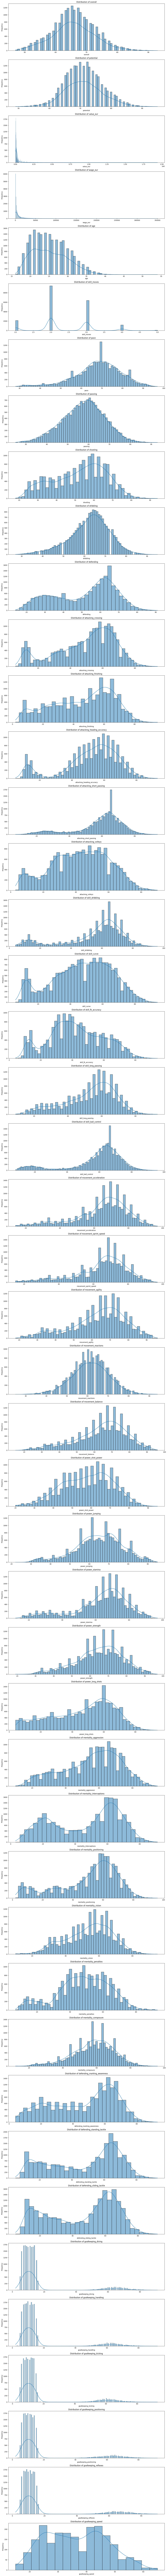

In [62]:
def plot_distributions(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, len(numerical_columns) * 5)) 
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns), 1, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_distributions( df[features_important])

In [63]:
def identify_outliers_zscore(df, column_name, threshold=3):
    mean_col = np.mean(df[column_name])
    std_col = np.std(df[column_name])
    
    df['z_score'] = (df[column_name] - mean_col) / std_col
    
    outliers = df[np.abs(df['z_score']) > threshold]

    df.drop(columns=['z_score'], inplace=True)
    
    return outliers

## Feature engineering

### Value in euro

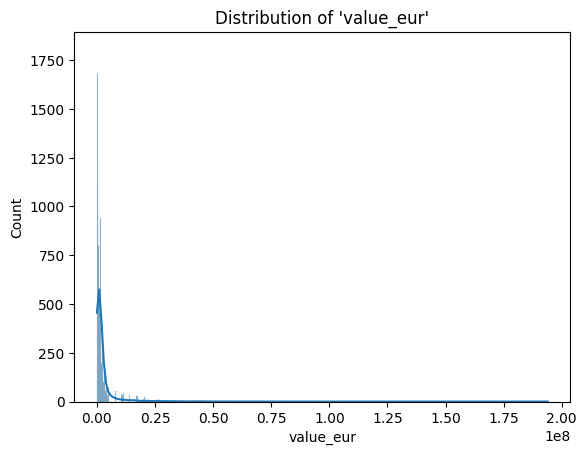

In [64]:
sns.histplot(df['value_eur'], kde=True)
plt.title("Distribution of 'value_eur'")
plt.show()

So we can see that we have a very long tail. IF we treat it as outliers, then we have over 10000 outliers. So better is to use box_cox transformation: 

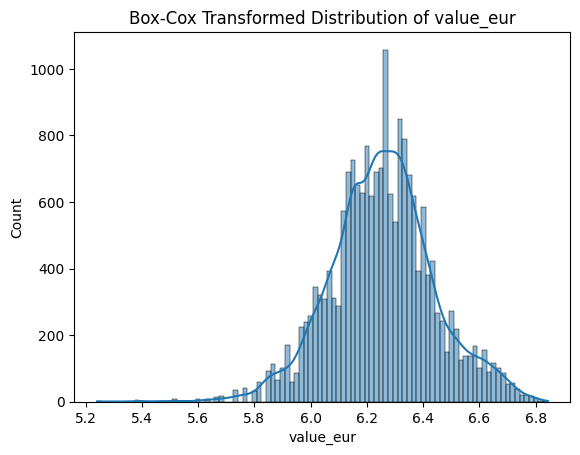

In [65]:
from scipy import stats

df_value = df[df['value_eur'] > 0]

df_value['value_eur'] = df_value['value_eur'].replace({0: np.nan}).fillna(1)

df_value['value_eur'], _ = stats.boxcox(df_value['value_eur'])

sns.histplot(df_value['value_eur'], kde=True)
plt.title('Box-Cox Transformed Distribution of value_eur')
plt.show()

In [66]:
outliers_value = identify_outliers_zscore(df_value, 'value_eur')
outliers_value

sofifa_id                                         player_url  \
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
6         231747  https://sofifa.com/player/231747/kylian-mbappe...   
9         202126  https://sofifa.com/player/202126/harry-kane/22...   
29        239085  https://sofifa.com/player/239085/erling-haalan...   
...          ...                                                ...   
19067     261983  https://sofifa.com/player/261983/ablet-kudrat/...   
19100     157190  https://sofifa.com/player/157190/john-russell/...   
19118     255618  https://sofifa.com/player/255618/xiang-gao/220002   
19139     259731  https://sofifa.com/player/259731/vikram-singh/...   
19178     250978    https://sofifa.com/player/250978/zhen-ma/220002   

         short_name                      long_name player_positions  overall  \
3         Neymar Jr  Neymar da Silva Santos Júnior          LW, CAM       91   
4      K. De Bruyne                Kevin De Bruyne          CM, CAM       91   
6         K. Mbappé           Kylian Mbappé Lottin           ST, LW       91   
9           H. Kane                     Harry Kane               ST       90   
29       E. Haaland           Erling Braut Haaland               ST       88   
...             ...                            ...              ...      ...   
19067  Kudrat Ablet                      库迪热提·阿布来提               GK       50   
19100    J. Russell                   John Russell          CM, CDM       49   
19118     Gao Xiang                             高翔               RW       49   
19139      V. Singh                   Vikram Singh               GK       49   
19178       Ma Zhen                             马镇               GK       48   

       potential  value_eur  wage_eur  age  ... RM  CAM  ST LW  RW CF RWB  \
3             91   6.811445  270000.0   29  ...  0    1   0  1   0  0   0   
4             91   6.809231  350000.0   30  ...  0    1   0  0   0  0   0   
6             95   6.843341  230000.0   22  ...  0    0   1  1   0  0   0   
9             90   6.811756  240000.0   27  ...  0    0   1  0   0  0   0   
29            93   6.816549  110000.0   20  ...  0    0   1  0   0  0   0   
...          ...        ...       ...  ...  ... ..  ...  .. ..  .. ..  ..   
19067         53   5.687895    1000.0   24  ...  0    0   0  0   0  0   0   
19100         49   5.384539     500.0   36  ...  0    0   0  0   0  0   0   
19118         49   5.603108    2000.0   32  ...  0    0   0  0   1  0   0   
19139         52   5.663273     500.0   27  ...  0    0   0  0   0  0   0   
19178         52   5.687895    1000.0   23  ...  0    0   0  0   0  0   0   

       LWB preferred_foot_encoded   z_score  
3        0                      0  3.020060  
4        0                      0  3.008039  
6        0                      0  3.193237  
9        0                      0  3.021747  
29       0                      1  3.047775  
...    ...                    ...       ...  
19067    0                      0 -3.080193  
19100    0                      0 -4.727252  
19118    0                      0 -3.540543  
19139    0                      0 -3.213880  
19178    0                      0 -3.080193  

[69 rows x 104 columns]

In [67]:
outliers_value = identify_outliers_zscore(df_value, 'value_eur')

df_value = df_value.drop(outliers_value.index)


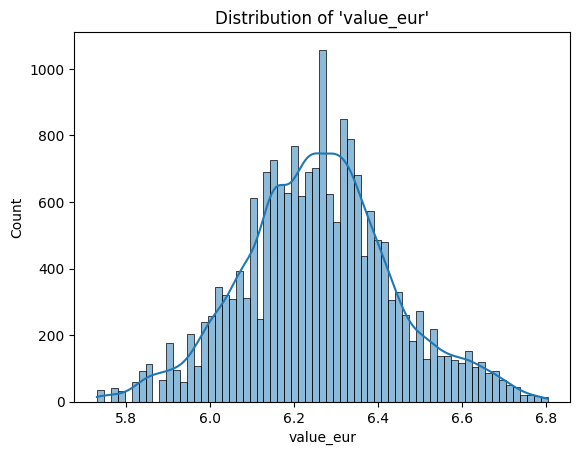

In [68]:
sns.histplot(df_value['value_eur'], kde=True)
plt.title("Distribution of 'value_eur'")
plt.show()

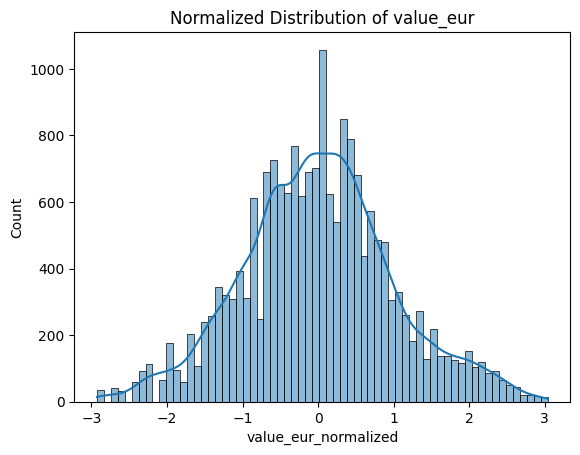

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_value['value_eur_normalized'] = scaler.fit_transform(df_value[['value_eur']])

sns.histplot(df_value['value_eur_normalized'], kde=True)
plt.title('Normalized Distribution of value_eur')
plt.show()

#### Wage in euro 

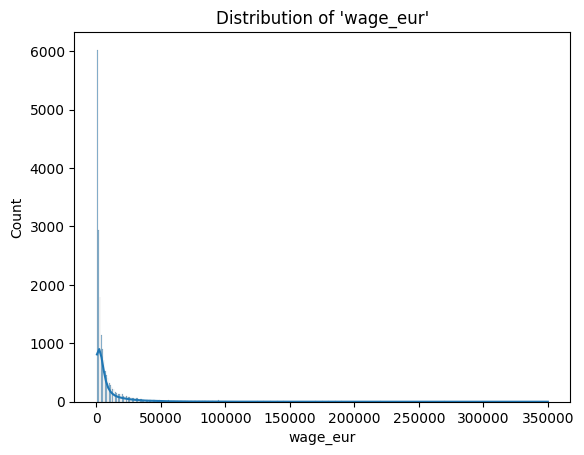

In [70]:
sns.histplot(df['wage_eur'], kde=True)
plt.title("Distribution of 'wage_eur'")
plt.show()

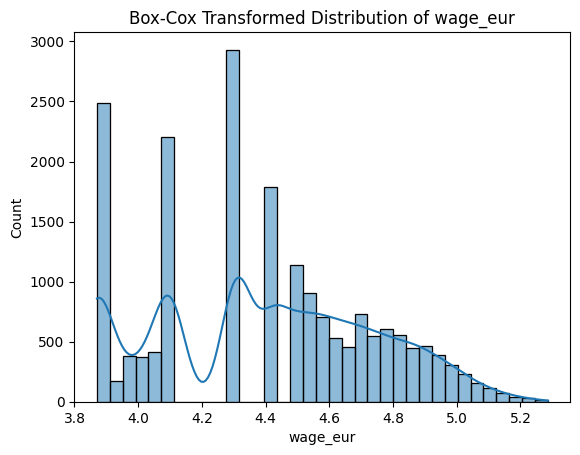

In [71]:
from scipy import stats

df_wage = df[df['wage_eur'] > 0]

df_wage['wage_eur'] = df_wage['wage_eur'].replace({0: np.nan}).fillna(1)

df_wage['wage_eur'], _ = stats.boxcox(df_wage['wage_eur'])

sns.histplot(df_wage['wage_eur'], kde=True)
plt.title('Box-Cox Transformed Distribution of wage_eur')
plt.show()

In [72]:
outliers_wage = identify_outliers_zscore(df_wage, 'wage_eur')

df_wage = df_wage.drop(outliers_wage.index)

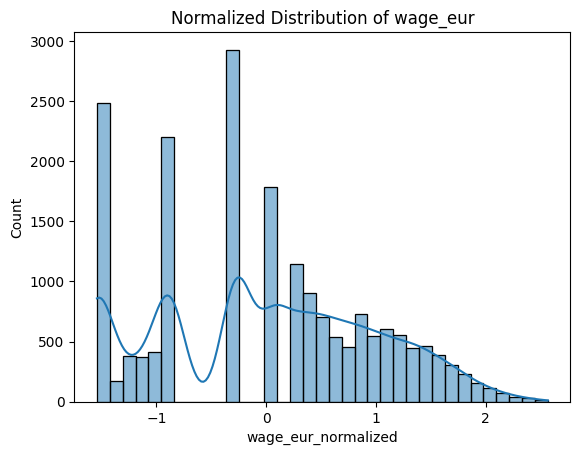

In [73]:
scaler = StandardScaler()

df_wage['wage_eur_normalized'] = scaler.fit_transform(df_wage[['wage_eur']])

sns.histplot(df_wage['wage_eur_normalized'], kde=True)
plt.title('Normalized Distribution of wage_eur')
plt.show()

We will leave it as it is, despite having those sharp spikes 

### General skills and Goalkeeping skills

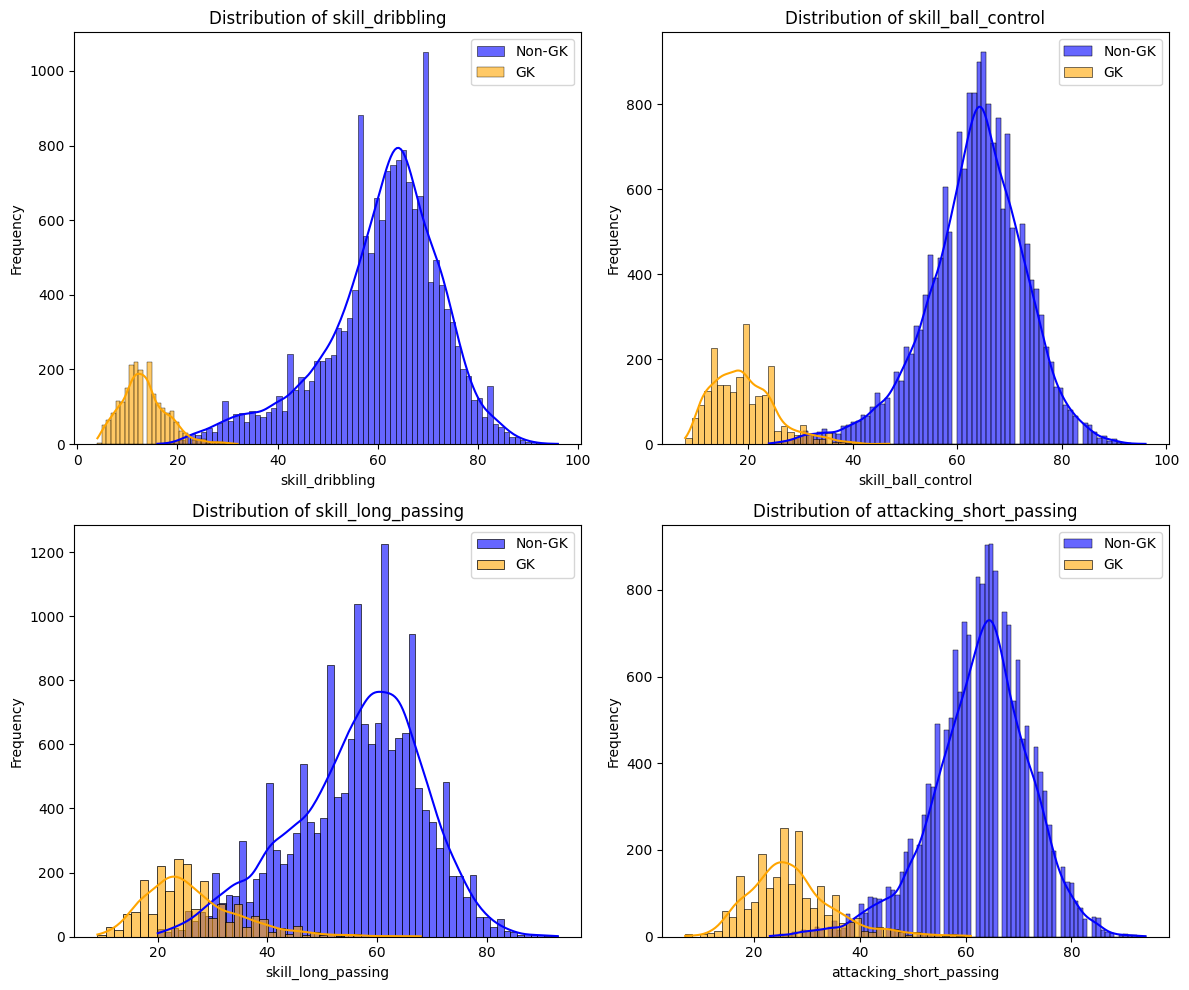

In [74]:
features = ['skill_dribbling', 'skill_ball_control', 'skill_long_passing', 'attacking_short_passing']

df['is_GK'] = df['player_positions'].apply(lambda x: 'GK' in x.split(', '))

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    
    sns.histplot(df[df['is_GK'] == False][feature], kde=True, color='blue', label='Non-GK', alpha=0.6)
    
    sns.histplot(df[df['is_GK'] == True][feature], kde=True, color='orange', label='GK', alpha=0.6)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.legend()

plt.tight_layout()
plt.show()


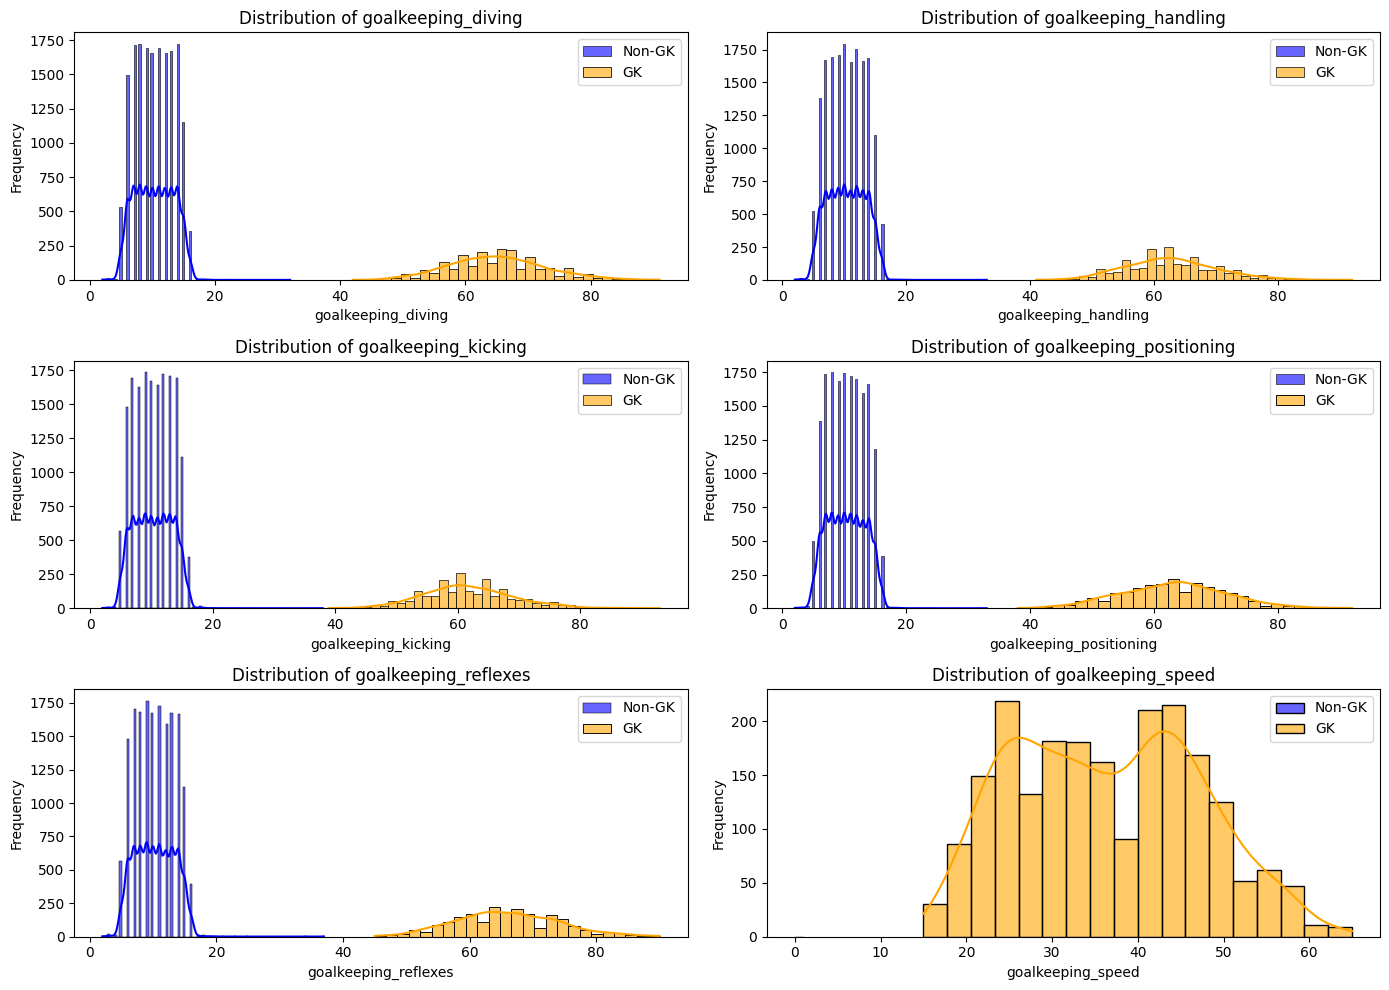

In [75]:
features_goalkeepers = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
                        'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']


plt.figure(figsize=(14, 10))

for i, feature in enumerate(features_goalkeepers, 1):
    plt.subplot(3, 2, i)
    
    sns.histplot(df[df['is_GK'] == False][feature], kde=True, color='blue', label='Non-GK', alpha=0.6)
    
    sns.histplot(df[df['is_GK'] == True][feature], kde=True, color='orange', label='GK', alpha=0.6)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)  
    plt.ylabel('Frequency')
    
    plt.legend()

plt.tight_layout()
plt.show()


We can easily distinguish goalkeepers from non goalkeepers based whether or not they have a goalkeeping_Speed and their goalkeeping_skills

In [76]:
df['goalkeeping_total'] = df[['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis=1)

df[['goalkeeping_total']]

goalkeeping_total
0                   10.8
1                   10.2
2                   11.6
3                   11.8
4                   11.2
...                  ...
19234                9.8
19235                9.4
19236                7.4
19237               10.6
19238               11.4

[19239 rows x 1 columns]

### Distribution without goalkeepers

We notice that the goalkeepers messing the distribution diagrams, but they are easily distinguishable from other players. So we will analyse the dataframe without them now.

In [77]:
df_no_GK = df.copy()
df_no_GK = df_no_GK[~df_no_GK['player_positions'].str.contains('GK')]

df_no_GK.reset_index(drop=True, inplace=True)
df_no_GK

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
17102     261962  https://sofifa.com/player/261962/defu-song/220002   
17103     262040  https://sofifa.com/player/262040/caoimhin-port...   
17104     262760  https://sofifa.com/player/262760/nathan-logue/...   
17105     262820  https://sofifa.com/player/262820/luke-rudden/2...   
17106     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
17102           Song Defu                                  宋德福   
17103           C. Porter                      Caoimhin Porter   
17104            N. Logue              Nathan Logue-Cunningham   
17105           L. Rudden                          Luke Rudden   
17106  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
17102              CDM       47         52      70000.0    1000.0   22  ...   
17103               CM       47         59     110000.0     500.0   19  ...   
17104               CM       47         55     100000.0     500.0   21  ...   
17105               ST       47         60     110000.0     500.0   19  ...   
17106              CAM       47         60     110000.0     500.0   19  ...   

      CAM  ST  LW RW  CF RWB LWB  preferred_foot_encoded  is_GK  \
0       0   1   0  1   1   0   0                       1  False   
1       0   1   0  0   0   0   0                       0  False   
2       0   1   1  0   0   0   0                       0  False   
3       1   0   1  0   0   0   0                       0  False   
4       1   0   0  0   0   0   0                       0  False   
...    ..  ..  .. ..  ..  ..  ..                     ...    ...   
17102   0   0   0  0   0   0   0                       0  False   
17103   0   0   0  0   0   0   0                       0  False   
17104   0   0   0  0   0   0   0                       0  False   
17105   0   1   0  0   0   0   0                       0  False   
17106   1   0   0  0   0   0   0                       0  False   

      goalkeeping_total  
0                  10.8  
1                  10.2  
2                  11.6  
3                  11.8  
4                  11.2  
...                 ...  
17102               9.8  
17103               9.4  
17104               7.4  
17105              10.6  
17106              11.4  

[17107 rows x 105 columns]

In [78]:
attacking = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
skills = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
movement = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
power = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
mentality = ['mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
defending = ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'defending']
other = ['skill_moves', 'pace', 'passing', 'shooting', 'dribbling']

### Attacking

In [79]:
df_no_GK['attacking_average'] = df_no_GK[attacking].mean(axis=1)
df_no_GK['attacking_average']

0        85.8
1        86.0
2        87.6
3        80.6
4        81.4
         ... 
17102    41.2
17103    43.2
17104    40.0
17105    38.0
17106    40.8
Name: attacking_average, Length: 17107, dtype: float64

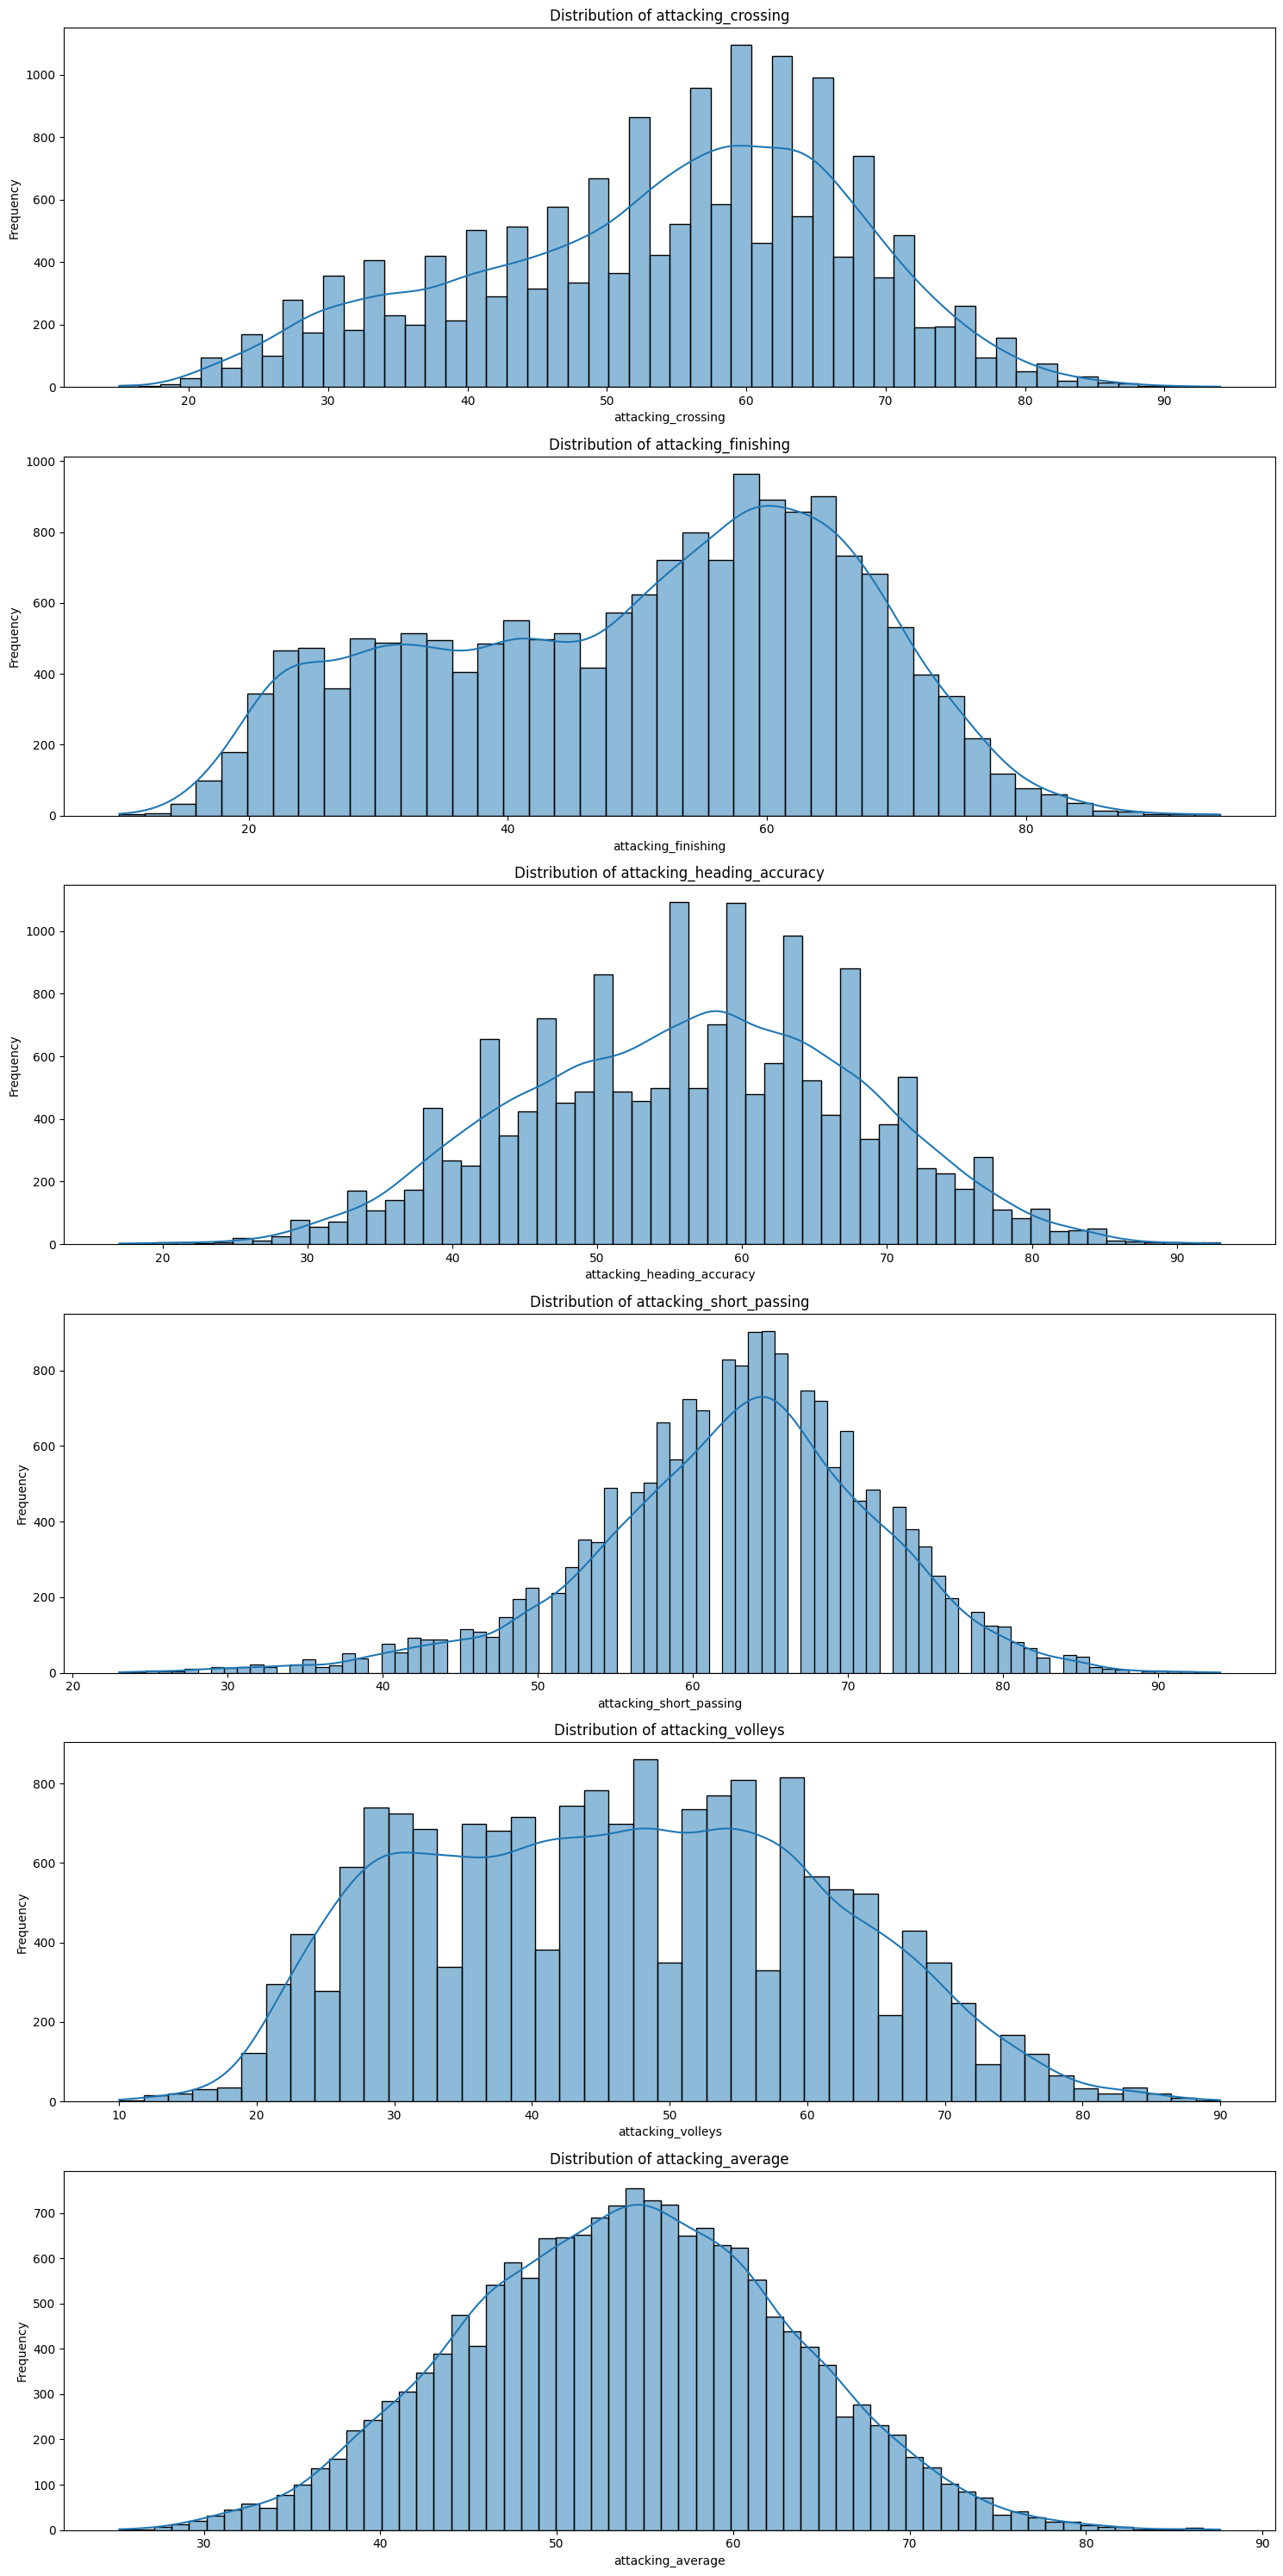

In [80]:
attacking.append('attacking_average')

plot_distributions(df_no_GK[attacking])

#### Attacking crossing

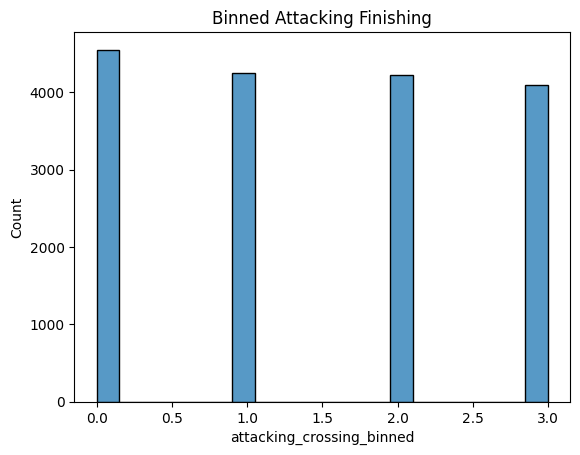

In [81]:
df_no_GK['attacking_crossing_binned'] = pd.qcut(df_no_GK['attacking_crossing'], q=4, labels=False)

sns.histplot(df_no_GK['attacking_crossing_binned'], kde=False)
plt.title('Binned Attacking Finishing')
plt.show()


#### Attacking finishing

In [82]:
df_no_GK['attacking_finishing_binned'] = pd.qcut(df_no_GK['attacking_finishing'], q=4, labels=False)

#### Attacking heading accuracy 

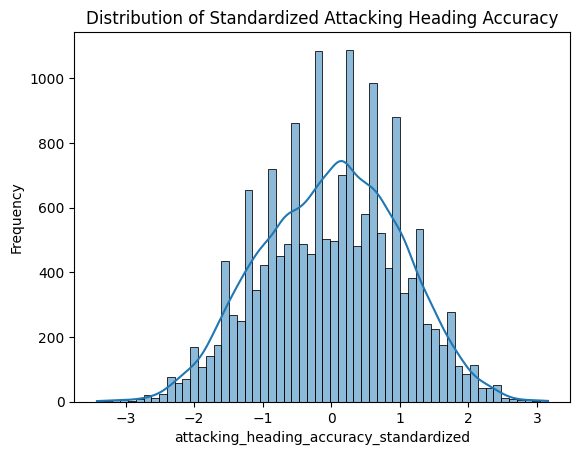

In [83]:
scaler_standard = StandardScaler()
df_no_GK['attacking_heading_accuracy_standardized'] = scaler_standard.fit_transform(df_no_GK[['attacking_heading_accuracy']])

sns.histplot(df_no_GK['attacking_heading_accuracy_standardized'], kde=True)
plt.title('Distribution of Standardized Attacking Heading Accuracy')
plt.xlabel('attacking_heading_accuracy_standardized')
plt.ylabel('Frequency')
plt.show()

#### Attacking short passing

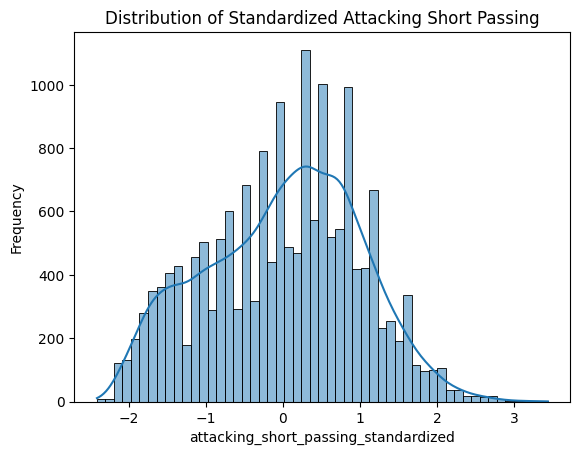

In [84]:
df_no_GK['attacking_short_passing_boxcox'], _ = stats.boxcox(df_no_GK['attacking_crossing'] + 1)

df_no_GK['attacking_short_passing_standardized'] = scaler_standard.fit_transform(df_no_GK[['attacking_short_passing_boxcox']])

df_no_GK = df_no_GK.drop('attacking_short_passing_boxcox', axis = 1)

sns.histplot(df_no_GK['attacking_short_passing_standardized'], kde=True)
plt.title('Distribution of Standardized Attacking Short Passing')
plt.xlabel('attacking_short_passing_standardized')
plt.ylabel('Frequency')
plt.show()

#### Attacking volleys

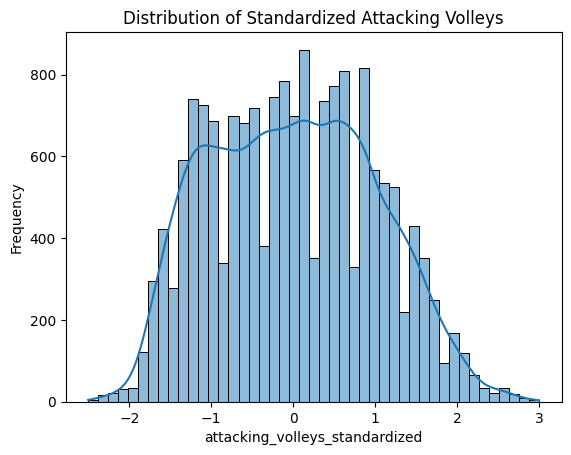

In [85]:
df_no_GK['attacking_volleys_standardized'] = scaler_standard.fit_transform(df_no_GK[['attacking_volleys']])

sns.histplot(df_no_GK['attacking_volleys_standardized'], kde=True)
plt.title('Distribution of Standardized Attacking Volleys')
plt.xlabel('attacking_volleys_standardized')
plt.ylabel('Frequency')
plt.show()

### Skills

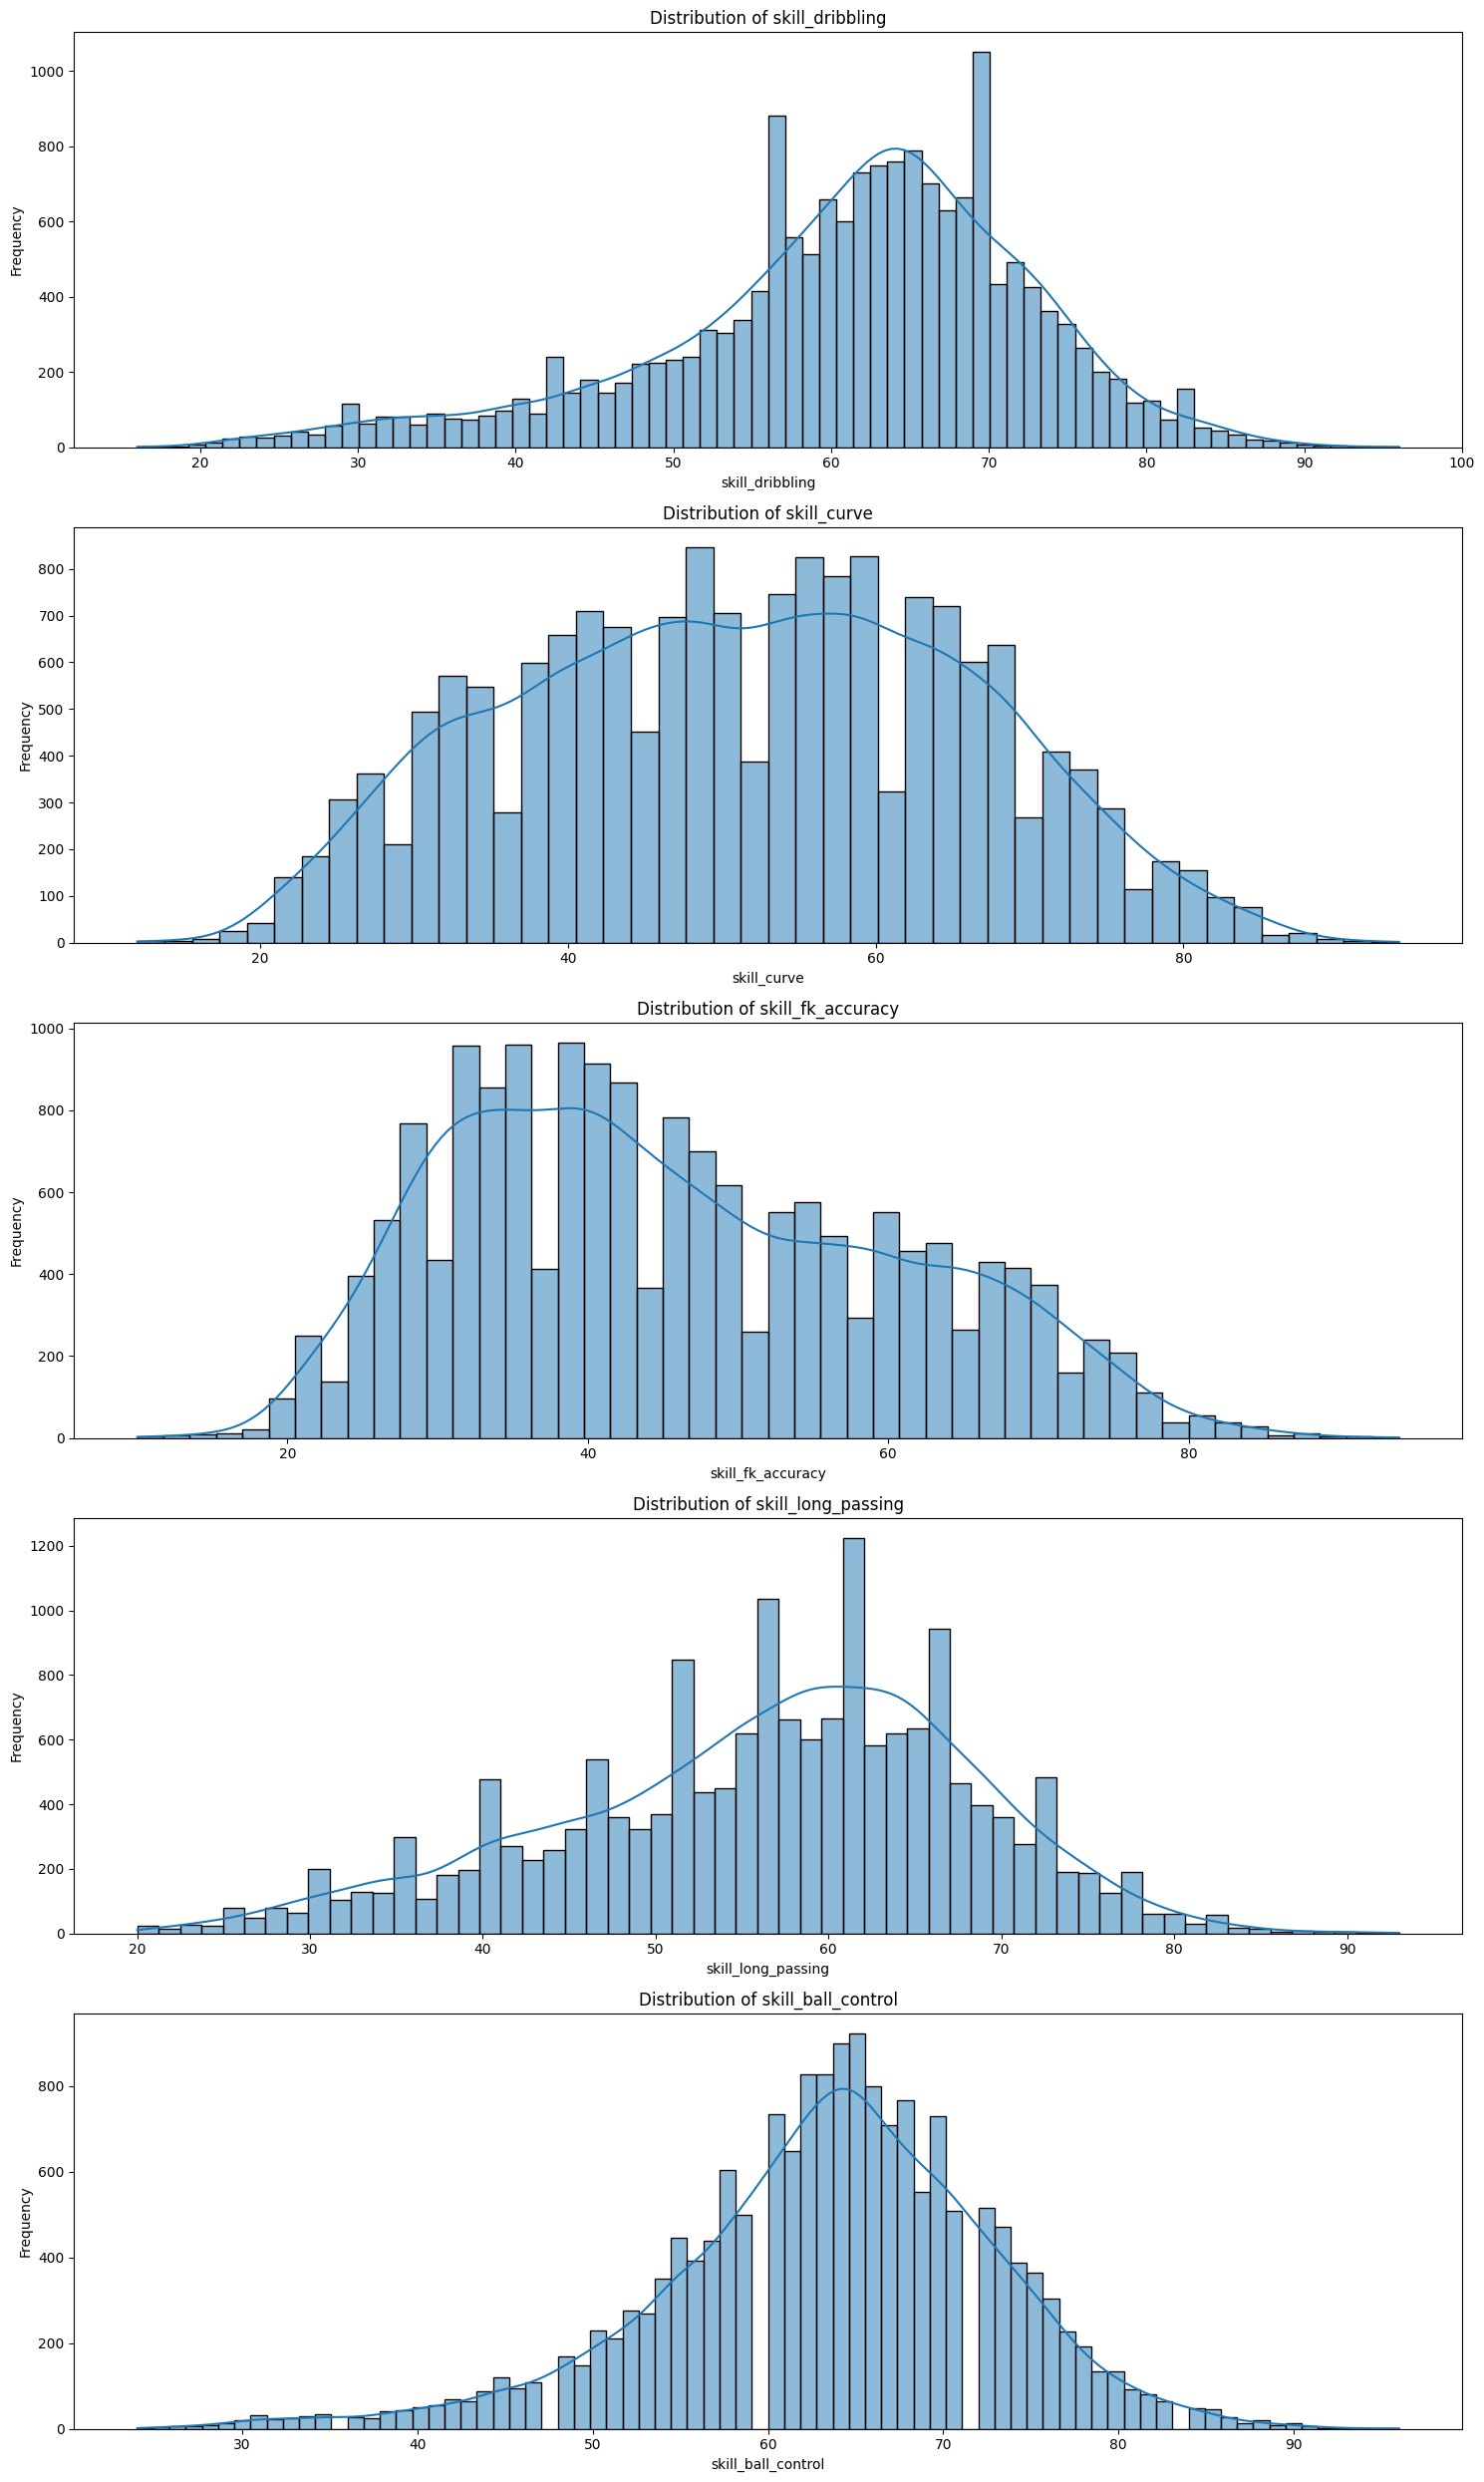

In [86]:
plot_distributions(df_no_GK[skills])

#### Skill Dribbling

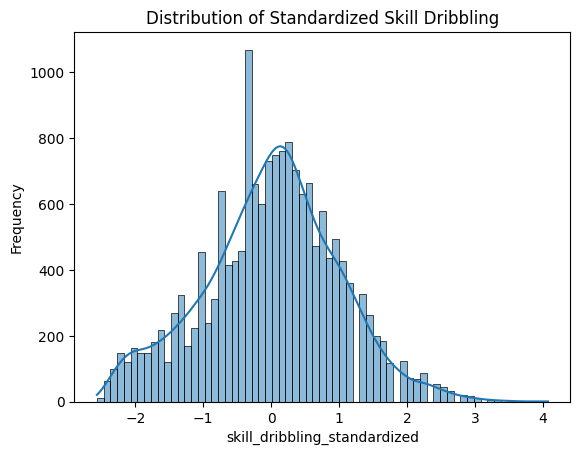

In [87]:
df_no_GK['skill_dribbling_boxcox'], _ = stats.boxcox(df_no_GK['skill_dribbling'] + 1)

df_no_GK['skill_dribbling_standardized'] = scaler_standard.fit_transform(df_no_GK[['skill_dribbling_boxcox']])

df_no_GK = df_no_GK.drop('skill_dribbling_boxcox', axis = 1)

sns.histplot(df_no_GK['skill_dribbling_standardized'], kde=True)
plt.title('Distribution of Standardized Skill Dribbling')
plt.xlabel('skill_dribbling_standardized')
plt.ylabel('Frequency')
plt.show()

#### Skill curve

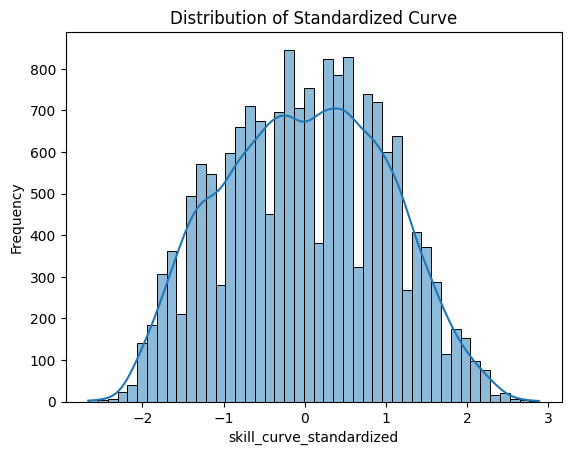

In [88]:
df_no_GK['skill_curve_standardized'] = scaler_standard.fit_transform(df_no_GK[['skill_curve']])

sns.histplot(df_no_GK['skill_curve_standardized'], kde=True)
plt.title('Distribution of Standardized Curve')
plt.xlabel('skill_curve_standardized')
plt.ylabel('Frequency')
plt.show()

#### Skill Long Passing

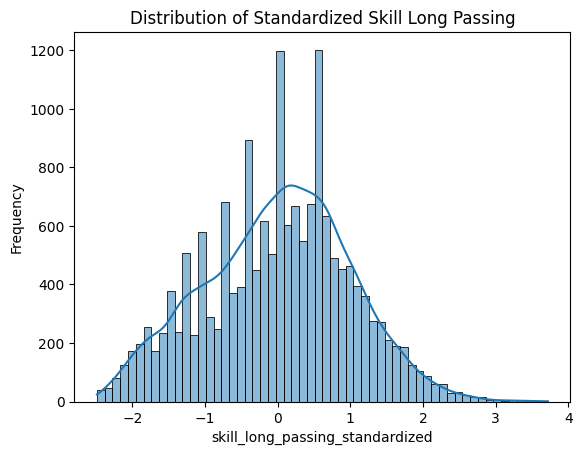

In [89]:
df_no_GK['skill_long_passing_boxcox'], _ = stats.boxcox(df_no_GK['skill_long_passing'] + 1)

df_no_GK['skill_long_passing_standardized'] = scaler_standard.fit_transform(df_no_GK[['skill_long_passing_boxcox']])

df_no_GK = df_no_GK.drop('skill_long_passing_boxcox', axis = 1)

sns.histplot(df_no_GK['skill_long_passing_standardized'], kde=True)
plt.title('Distribution of Standardized Skill Long Passing')
plt.xlabel('skill_long_passing_standardized')
plt.ylabel('Frequency')
plt.show()

#### Skill Ball Control

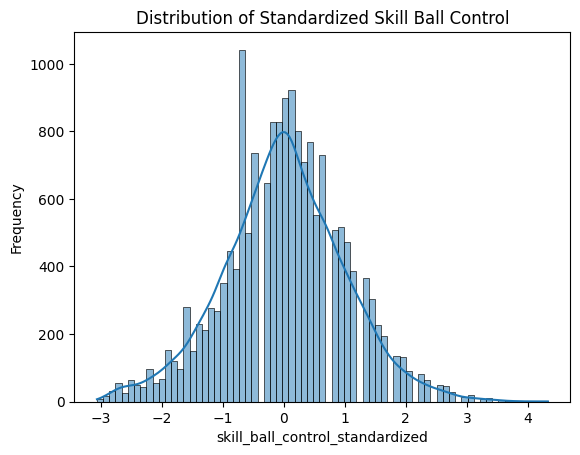

In [90]:
df_no_GK['skill_ball_control_boxcox'], _ = stats.boxcox(df_no_GK['skill_ball_control'] + 1)

df_no_GK['skill_ball_control_standardized'] = scaler_standard.fit_transform(df_no_GK[['skill_ball_control_boxcox']])

df_no_GK = df_no_GK.drop('skill_ball_control_boxcox', axis = 1)

sns.histplot(df_no_GK['skill_ball_control_standardized'], kde=True)
plt.title('Distribution of Standardized Skill Ball Control')
plt.xlabel('skill_ball_control_standardized')
plt.ylabel('Frequency')
plt.show()

### Movement

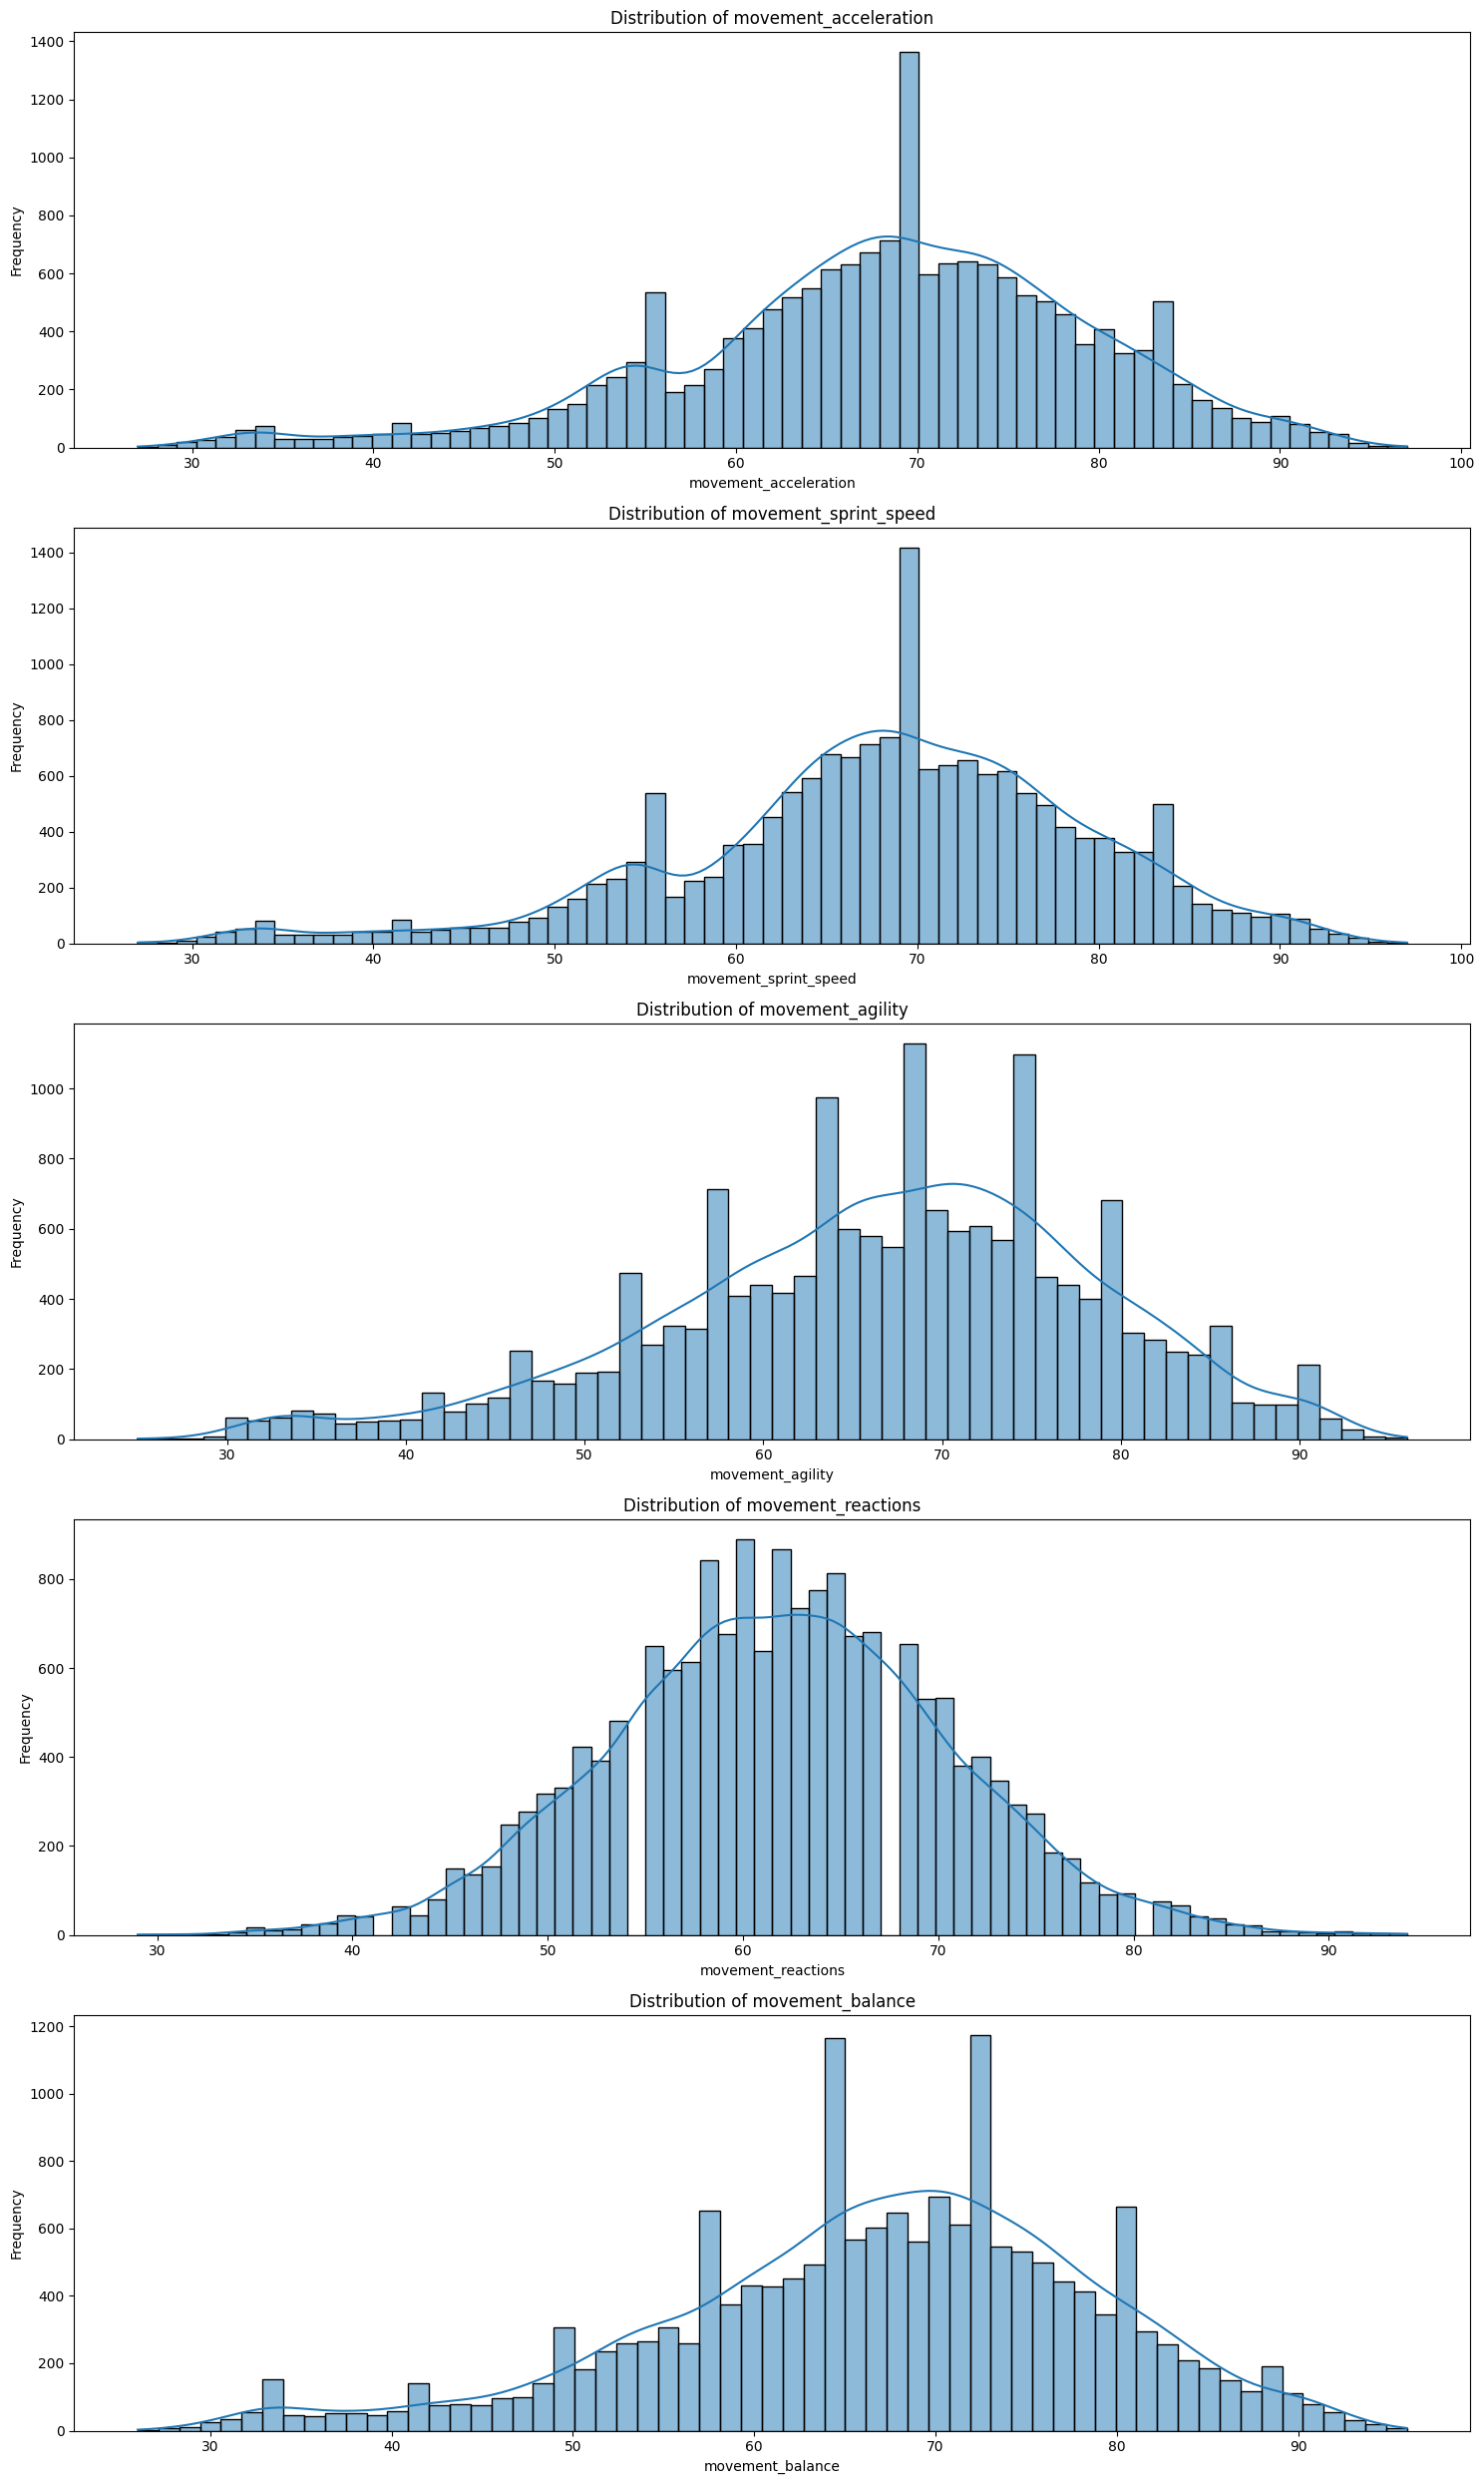

In [91]:
plot_distributions(df_no_GK[movement])

#### Movement Acceleration

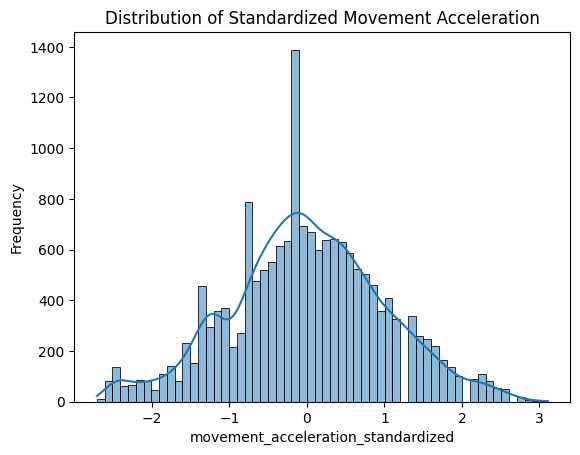

In [92]:
df_no_GK['movement_acceleration_boxcox'], _ = stats.boxcox(df_no_GK['movement_acceleration'] + 1)

df_no_GK['movement_acceleration_binn'] = pd.qcut(df_no_GK['movement_acceleration'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['movement_acceleration_standardized'] = scaler_standard.fit_transform(df_no_GK[['movement_acceleration_boxcox']])

df_no_GK = df_no_GK.drop('movement_acceleration_boxcox', axis = 1)

sns.histplot(df_no_GK['movement_acceleration_standardized'], kde=True)
plt.title('Distribution of Standardized Movement Acceleration')
plt.xlabel('movement_acceleration_standardized')
plt.ylabel('Frequency')
plt.show()

#### Movement Sprint Speed

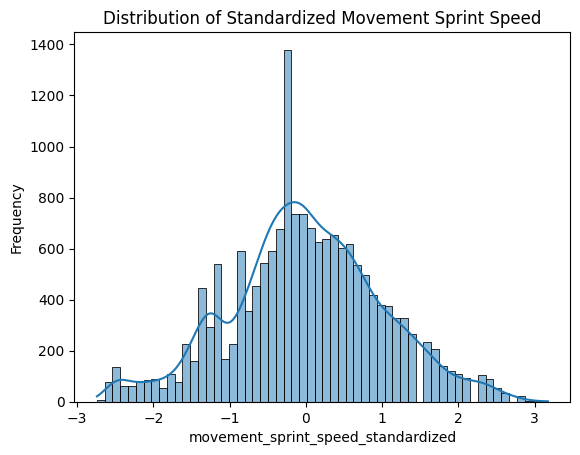

In [93]:
df_no_GK['movement_sprint_speed_binn'] = pd.qcut(df_no_GK['movement_sprint_speed'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['movement_sprint_speed_boxcox'], _ = stats.boxcox(df_no_GK['movement_sprint_speed'] + 1)

df_no_GK['movement_sprint_speed_standardized'] = scaler_standard.fit_transform(df_no_GK[['movement_sprint_speed_boxcox']])

df_no_GK = df_no_GK.drop('movement_sprint_speed_boxcox', axis = 1)

sns.histplot(df_no_GK['movement_sprint_speed_standardized'], kde=True)
plt.title('Distribution of Standardized Movement Sprint Speed')
plt.xlabel('movement_sprint_speed_standardized')
plt.ylabel('Frequency')
plt.show()

#### Movement Agility

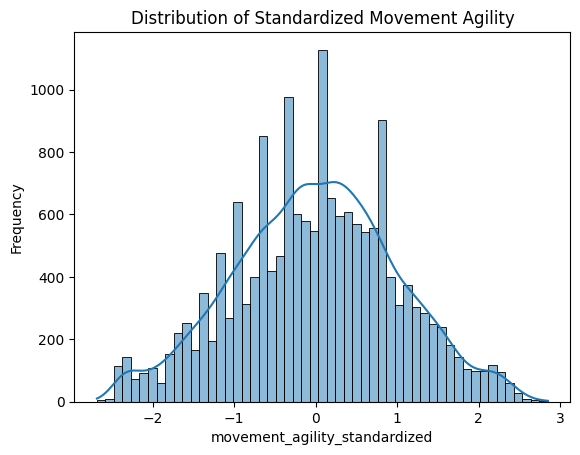

In [94]:
df_no_GK['movement_agility_binn'] = pd.qcut(df_no_GK['movement_agility'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['movement_agility_boxcox'], _ = stats.boxcox(df_no_GK['movement_agility'] + 1)

df_no_GK['movement_agility_standardized'] = scaler_standard.fit_transform(df_no_GK[['movement_agility_boxcox']])

df_no_GK = df_no_GK.drop('movement_agility_boxcox', axis = 1)

sns.histplot(df_no_GK['movement_agility_standardized'], kde=True)
plt.title('Distribution of Standardized Movement Agility')
plt.xlabel('movement_agility_standardized')
plt.ylabel('Frequency')
plt.show()

#### Movement Reactions

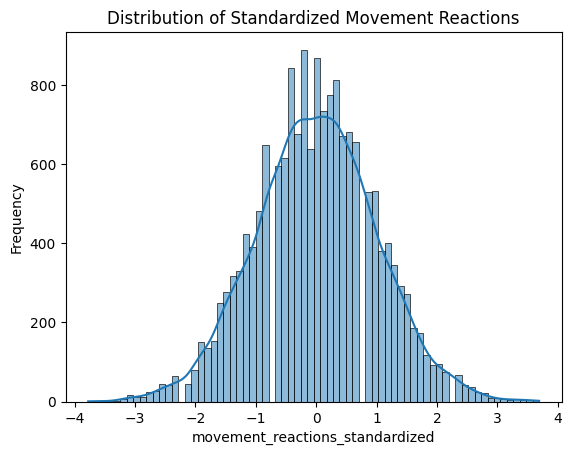

In [95]:
df_no_GK['movement_reactions_standardized'] = scaler_standard.fit_transform(df_no_GK[['movement_reactions']])

sns.histplot(df_no_GK['movement_reactions_standardized'], kde=True)
plt.title('Distribution of Standardized Movement Reactions')
plt.xlabel('movement_reactions_standardized')
plt.ylabel('Frequency')
plt.show()

#### Movement Balance

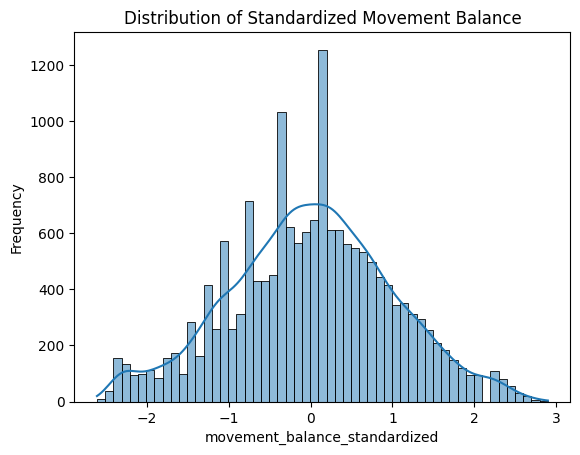

In [96]:
df_no_GK['movement_balance_binn'] = pd.qcut(df_no_GK['movement_balance'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['movement_balance_boxcox'], _ = stats.boxcox(df_no_GK['movement_balance'] + 1)

df_no_GK['movement_balance_standardized'] = scaler_standard.fit_transform(df_no_GK[['movement_balance_boxcox']])

df_no_GK = df_no_GK.drop('movement_balance_boxcox', axis = 1)

sns.histplot(df_no_GK['movement_balance_standardized'], kde=True)
plt.title('Distribution of Standardized Movement Balance')
plt.xlabel('movement_balance_standardized')
plt.ylabel('Frequency')
plt.show()

### Power

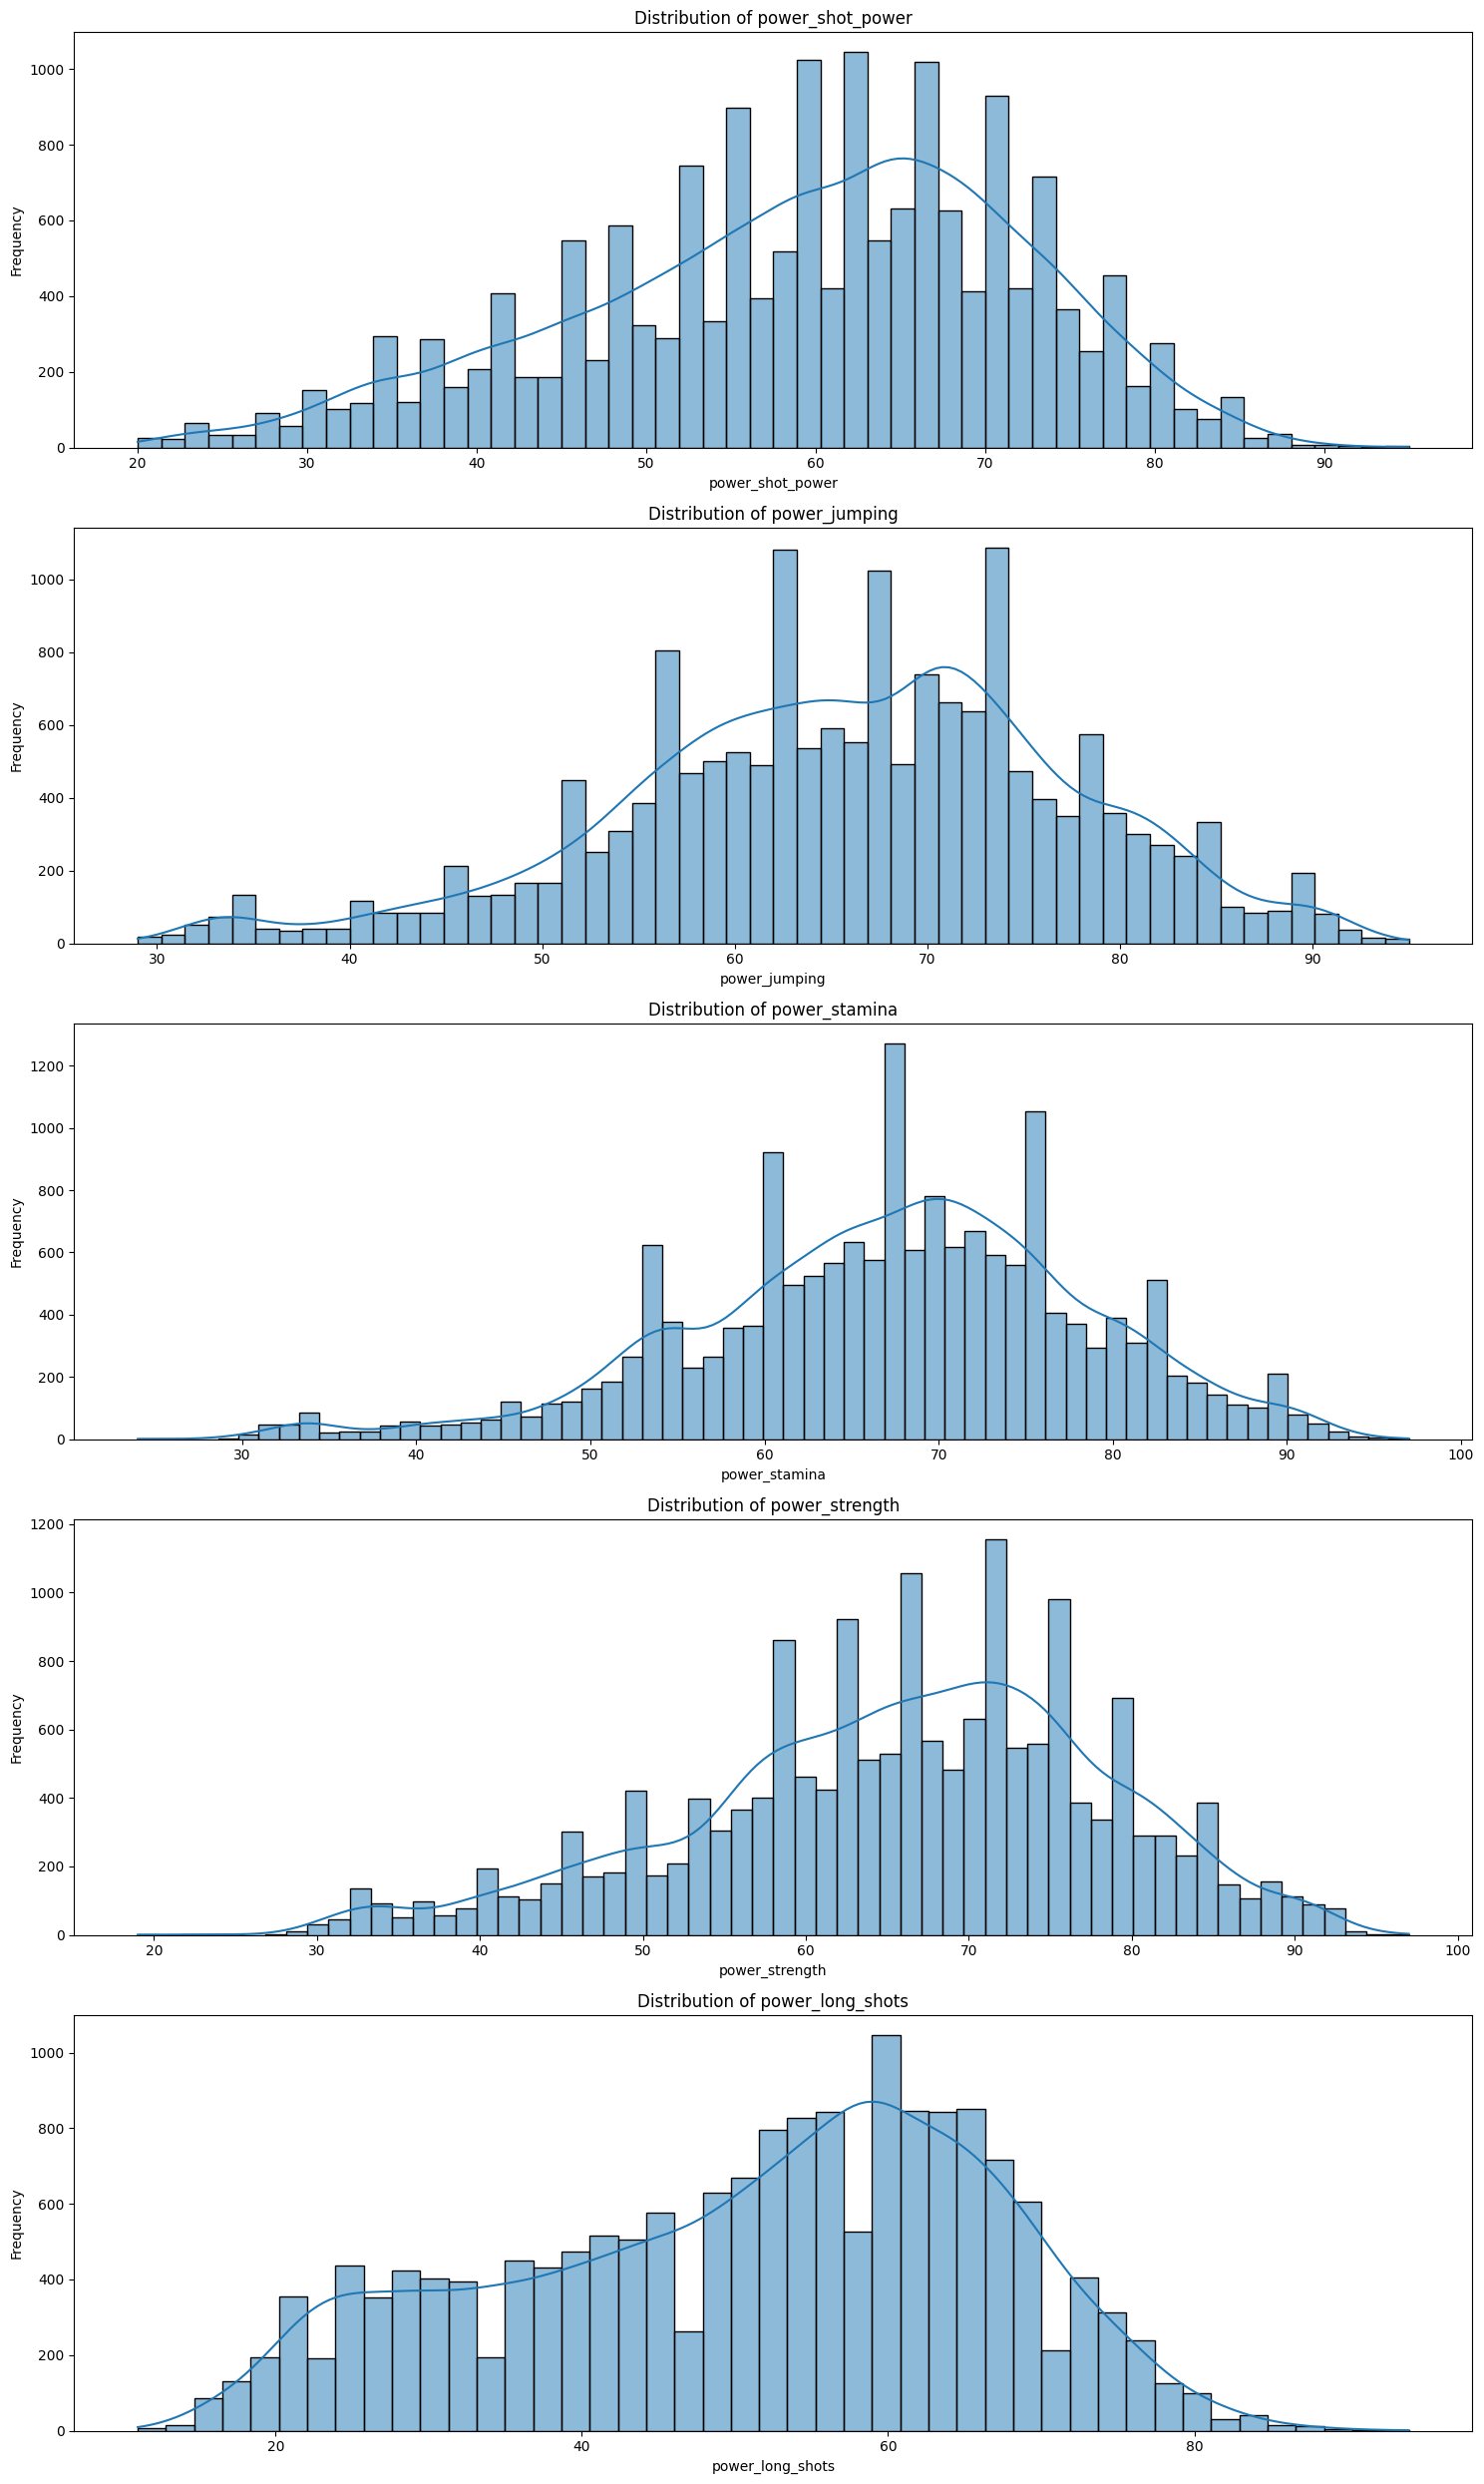

In [97]:
plot_distributions(df_no_GK[power])

#### Power Shot Power

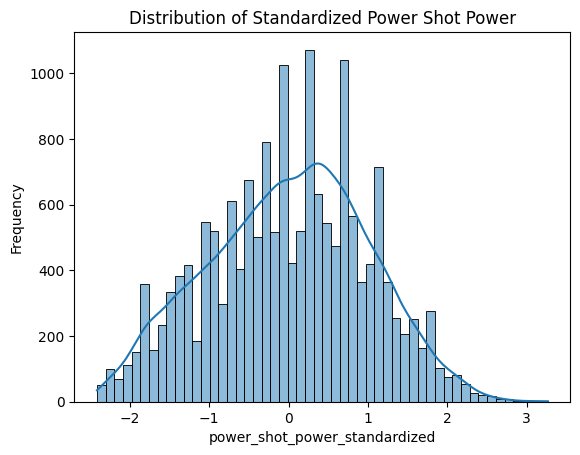

In [98]:
df_no_GK['power_shot_power_binn'] = pd.qcut(df_no_GK['power_shot_power'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['power_shot_power_boxcox'], _ = stats.boxcox(df_no_GK['power_shot_power'] + 1)

df_no_GK['power_shot_power_standardized'] = scaler_standard.fit_transform(df_no_GK[['power_shot_power_boxcox']])

df_no_GK = df_no_GK.drop('power_shot_power_boxcox', axis = 1)

sns.histplot(df_no_GK['power_shot_power_standardized'], kde=True)
plt.title('Distribution of Standardized Power Shot Power')
plt.xlabel('power_shot_power_standardized')
plt.ylabel('Frequency')
plt.show()

#### Power jumping

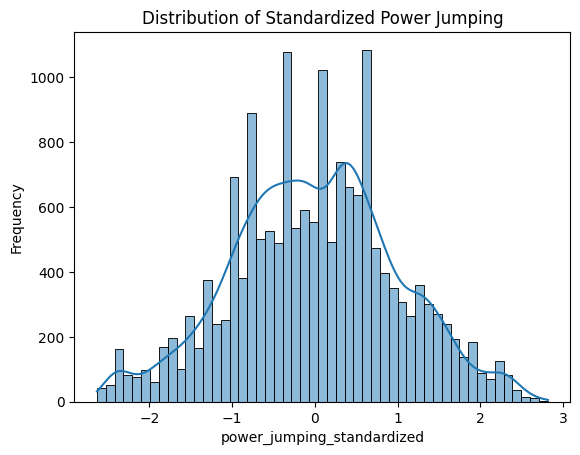

In [99]:
df_no_GK['power_jumping_binn'] = pd.qcut(df_no_GK['power_jumping'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['power_jumping_boxcox'], _ = stats.boxcox(df_no_GK['power_jumping'] + 1)

df_no_GK['power_jumping_standardized'] = scaler_standard.fit_transform(df_no_GK[['power_jumping_boxcox']])

df_no_GK = df_no_GK.drop('power_jumping_boxcox', axis = 1)

sns.histplot(df_no_GK['power_jumping_standardized'], kde=True)
plt.title('Distribution of Standardized Power Jumping')
plt.xlabel('power_jumping_standardized')
plt.ylabel('Frequency')
plt.show()

#### Power Stamina

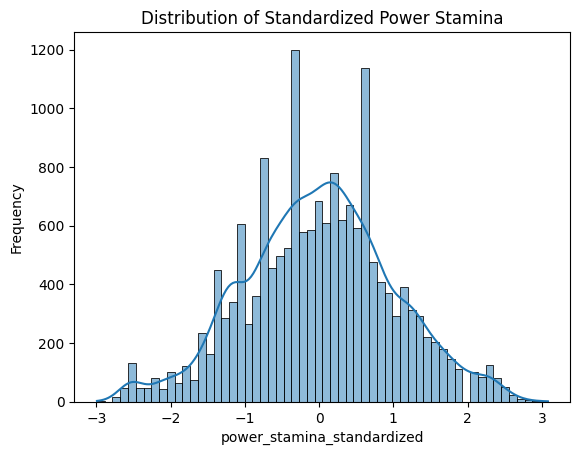

In [100]:
df_no_GK['power_stamina_binn'] = pd.qcut(df_no_GK['power_stamina'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['power_stamina_boxcox'], _ = stats.boxcox(df_no_GK['power_stamina'] + 1)

df_no_GK['power_stamina_standardized'] = scaler_standard.fit_transform(df_no_GK[['power_stamina_boxcox']])

df_no_GK = df_no_GK.drop('power_stamina_boxcox', axis = 1)

sns.histplot(df_no_GK['power_stamina_standardized'], kde=True)
plt.title('Distribution of Standardized Power Stamina')
plt.xlabel('power_stamina_standardized')
plt.ylabel('Frequency')
plt.show()

#### Power Strength

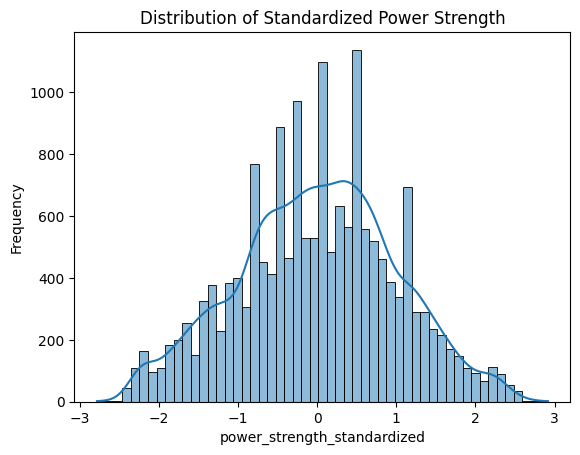

In [101]:
df_no_GK['power_strength_binn'] = pd.qcut(df_no_GK['power_strength'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['power_strength_boxcox'], _ = stats.boxcox(df_no_GK['power_strength'] + 1)

df_no_GK['power_strength_standardized'] = scaler_standard.fit_transform(df_no_GK[['power_strength_boxcox']])

df_no_GK = df_no_GK.drop('power_strength_boxcox', axis = 1)

sns.histplot(df_no_GK['power_strength_standardized'], kde=True)
plt.title('Distribution of Standardized Power Strength')
plt.xlabel('power_strength_standardized')
plt.ylabel('Frequency')
plt.show()

#### Power long shots

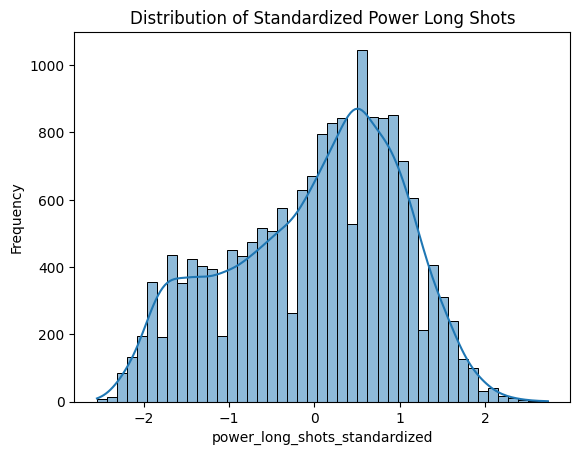

In [102]:
df_no_GK['power_long_shots_binn'] = pd.qcut(df_no_GK['power_long_shots'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

df_no_GK['power_long_shots_standardized'] = scaler_standard.fit_transform(df_no_GK[['power_long_shots']])

sns.histplot(df_no_GK['power_long_shots_standardized'], kde=True)
plt.title('Distribution of Standardized Power Long Shots')
plt.xlabel('power_long_shots_standardized')
plt.ylabel('Frequency')
plt.show()

### Mentality

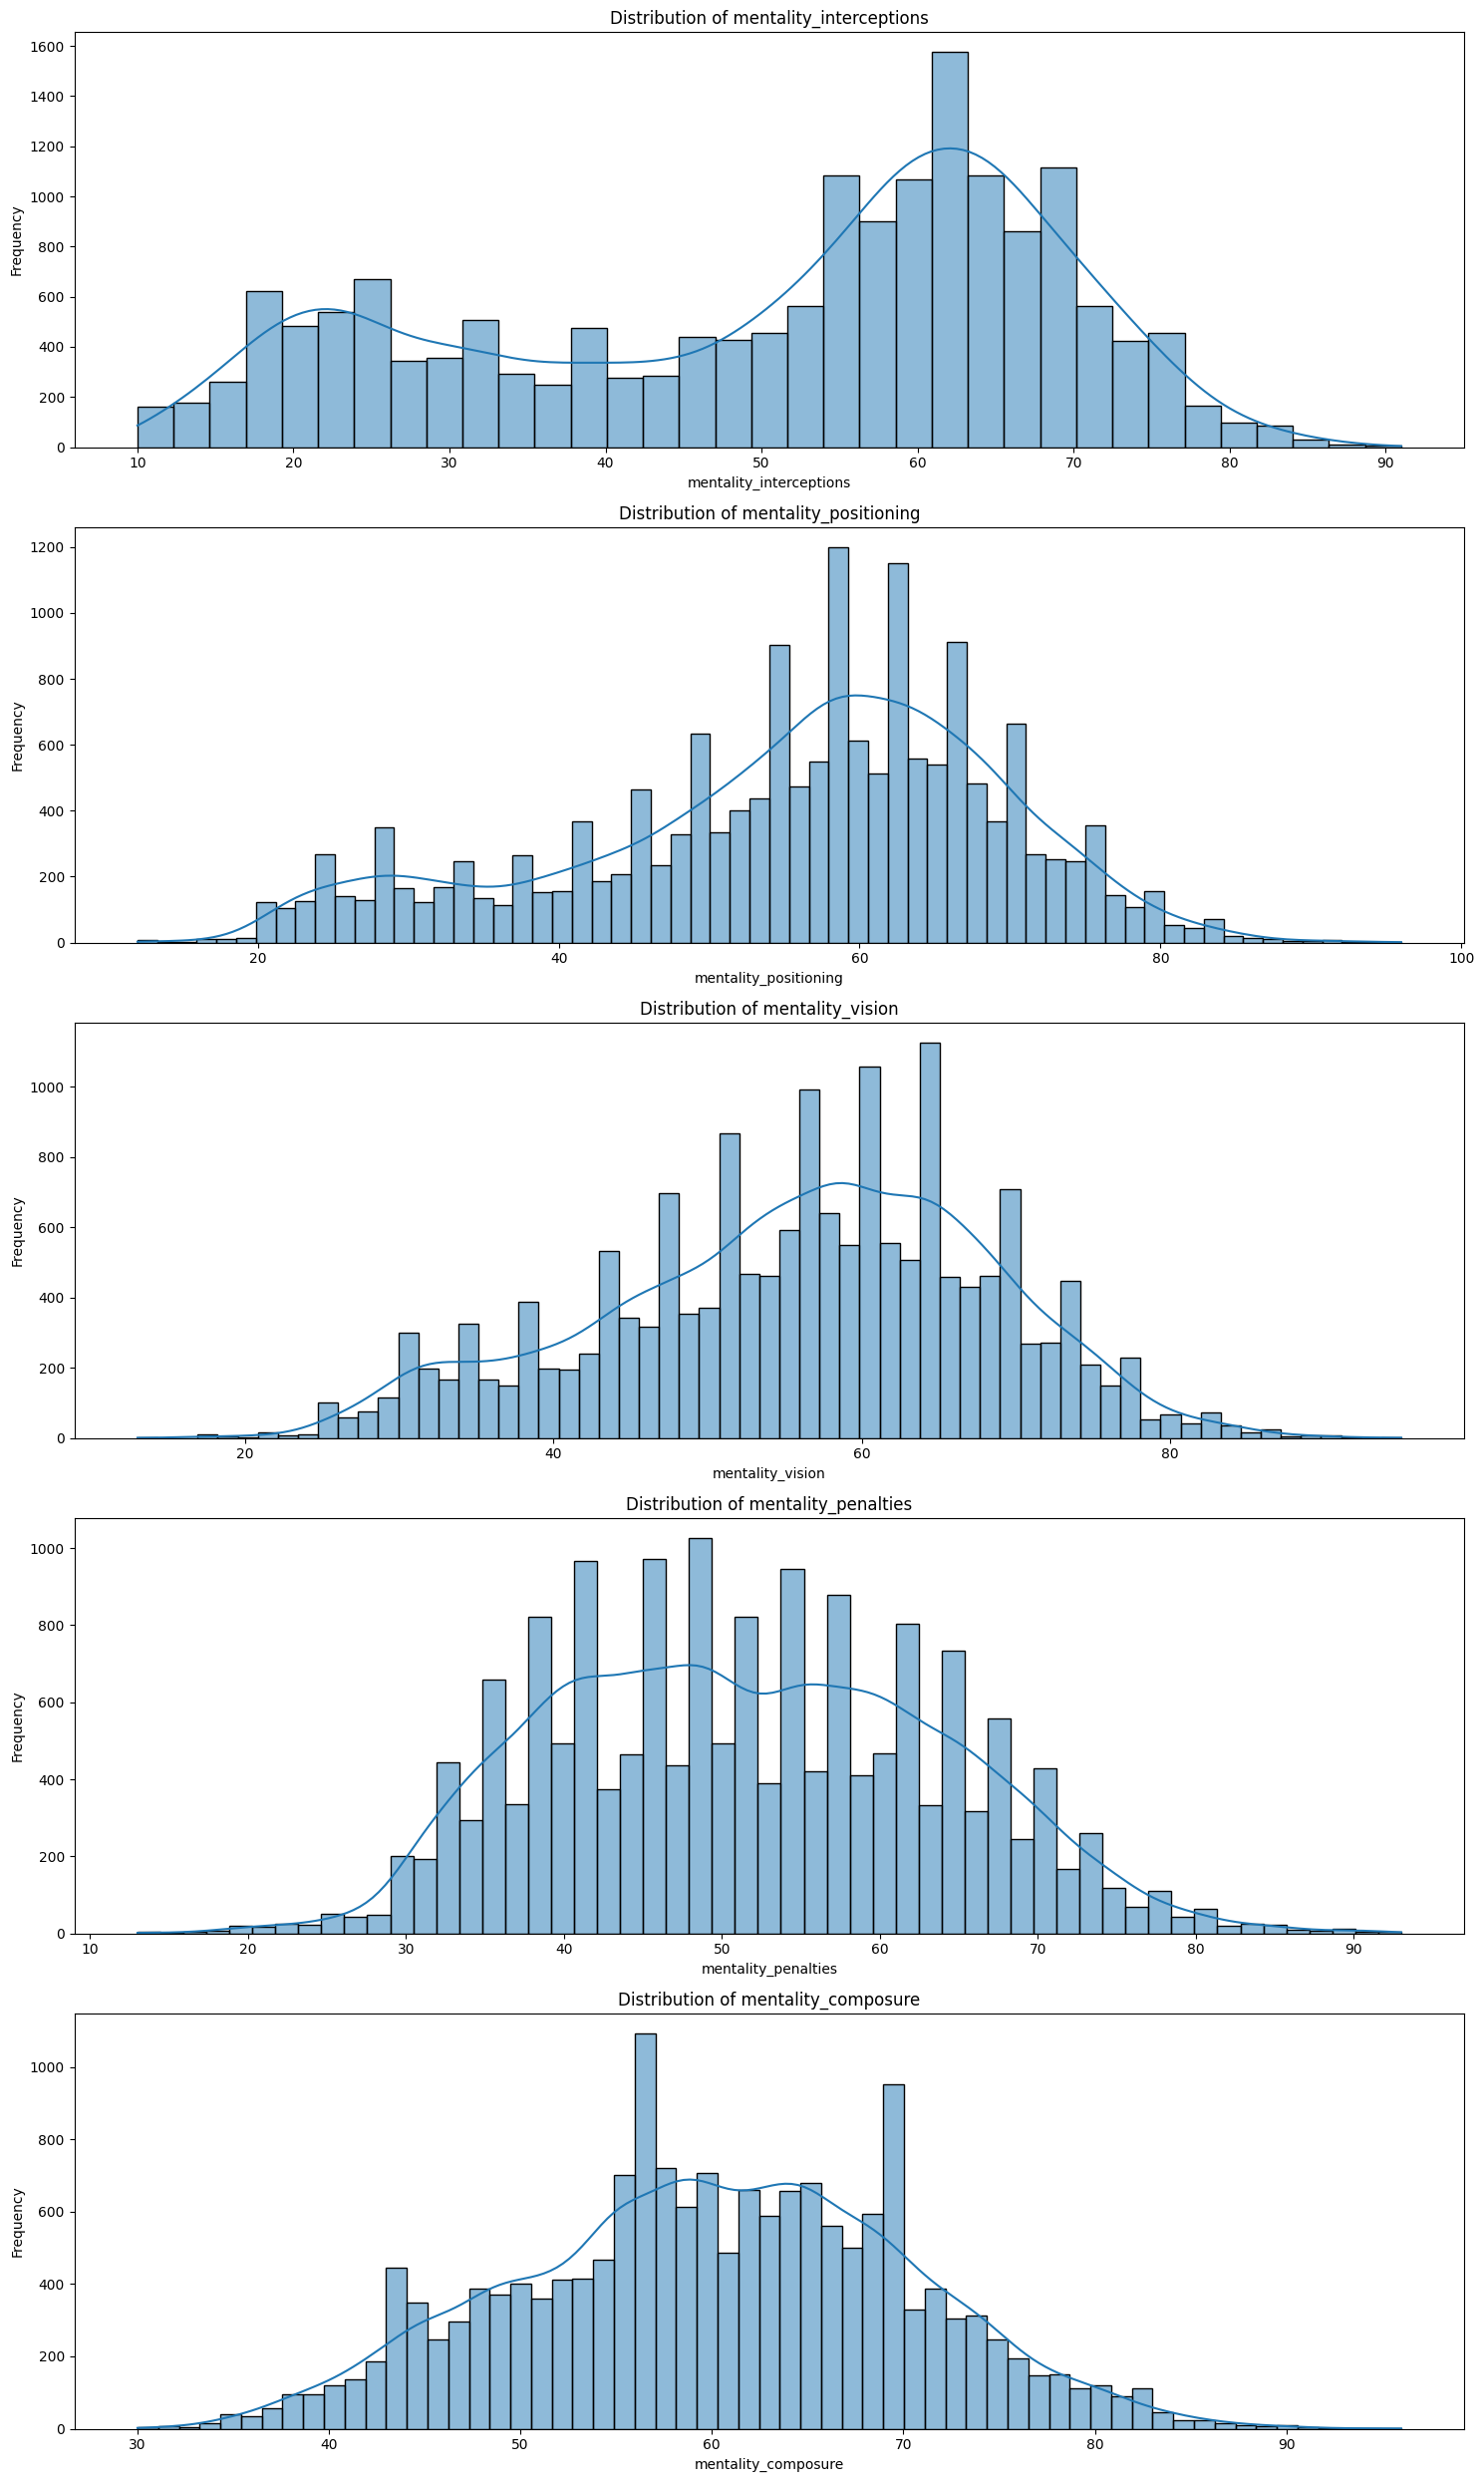

In [103]:
plot_distributions(non_goalkeepers[mentality])

#### Mentality Interceptions

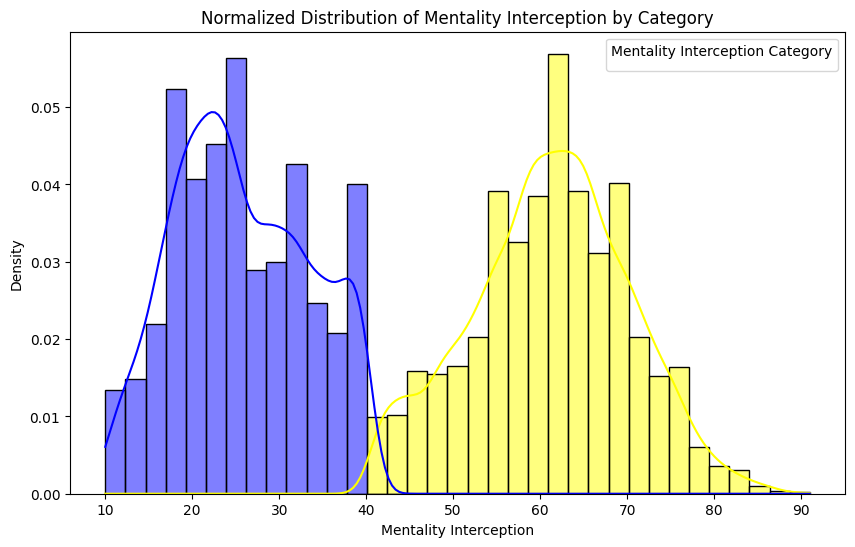

In [104]:
df_no_GK['mentality_interceptions_categories'] = pd.cut(df_no_GK['mentality_interceptions'], bins=[0, 40, 100], 
                                        labels=['Low Inteception', 'High Inteception'])

df_no_GK['mentality_interceptions_categories_encoded'] = df_no_GK['mentality_interceptions_categories'].map({'Low Inteception': 0, 'High Inteception': 1}).astype(int)


plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_GK, x='mentality_interceptions', hue='mentality_interceptions_categories', 
             kde=True, stat='density', common_norm=False, palette={'Low Inteception': 'blue', 'High Inteception': 'yellow'})
plt.title('Normalized Distribution of Mentality Interception by Category')
plt.xlabel('Mentality Interception')
plt.ylabel('Density')
plt.legend(title='Mentality Interception Category')
plt.show()

#### Mentality Positioning

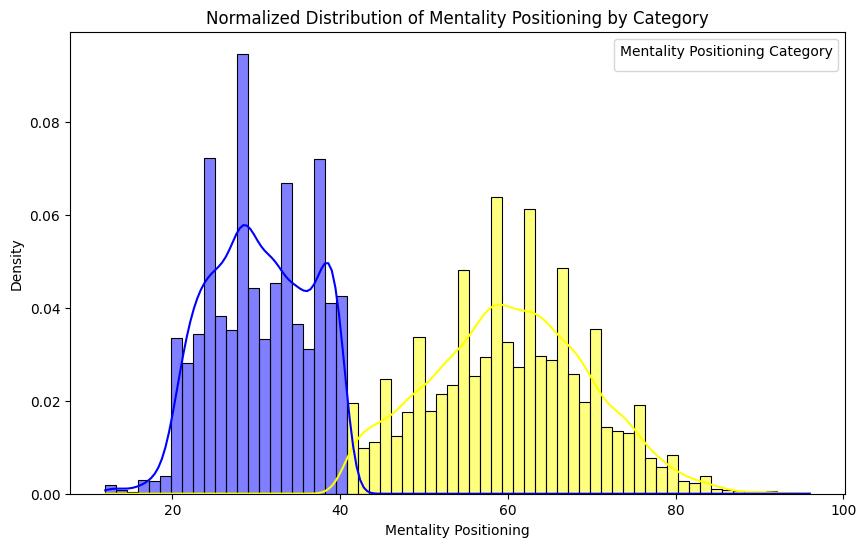

In [105]:
df_no_GK['mentality_positioning_categories'] = pd.cut(df_no_GK['mentality_positioning'], bins=[0, 40, 100], 
                                        labels=['Low Positioning', 'High Positioning'])

df_no_GK['mentality_positioning_categories_encoded'] = df_no_GK['mentality_positioning_categories'].map({'Low Positioning': 0, 'High Positioning': 1}).astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_GK, x='mentality_positioning', hue='mentality_positioning_categories', 
             kde=True, stat='density', common_norm=False, palette={'Low Positioning': 'blue', 'High Positioning': 'yellow'})
plt.title('Normalized Distribution of Mentality Positioning by Category')
plt.xlabel('Mentality Positioning')
plt.ylabel('Density')
plt.legend(title='Mentality Positioning Category')
plt.show()

#### Mentality Vision

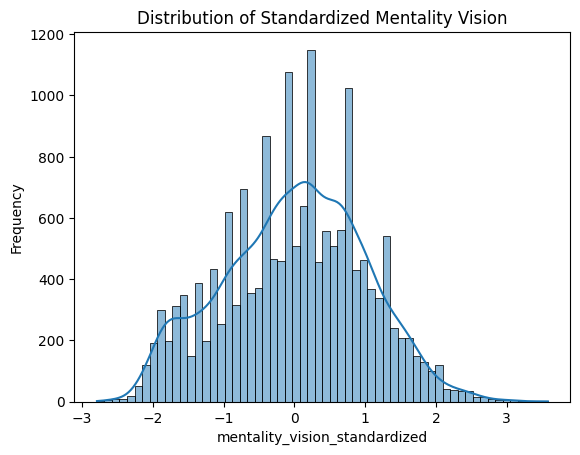

In [106]:
df_no_GK['mentality_vision_binn'] = pd.qcut(df_no_GK['mentality_vision'], q=4, labels=[0, 1, 2, 3]).astype(int)

df_no_GK['mentality_vision_boxcox'], _ = stats.boxcox(df_no_GK['mentality_vision'] + 1)

df_no_GK['mentality_vision_standardized'] = scaler_standard.fit_transform(df_no_GK[['mentality_vision_boxcox']])

df_no_GK = df_no_GK.drop('mentality_vision_boxcox', axis = 1)

sns.histplot(df_no_GK['mentality_vision_standardized'], kde=True)
plt.title('Distribution of Standardized Mentality Vision')
plt.xlabel('mentality_vision_standardized')
plt.ylabel('Frequency')
plt.show()

#### Mentality Composure

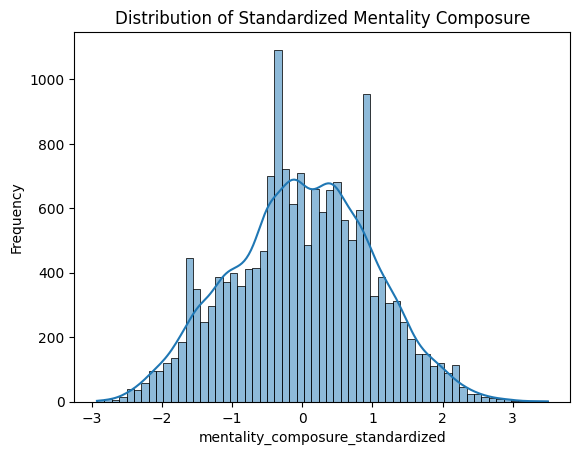

In [107]:
df_no_GK['mentality_composure_standardized'] = scaler_standard.fit_transform(df_no_GK[['mentality_composure']])

sns.histplot(df_no_GK['mentality_composure_standardized'], kde=True)
plt.title('Distribution of Standardized Mentality Composure')
plt.xlabel('mentality_composure_standardized')
plt.ylabel('Frequency')
plt.show()

### Defending

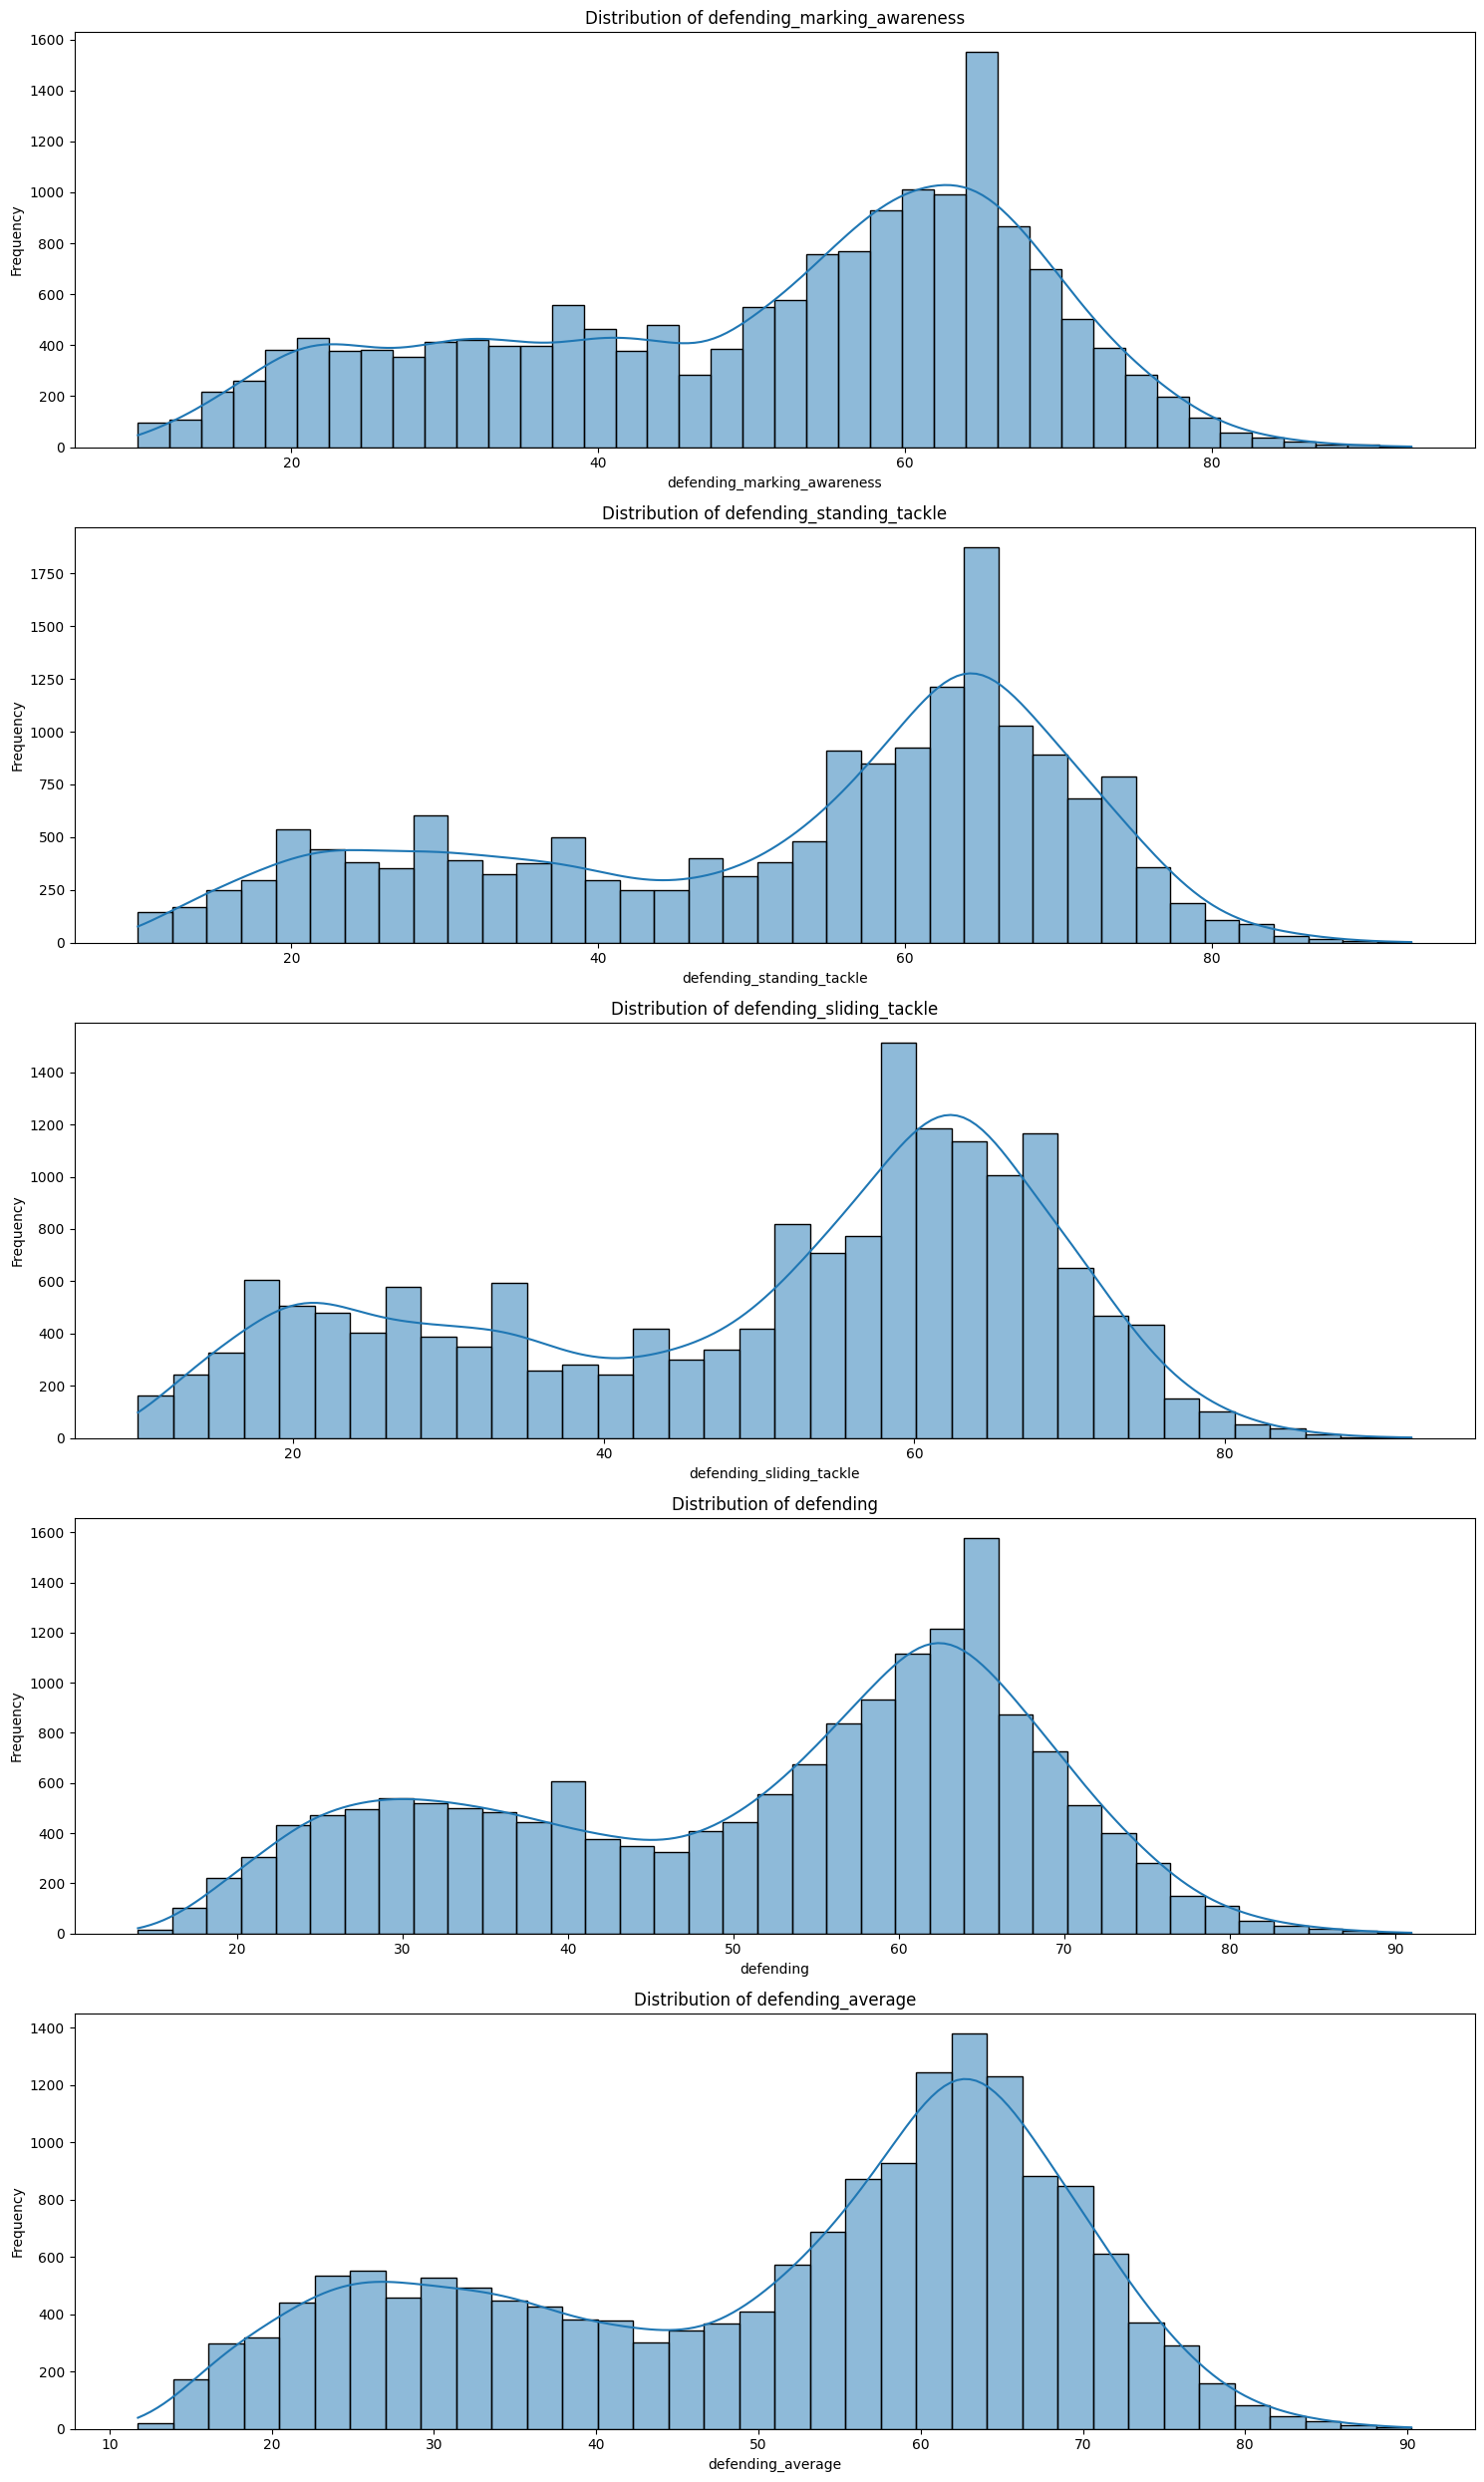

In [108]:
df_no_GK['defending_average'] = df_no_GK[defending].mean(axis=1)

defending.append('defending_average')

plot_distributions(df_no_GK[defending])

ALl graphs look the same and they represent similar feature (defending). So we will just consider 'defending_average'. Looking  at the graph it looks like there two seperate groups, so we will use binning

In [109]:
df_no_GK['defending_category'] = pd.cut(df_no_GK['defending_average'], bins=[0, 45, 100], 
                                        labels=['Low Defense', 'High Defense'])

df_no_GK['defending_category_encoded'] = df_no_GK['defending_category'].map({'Low Defense': 0, 'High Defense': 1}).astype(int)

df_no_GK['defending_category_encoded']

0        0
1        0
2        0
3        0
4        1
        ..
17102    0
17103    0
17104    0
17105    0
17106    0
Name: defending_category_encoded, Length: 17107, dtype: int32

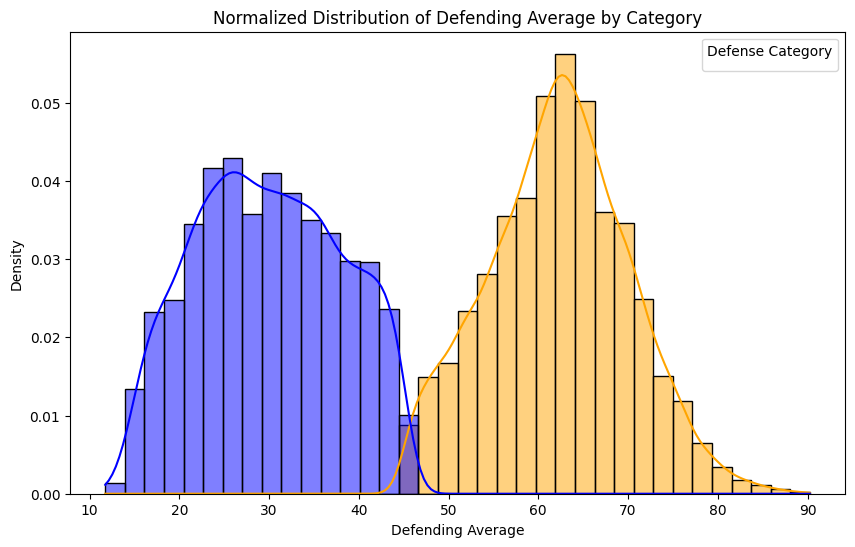

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_GK, x='defending_average', hue='defending_category', 
             kde=True, stat='density', common_norm=False, palette={'Low Defense': 'blue', 'High Defense': 'orange'})
plt.title('Normalized Distribution of Defending Average by Category')
plt.xlabel('Defending Average')
plt.ylabel('Density')
plt.legend(title='Defense Category')
plt.show()

In [111]:
scaler = StandardScaler()

df_no_GK['defending_standardized'] = df_no_GK.groupby('defending_category')['defending_average'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()  
)

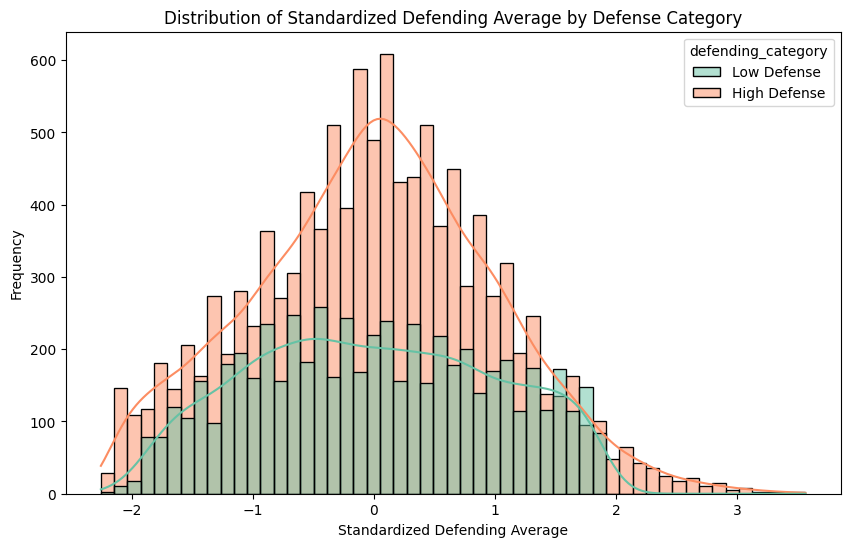

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_GK, x='defending_standardized', kde=True, hue='defending_category', palette='Set2')
plt.title('Distribution of Standardized Defending Average by Defense Category')
plt.xlabel('Standardized Defending Average')
plt.ylabel('Frequency')
plt.show()

### Other

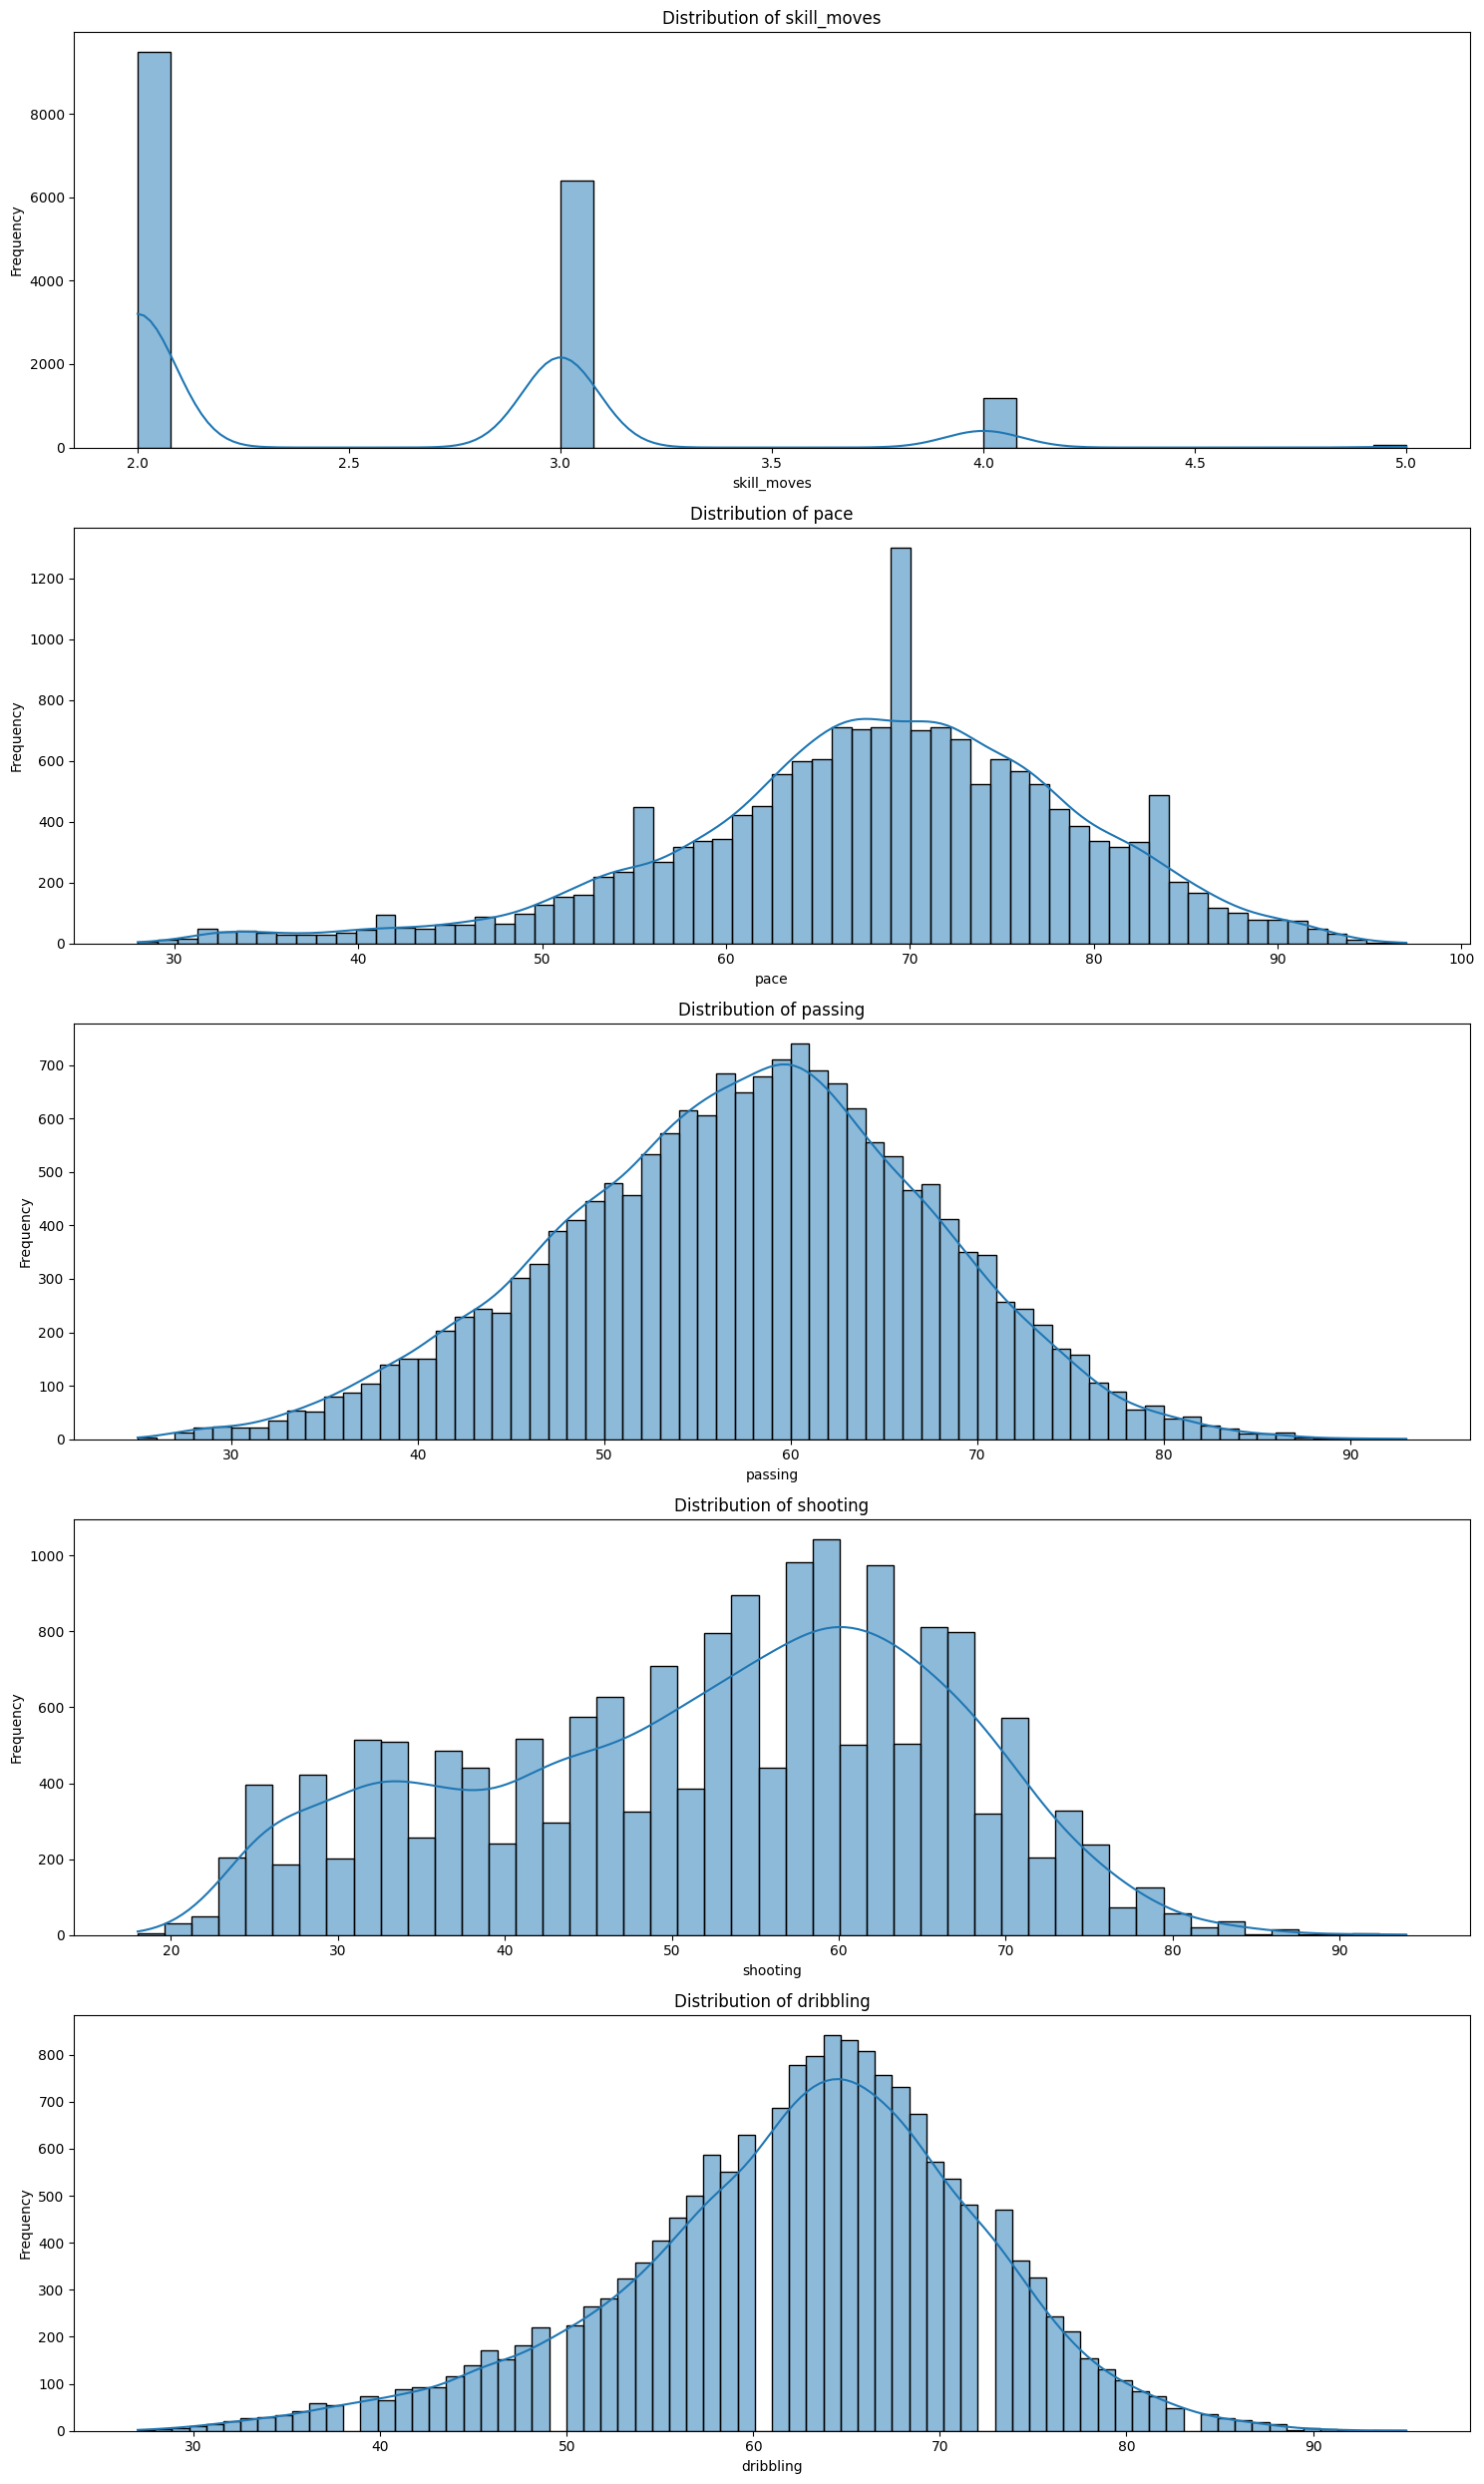

In [113]:
plot_distributions(df_no_GK[other])

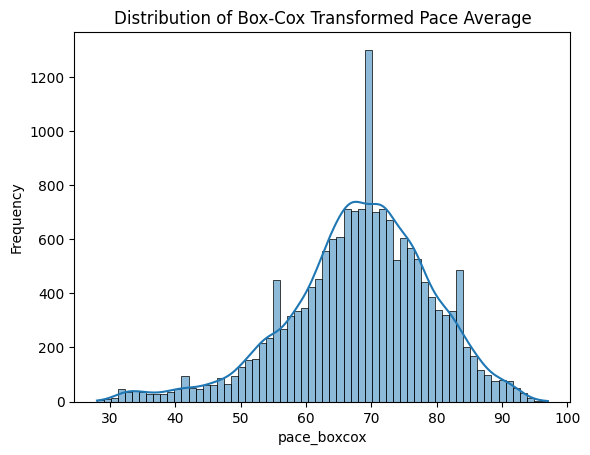

In [114]:
df_no_GK['pace_boxcox'], _ = stats.boxcox(df_no_GK['pace']) 

sns.histplot(df_no_GK['pace'], kde=True)
plt.title('Distribution of Box-Cox Transformed Pace Average')
plt.xlabel('pace_boxcox')
plt.ylabel('Frequency')
plt.show()

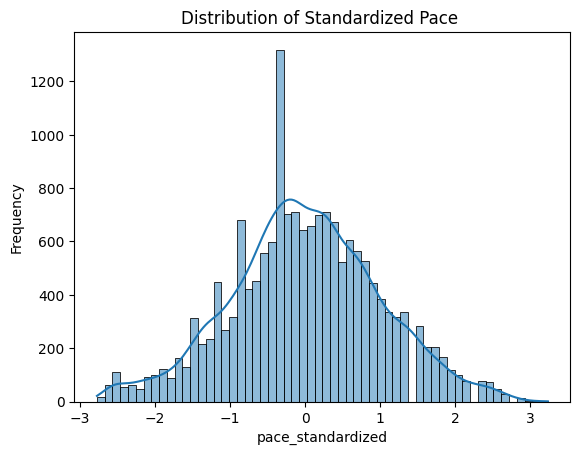

In [115]:
df_no_GK['pace_standardized'] = scaler.fit_transform(df_no_GK[['pace_boxcox']])

sns.histplot(df_no_GK['pace_standardized'], kde=True)
plt.title('Distribution of Standardized Pace ')
plt.xlabel('pace_standardized')
plt.ylabel('Frequency')
plt.show()

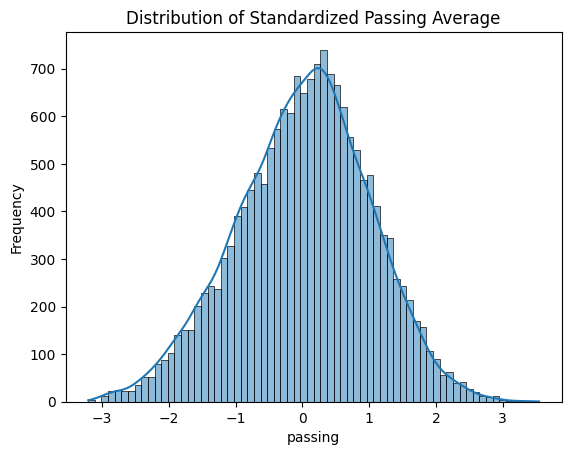

In [116]:
df_no_GK['passing'] = scaler.fit_transform(df_no_GK[['passing']])

sns.histplot(df_no_GK['passing'], kde=True)
plt.title('Distribution of Standardized Passing Average')
plt.xlabel('passing')
plt.ylabel('Frequency')
plt.show()

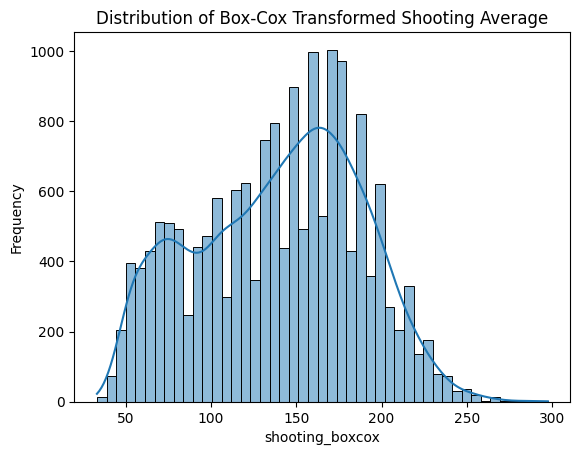

In [117]:
df_no_GK['shooting_boxcox'], _ = stats.boxcox(df_no_GK['shooting']) 

sns.histplot(df_no_GK['shooting_boxcox'], kde=True)
plt.title('Distribution of Box-Cox Transformed Shooting Average')
plt.xlabel('shooting_boxcox')
plt.ylabel('Frequency')
plt.show()

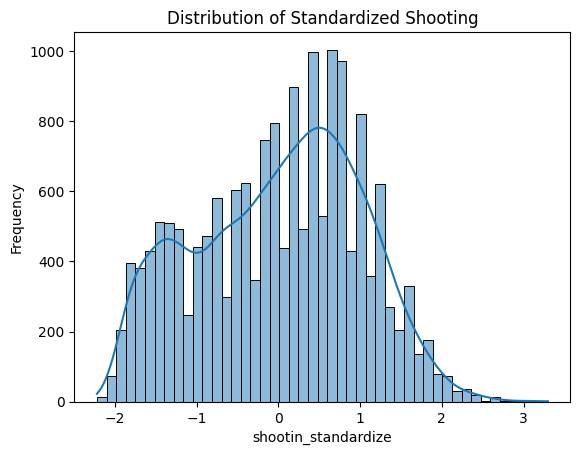

In [118]:
df_no_GK['shooting_standardize'] = scaler.fit_transform(df_no_GK[['shooting_boxcox']])

sns.histplot(df_no_GK['shooting_standardize'], kde=True)
plt.title('Distribution of Standardized Shooting')
plt.xlabel('shootin_standardize')
plt.ylabel('Frequency')
plt.show()

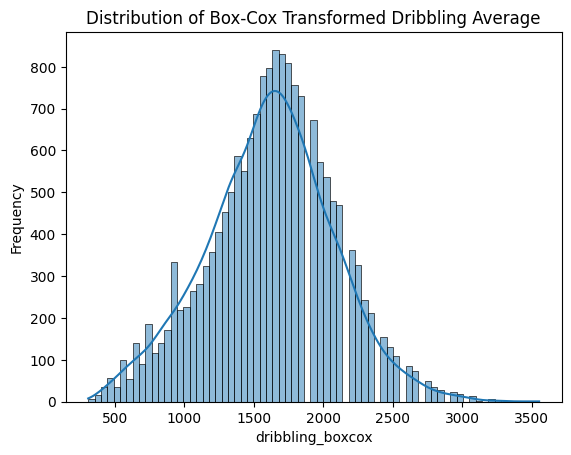

In [119]:
df_no_GK['dribbling_boxcox'], _ = stats.boxcox(df_no_GK['dribbling']) 

sns.histplot(df_no_GK['dribbling_boxcox'], kde=True)
plt.title('Distribution of Box-Cox Transformed Dribbling Average')
plt.xlabel('dribbling_boxcox')
plt.ylabel('Frequency')
plt.show()

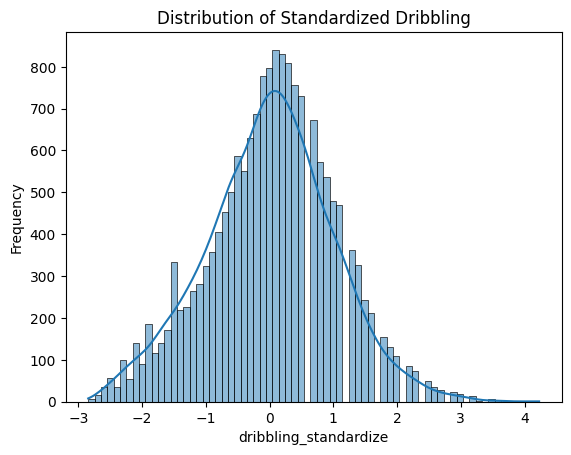

In [120]:
df_no_GK['dribbling_standardize'] = scaler.fit_transform(df_no_GK[['dribbling_boxcox']])

sns.histplot(df_no_GK['dribbling_standardize'], kde=True)
plt.title('Distribution of Standardized Dribbling')
plt.xlabel('dribbling_standardize')
plt.ylabel('Frequency')
plt.show()

## Feature Selection

### Data frames

In [121]:
df_no_GK.columns[-50:]

Index(['LWB', 'preferred_foot_encoded', 'is_GK', 'goalkeeping_total',
       'attacking_average', 'attacking_crossing_binned',
       'attacking_finishing_binned', 'attacking_heading_accuracy_standardized',
       'attacking_short_passing_standardized',
       'attacking_volleys_standardized', 'skill_dribbling_standardized',
       'skill_curve_standardized', 'skill_long_passing_standardized',
       'skill_ball_control_standardized', 'movement_acceleration_binn',
       'movement_acceleration_standardized', 'movement_sprint_speed_binn',
       'movement_sprint_speed_standardized', 'movement_agility_binn',
       'movement_agility_standardized', 'movement_reactions_standardized',
       'movement_balance_binn', 'movement_balance_standardized',
       'power_shot_power_binn', 'power_shot_power_standardized',
       'power_jumping_binn', 'power_jumping_standardized',
       'power_stamina_binn', 'power_stamina_standardized',
       'power_strength_binn', 'power_strength_standardized',
  

In [122]:
features_clean = ['attacking_average', 'attacking_crossing_binned','preferred_foot_encoded',
                                   'attacking_finishing_binned', 'attacking_heading_accuracy_standardized',
                                   'attacking_short_passing_standardized',
                                   'attacking_volleys_standardized', 'skill_dribbling_standardized',
                                   'skill_curve_standardized', 'skill_long_passing_standardized',
                                   'skill_ball_control_standardized', 'movement_acceleration_binn',
                                   'movement_acceleration_standardized', 'movement_sprint_speed_binn',
                                   'movement_sprint_speed_standardized', 'movement_agility_binn',
                                   'movement_agility_standardized', 'movement_balance_binn',
                                   'movement_balance_standardized', 'power_shot_power_binn',
                                   'power_shot_power_standardized', 'power_jumping_binn',
                                   'power_jumping_standardized', 'power_stamina_binn',
                                   'power_stamina_standardized', 'power_strength_binn',
                                   'power_strength_standardized', 'mentality_vision_binn',
                                   'mentality_vision_standardized', 'mentality_interceptions_categories_encoded',
                                   'mentality_positioning_categories_encoded', 'pace_standardized',
                                   'mentality_composure_standardized', 'defending_average',
                                   'defending_category_encoded', 'defending_standardized', 'pace_boxcox', 
                                   'shooting_boxcox', 'shooting_standardize', 'dribbling_boxcox',
                                   'dribbling_standardize']

In [123]:
df_no_GK_all = df_no_GK.copy()
df_no_GK = df_no_GK[features_clean]

In [124]:
df_sub_categories_no_GK_1 = df_sub_categories[~df_sub_categories['player_positions'].str.contains('GK')]

df_positions_no_GK_1 = df_positions[~df_positions['player_positions'].str.contains('GK')]

df_positions_combined_no_GK_1 = df_positions_combined[~df_positions_combined['player_positions'].str.contains('GK')]

In [125]:
df_sub_categories_no_GK = df_no_GK.copy()

df_sub_categories_no_GK[['Defender', 'Midfielder', 'Forwarder']] = df_sub_categories_no_GK_1[['Defender', 'Midfielder', 'Forwarder']].values

In [126]:
df_positions_no_GK = df_no_GK.copy()

df_positions_no_GK[['CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'ST',
                           'LW', 'RW', 'CF', 'RWB', 'LWB']] = df_positions_no_GK_1[['CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'ST',
                                                                                           'LW', 'RW', 'CF', 'RWB', 'LWB']].values

In [127]:
df_positions_combined_no_GK = df_no_GK.copy()

df_positions_combined_no_GK[['CB', 'CDM', 'CM', 'CAM', 'ST', 'CF',
                        'LW/RW', 'LB/RB', 'LM/RM', 'LWB/RWB']] = df_positions_combined_no_GK_1[['CB', 'CDM', 'CM', 'CAM', 'ST', 'CF',
                                                                                            'LW/RW', 'LB/RB', 'LM/RM', 'LWB/RWB']].values

In [128]:
df_defender = df[df['Defender'] == 1]
df_midfielder = df[df['Midfielder'] == 1]
df_forwarder = df[df['Forwarder'] == 1]

In [129]:
df_defender = df_sub_categories_no_GK[df_sub_categories_no_GK['Defender'] == 1]
df_midfielder = df_sub_categories_no_GK[df_sub_categories_no_GK['Midfielder'] == 1]
df_forwarder = df_sub_categories_no_GK[df_sub_categories_no_GK['Forwarder'] == 1]

df_defender[['CB', 'RB', 'LB', 'CDM']] = df_positions_no_GK[['CB', 'RB', 'LB', 'CDM']]
df_midfielder[['CM', 'LM', 'RM', 'CAM']] =  df_positions_no_GK[['CM', 'LM', 'RM', 'CAM']]
df_forwarder[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']] =  df_positions_no_GK[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']]

df_defender = df_defender.drop(['Defender', 'Midfielder', 'Forwarder'], axis =1)
df_midfielder = df_midfielder.drop(['Defender', 'Midfielder', 'Forwarder'], axis =1)
df_forwarder = df_forwarder.drop(['Defender', 'Midfielder', 'Forwarder'], axis =1)

In [130]:
features_encoded_sub_categories = ['attacking_average', 'attacking_crossing_binned',
                                   'attacking_finishing_binned', 'attacking_heading_accuracy_standardized',
                                   'attacking_short_passing_standardized',
                                   'attacking_volleys_standardized', 'skill_dribbling_standardized',
                                   'skill_curve_standardized', 'skill_long_passing_standardized',
                                   'skill_ball_control_standardized', 'movement_acceleration_binn',
                                   'movement_acceleration_standardized', 'movement_sprint_speed_binn',
                                   'movement_sprint_speed_standardized', 'movement_agility_binn',
                                   'movement_agility_standardized', 'movement_balance_binn',
                                   'movement_balance_standardized', 'power_shot_power_binn',
                                   'power_shot_power_standardized', 'power_jumping_binn',
                                   'power_jumping_standardized', 'power_stamina_binn',
                                   'power_stamina_standardized', 'power_strength_binn',
                                   'power_strength_standardized', 'mentality_vision_binn',
                                   'mentality_vision_standardized', 'mentality_interceptions_categories_encoded',
                                   'mentality_positioning_categories_encoded', 'pace_standardized',
                                   'mentality_composure_standardized', 'defending_average',
                                   'defending_category_encoded', 'defending_standardized', 'pace_boxcox', 
                                   'shooting_boxcox', 'shooting_standardize', 'dribbling_boxcox',
                                   'dribbling_standardize', 'Defender', 'Midfielder', 'Forwarder']

In [131]:
df_sub_categories_no_GK_encoded = df_sub_categories_no_GK[features_encoded_sub_categories]
X = df_sub_categories_no_GK_encoded.drop(['Defender', 'Midfielder', 'Forwarder'], axis=1)  
y = df_sub_categories_no_GK_encoded[['Defender', 'Midfielder', 'Forwarder']]  

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (targets): {y.shape}")

Shape of X (features): (17107, 40)
Shape of y (targets): (17107, 3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd

model = RandomForestClassifier(n_estimators=100, random_state=42)

multi_target_model = MultiOutputClassifier(model)

multi_target_model.fit(X, y)

feature_importances = pd.Series(multi_target_model.estimators_[0].feature_importances_, index=X.columns)

feature_importances.sort_values(ascending=False).head(10)

### Categories: Defenders, Midfielders and Forwarders

In [132]:
df_sub_categories_no_GK.columns

Index(['attacking_average', 'attacking_crossing_binned',
       'preferred_foot_encoded', 'attacking_finishing_binned',
       'attacking_heading_accuracy_standardized',
       'attacking_short_passing_standardized',
       'attacking_volleys_standardized', 'skill_dribbling_standardized',
       'skill_curve_standardized', 'skill_long_passing_standardized',
       'skill_ball_control_standardized', 'movement_acceleration_binn',
       'movement_acceleration_standardized', 'movement_sprint_speed_binn',
       'movement_sprint_speed_standardized', 'movement_agility_binn',
       'movement_agility_standardized', 'movement_balance_binn',
       'movement_balance_standardized', 'power_shot_power_binn',
       'power_shot_power_standardized', 'power_jumping_binn',
       'power_jumping_standardized', 'power_stamina_binn',
       'power_stamina_standardized', 'power_strength_binn',
       'power_strength_standardized', 'mentality_vision_binn',
       'mentality_vision_standardized',
       'm

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_sub_categories_no_GK.drop(['Defender', 'Midfielder', 'Forwarder'], axis = 1)
y = df_sub_categories_no_GK[['Defender', 'Midfielder', 'Forwarder']]

y_encoded = LabelEncoder().fit_transform(y.values.argmax(axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 1. Random Forest for Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_selected_features = rf_feature_importance.sort_values(ascending=False).head(10)  # Top 10 features

# 2. Recursive Feature Elimination (RFE)
rfe_model = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
rfe_model.fit(X_train, y_train)
rfe_selected_features = X_train.columns[rfe_model.support_]

# 3. Gradient Boosting for Feature Importance
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_feature_importance = pd.Series(gb_model.feature_importances_, index=X_train.columns)
gb_selected_features = gb_feature_importance.sort_values(ascending=False).head(10)

print("Random Forest Selected Features:\n", rf_selected_features)
print("RFE Selected Features:\n", rfe_selected_features)
print("Gradient Boosting Selected Features:\n", gb_selected_features)


In [133]:
# 1. Feature list based on importance values
feature_cat_1 = [
    'defending_average',
    'defending_category_encoded',
    'mentality_interceptions_categories_encoded',
    'shooting_standardize',
    'attacking_finishing_binned',
    'defending_standardized',
    'skill_long_passing_standardized',
    'attacking_heading_accuracy_standardized',
    'shooting_boxcox',
    'attacking_volleys_standardized'
]

# 2. Feature list based on RFE Selected Features
feature_cat_2 = [
    'attacking_finishing_binned',
    'attacking_heading_accuracy_standardized',
    'attacking_short_passing_standardized',
    'skill_long_passing_standardized',
    'power_strength_standardized',
    'defending_average',
    'defending_category_encoded',
    'defending_standardized',
    'shooting_boxcox',
    'shooting_standardize'
]

# 3. Feature list based on Gradient Boosting Selected Features
feature_cat_3 = [
    'defending_average',
    'skill_long_passing_standardized',
    'attacking_heading_accuracy_standardized',
    'attacking_finishing_binned',
    'attacking_short_passing_standardized',
    'defending_standardized',
    'shooting_standardize',
    'mentality_vision_standardized',
    'power_strength_standardized',
    'shooting_boxcox'
]

features_categories = ['attacking_heading_accuracy_standardized',
                                    'attacking_short_passing_standardized',
                                    'skill_long_passing_standardized',
                                    'power_strength_standardized',
                                    'defending_average',
                                    'defending_category_encoded',
                                    'shooting_standardize',
                                    'mentality_interceptions_categories_encoded',
                                    'dribbling_standardize',
                                    'mentality_positioning_categories_encoded'
                                    ]

### Defenders

In [134]:
df_defender.columns

Index(['attacking_average', 'attacking_crossing_binned',
       'preferred_foot_encoded', 'attacking_finishing_binned',
       'attacking_heading_accuracy_standardized',
       'attacking_short_passing_standardized',
       'attacking_volleys_standardized', 'skill_dribbling_standardized',
       'skill_curve_standardized', 'skill_long_passing_standardized',
       'skill_ball_control_standardized', 'movement_acceleration_binn',
       'movement_acceleration_standardized', 'movement_sprint_speed_binn',
       'movement_sprint_speed_standardized', 'movement_agility_binn',
       'movement_agility_standardized', 'movement_balance_binn',
       'movement_balance_standardized', 'power_shot_power_binn',
       'power_shot_power_standardized', 'power_jumping_binn',
       'power_jumping_standardized', 'power_stamina_binn',
       'power_stamina_standardized', 'power_strength_binn',
       'power_strength_standardized', 'mentality_vision_binn',
       'mentality_vision_standardized',
       'm

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_defender = df_defender.drop(['CB', 'RB', 'LB', 'CDM'], axis = 1)
y_defender = df_defender[['CB', 'RB', 'LB', 'CDM']]

y_defender_encoded = LabelEncoder().fit_transform(y_defender.values.argmax(axis=1))

X_defender_train, X_defender_test, y_defender_train, y_defender_test = train_test_split(X_defender, y_defender_encoded, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_defender_train, y_defender_train)
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_defender_train.columns)
rf_selected_features = rf_feature_importance.sort_values(ascending=False).head(10)  

print("Random Forest Selected Features:\n", rf_selected_features)

In [135]:
features_defender = ['preferred_foot_encoded', 'attacking_heading_accuracy_standardized', 'mentality_vision_standardized',
                    'attacking_short_passing_standardized', 'skill_dribbling_standardized', 'power_strength_standardized']

### Midfielder

In [136]:
df_midfielder.columns

Index(['attacking_average', 'attacking_crossing_binned',
       'preferred_foot_encoded', 'attacking_finishing_binned',
       'attacking_heading_accuracy_standardized',
       'attacking_short_passing_standardized',
       'attacking_volleys_standardized', 'skill_dribbling_standardized',
       'skill_curve_standardized', 'skill_long_passing_standardized',
       'skill_ball_control_standardized', 'movement_acceleration_binn',
       'movement_acceleration_standardized', 'movement_sprint_speed_binn',
       'movement_sprint_speed_standardized', 'movement_agility_binn',
       'movement_agility_standardized', 'movement_balance_binn',
       'movement_balance_standardized', 'power_shot_power_binn',
       'power_shot_power_standardized', 'power_jumping_binn',
       'power_jumping_standardized', 'power_stamina_binn',
       'power_stamina_standardized', 'power_strength_binn',
       'power_strength_standardized', 'mentality_vision_binn',
       'mentality_vision_standardized',
       'm

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_midfielder = df_midfielder.drop(['CM', 'LM', 'RM', 'CAM'], axis = 1)
y_midfielder = df_midfielder[['CM', 'LM', 'RM', 'CAM']]

y_midfielder_encoded = LabelEncoder().fit_transform(y_midfielder.values.argmax(axis=1))

X_midfielder_train, X_midfielder_test, y_midfielder_train, y_midfielder_test = train_test_split(X_midfielder, y_midfielder_encoded, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_midfielder_train, y_midfielder_train)
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_midfielder_train.columns)
rf_selected_features = rf_feature_importance.sort_values(ascending=False).head(10)  

print("Random Forest Selected Features:\n", rf_selected_features)

In [137]:
features_midfielder = ['preferred_foot_encoded', 'defending_average', 'skill_long_passing_standardized','pace_standardized',
                    'pace_boxcox', 'defending_category_encoded', 'attacking_short_passing_standardized', 'movement_sprint_speed_standardized']

### Forwarder

In [138]:
df_forwarder.columns

Index(['attacking_average', 'attacking_crossing_binned',
       'preferred_foot_encoded', 'attacking_finishing_binned',
       'attacking_heading_accuracy_standardized',
       'attacking_short_passing_standardized',
       'attacking_volleys_standardized', 'skill_dribbling_standardized',
       'skill_curve_standardized', 'skill_long_passing_standardized',
       'skill_ball_control_standardized', 'movement_acceleration_binn',
       'movement_acceleration_standardized', 'movement_sprint_speed_binn',
       'movement_sprint_speed_standardized', 'movement_agility_binn',
       'movement_agility_standardized', 'movement_balance_binn',
       'movement_balance_standardized', 'power_shot_power_binn',
       'power_shot_power_standardized', 'power_jumping_binn',
       'power_jumping_standardized', 'power_stamina_binn',
       'power_stamina_standardized', 'power_strength_binn',
       'power_strength_standardized', 'mentality_vision_binn',
       'mentality_vision_standardized',
       'm

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_forwarder = df_forwarder.drop(['ST', 'LW', 'RW', 'CF', 'LWB', 'RWB'], axis = 1)
y_forwarder = df_forwarder[['ST', 'LW', 'RW', 'CF', 'LWB', 'RWB']]

y_forwarder_encoded = LabelEncoder().fit_transform(y_forwarder.values.argmax(axis=1))

X_forwarder_train, X_forwarder_test, y_forwarder_train, y_forwarder_test = train_test_split(X_forwarder, y_forwarder_encoded, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_forwarder_train, y_forwarder_train)
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_forwarder_train.columns)
rf_selected_features = rf_feature_importance.sort_values(ascending=False).head(10)  

print("Random Forest Selected Features:\n", rf_selected_features)

In [ ]:
df_forwarder

In [139]:
features_forwarder = ['defending_average', 'attacking_heading_accuracy_standardized', 'preferred_foot_encoded', 'power_jumping_standardized',
                     'attacking_short_passing_standardized', 'power_strength_standardized', 'defending_category_encoded', 'shooting_standardize',
                      'attacking_finishing_binned']

# Machine learning classification algorithms 

## Categories: Defender, Midfielder, Forwarder, Wing Back

### Mapper for categories 

In [140]:
X_cat = df_sub_categories_no_GK.drop(['Defender', 'Midfielder', 'Forwarder'], axis = 1)

In [141]:
columns_with_index = list(enumerate(X_cat.columns))

for index, column_name in columns_with_index:
    print(index, column_name)

0 attacking_average
1 attacking_crossing_binned
2 preferred_foot_encoded
3 attacking_finishing_binned
4 attacking_heading_accuracy_standardized
5 attacking_short_passing_standardized
6 attacking_volleys_standardized
7 skill_dribbling_standardized
8 skill_curve_standardized
9 skill_long_passing_standardized
10 skill_ball_control_standardized
11 movement_acceleration_binn
12 movement_acceleration_standardized
13 movement_sprint_speed_binn
14 movement_sprint_speed_standardized
15 movement_agility_binn
16 movement_agility_standardized
17 movement_balance_binn
18 movement_balance_standardized
19 power_shot_power_binn
20 power_shot_power_standardized
21 power_jumping_binn
22 power_jumping_standardized
23 power_stamina_binn
24 power_stamina_standardized
25 power_strength_binn
26 power_strength_standardized
27 mentality_vision_binn
28 mentality_vision_standardized
29 mentality_interceptions_categories_encoded
30 mentality_positioning_categories_encoded
31 pace_standardized
32 mentality_composu

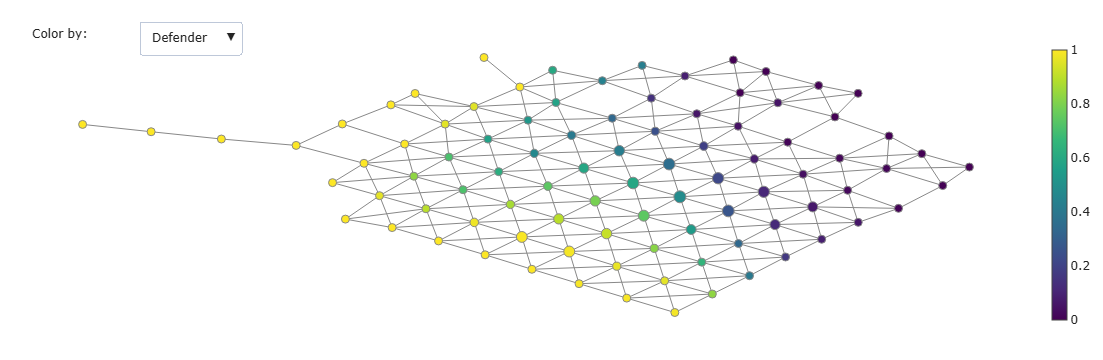

In [144]:
from gtda.plotting import plot_point_cloud
 
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

from gtda.mapper.pipeline import MapperPipeline

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

color_data = df_sub_categories_no_GK[['Defender', 'Midfielder', 'Forwarder']]

X_mapper_cat = np.array(X_cat.fillna(0)) 

# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=[37, 35])
# Define cover
cover = CubicalCover(n_intervals=10
                     , overlap_frac=0.2)
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe_cat = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)
graph = pipe_cat.fit_transform(X_mapper_cat)

# Plot the Mapper graph with the multi-label color data (one color per position)
fig = plot_static_mapper_graph(pipe_cat, X_mapper_cat, color_data=color_data)
fig.show()


From the mapper graph we can see that Forwarders and Defenders are clearly seperated, located in the left and right corners of the graph respectively. Midfielders and Wing Back players are clustered in the middle of the graph, so we can conclude that those people have both defending and attacking traits.  

### Prepare data

In [146]:
from sklearn.model_selection import train_test_split

X_cat = df_sub_categories_no_GK[features_categories]
y_cat = df_sub_categories_no_GK[['Defender', 'Midfielder', 'Forwarder']]

X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

categories_mapping = {
    0: 'Defender',
    1: 'Forwarder',
    2: 'Midfielder'
}

categories_names = [categories_mapping[i] for i in range(len(categories_mapping))]

In [147]:
y_cat_train_1d = np.argmax(y_cat_train, axis=1)
y_cat_test_1d = np.argmax(y_cat_test, axis=1) 

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

base_lr = LogisticRegression(max_iter=1000)  # LogisticRegression(multi_class='multinomial', random_state=42)

chain_model = ClassifierChain(base_lr)

chain_model.fit(X_cat_train, y_cat_train)

y_pred_chain = chain_model.predict(X_cat_test)

print(classification_report(y_cat_test, y_pred_chain))
print("Accuracy:", accuracy_score(y_cat_test, y_pred_chain))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1809
           1       0.81      0.79      0.80      1703
           2       0.83      0.70      0.76      1160

   micro avg       0.86      0.83      0.84      4672
   macro avg       0.85      0.81      0.83      4672
weighted avg       0.86      0.83      0.84      4672
 samples avg       0.89      0.87      0.86      4672

Accuracy: 0.641437755698422


### Binary Relevance

In [149]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier

# Initialize Binary Relevance with Random Forest as the base classifier
br = BinaryRelevance(classifier=RandomForestClassifier(random_state=42), require_dense=[False, True])

br.fit(X_cat_train, y_cat_train)

y_cat_pred_br = br.predict(X_cat_test)

y_cat_pred_br_dense = y_cat_pred_br.toarray()

print(classification_report(y_cat_test, y_cat_pred_br_dense, target_names=['Defender', 'Midfielder', 'Forwarder']))

new_instance = X_cat_test.iloc[0].values.reshape(1, -1)  
predictions = br.predict(new_instance)

print("Predicted labels for the new instance:", predictions.toarray())
print("Accuracy:", accuracy_score(y_cat_test, y_cat_pred_br_dense))


              precision    recall  f1-score   support

    Defender       0.92      0.95      0.94      1809
  Midfielder       0.83      0.83      0.83      1703
   Forwarder       0.85      0.71      0.77      1160

   micro avg       0.87      0.85      0.86      4672
   macro avg       0.87      0.83      0.85      4672
weighted avg       0.87      0.85      0.86      4672
 samples avg       0.91      0.89      0.87      4672

Predicted labels for the new instance: [[1 0 0]]
Accuracy: 0.6665692577440093


In [150]:
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import BinaryRelevance

lr = LogisticRegression(max_iter=1000)  

# Initialize Binary Relevance with Logistic Regression as the base classifier
classifier_br_lr = BinaryRelevance(classifier=lr)

classifier_br_lr.fit(X_cat_train, y_cat_train)

y_pred_br_lr = classifier_br_lr.predict(X_cat_test)

print(classification_report(y_cat_test, y_pred_br_lr, target_names=['Defender', 'Midfielder', 'Forwarder']))
print("Accuracy:", accuracy_score(y_cat_test, y_pred_br_lr))

              precision    recall  f1-score   support

    Defender       0.92      0.96      0.94      1809
  Midfielder       0.79      0.81      0.80      1703
   Forwarder       0.82      0.71      0.76      1160

   micro avg       0.85      0.84      0.85      4672
   macro avg       0.84      0.83      0.83      4672
weighted avg       0.85      0.84      0.84      4672
 samples avg       0.88      0.89      0.86      4672

Accuracy: 0.6344243132670953


### Neural Network 

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=X_cat_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_cat_train.shape[1], activation='sigmoid'))  # Sigmoid for multi-label classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_cat_train, y_cat_train, epochs=10, batch_size=32, validation_data=(X_cat_test, y_cat_test))

y_pred_nn = model.predict(X_cat_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

print(classification_report(y_cat_test, y_pred_nn, target_names=['Defender', 'Midfielder', 'Forwarder']))
print("Accuracy:", accuracy_score(y_cat_test, y_pred_nn))

Epoch 1/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6755 - loss: 0.6098 - val_accuracy: 0.8197 - val_loss: 0.3463
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7900 - loss: 0.3318 - val_accuracy: 0.8057 - val_loss: 0.3171
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.3215 - val_accuracy: 0.8185 - val_loss: 0.3108
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.3117 - val_accuracy: 0.8220 - val_loss: 0.3094
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.3053 - val_accuracy: 0.7937 - val_loss: 0.3011
Epoch 6/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7960 - loss: 0.2993 - val_accuracy: 0.8010 - val_loss: 0.2966
Epoch 7/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7980 - loss: 0.2938 - val_accuracy: 0.8144 - val_loss: 0.2948
Epoch 8/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8064 - loss: 0.2882 - val_accuracy: 0.

In [152]:
import kerastuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

def build_model(hp):
    model = Sequential()
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units_1, input_dim=X_cat_train.shape[1], activation='relu'))
    
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units_2, activation='relu'))
    
    model.add(Dense(y_cat_train.shape[1], activation='sigmoid'))  
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy', 
    max_trials=5, 
    executions_per_trial=2,  
    directory='my_dir', 
    project_name='keras_tuner_nn'  
)

tuner.search(X_cat_train, y_cat_train, epochs=10, validation_data=(X_cat_test, y_cat_test), batch_size=32)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model_categories = tuner.hypermodel.build(best_hps)

best_model_categories.fit(X_cat_train, y_cat_train, epochs=20, validation_data=(X_cat_test, y_cat_test), batch_size=32)

y_pred_nn = best_model_categories.predict(X_cat_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

print(classification_report(y_cat_test, y_pred_nn, target_names=['Defender', 'Midfielder', 'Forwarder']))
print("Accuracy:", accuracy_score(y_cat_test, y_pred_nn))


Reloading Tuner from my_dir\keras_tuner_nn\tuner0.json
Epoch 1/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7230 - loss: 0.4709 - val_accuracy: 0.6943 - val_loss: 0.3877
Epoch 2/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7814 - loss: 0.3377 - val_accuracy: 0.8171 - val_loss: 0.3212
Epoch 3/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7913 - loss: 0.3103 - val_accuracy: 0.7943 - val_loss: 0.3199
Epoch 4/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7982 - loss: 0.2970 - val_accuracy: 0.7919 - val_loss: 0.2966
Epoch 5/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8000 - loss: 0.2994 - val_accuracy: 0.7878 - val_loss: 0.2931
Epoch 6/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7947 - loss: 0.2947 - val_accuracy: 0.7987 - val_loss: 0.2908
Epoch 7/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7989 - loss: 0.2926 - val_accuracy: 0.7852 - val_loss: 0.2901
Epoch 8/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/st

After trying several different models, including its stacking and soft/hard voting, the best accuracy is so far the best_model based on neural networking (see above). So we will continue with that one.

## Defender

### Prepare data

In [153]:
X_defender = df_defender[features_defender]
y_defender = df_defender[['CB', 'RB', 'LB', 'CDM']]

X_defender_train, X_defender_test, y_defender_train, y_defender_test = train_test_split(X_defender, y_defender, test_size=0.2, random_state=42)

In [154]:
defender_positions = {
    0: 'CB',
    1: 'RB',
    2: 'LB',
    3: 'CDM'
}

defender_positions = [defender_positions[i] for i in range(len(defender_positions))]

### Neural Network

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_defender = Sequential()
model_defender.add(Dense(128, input_dim=X_defender_train.shape[1], activation='relu'))
model_defender.add(Dense(64, activation='relu'))
model_defender.add(Dense(y_defender_train.shape[1], activation='sigmoid'))  # Sigmoid for multi-label classification

model_defender.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_defender.fit(X_defender_train, y_defender_train, epochs=10, batch_size=32, validation_data=(X_defender_test, y_defender_test))

y_defender_pred_nn = model_defender.predict(X_defender_test)
y_defender_pred_nn = (y_defender_pred_nn > 0.5).astype(int)

print(classification_report(y_defender_test, y_defender_pred_nn, target_names=defender_positions))
print("Accuracy:", accuracy_score(y_defender_test, y_defender_pred_nn))

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6706 - loss: 0.4442 - val_accuracy: 0.8099 - val_loss: 0.2804
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8123 - loss: 0.2747 - val_accuracy: 0.8007 - val_loss: 0.2790
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8088 - loss: 0.2734 - val_accuracy: 0.8105 - val_loss: 0.2773
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8183 - loss: 0.2622 - val_accuracy: 0.8132 - val_loss: 0.2724
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8138 - loss: 0.2666 - val_accuracy: 0.8045 - val_loss: 0.2755
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8089 - loss: 0.2654 - val_accuracy: 0.8099 - val_loss: 0.2741
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.2635 - val_accuracy: 0.8170 - val_loss: 0.2753
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8167 - loss: 0.2693 - val_accuracy: 0.

## Midfielder

In [156]:
X_midfielder = df_midfielder[features_midfielder]
y_midfielder = df_midfielder[['CM', 'LM', 'RM', 'CAM']]

X_midfielder_train, X_midfielder_test, y_midfielder_train, y_midfielder_test = train_test_split(X_midfielder, y_midfielder, test_size=0.2, random_state=42)

In [157]:
midfielder_positions = {
    0: 'CM',
    1: 'RM',
    2: 'LM',
    3: 'CAM'
}

midfielder_positions = [midfielder_positions[i] for i in range(len(midfielder_positions))]

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=X_midfielder_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_midfielder_train.shape[1], activation='sigmoid'))  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_midfielder_train, y_midfielder_train, epochs=10, batch_size=32, validation_data=(X_midfielder_test, y_midfielder_test))

y_midfielder_pred_nn = model.predict(X_midfielder_test)
y_midfielder_pred_nn = (y_midfielder_pred_nn > 0.5).astype(int)

print(classification_report(y_midfielder_test, y_midfielder_pred_nn, target_names=midfielder_positions))
print("Accuracy:", accuracy_score(y_midfielder_test, y_midfielder_pred_nn))

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4187 - loss: 4.0574 - val_accuracy: 0.5962 - val_loss: 0.8052
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5302 - loss: 1.3243 - val_accuracy: 0.1773 - val_loss: 2.0067
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5360 - loss: 1.3340 - val_accuracy: 0.6316 - val_loss: 1.4694
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5052 - loss: 1.3875 - val_accuracy: 0.5192 - val_loss: 0.7287
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5411 - loss: 1.0743 - val_accuracy: 0.5180 - val_loss: 1.6491
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5327 - loss: 1.2949 - val_accuracy: 0.6316 - val_loss: 1.0418
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5372 - loss: 1.0758 - val_accuracy: 0.5475 - val_loss: 1.1574
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5503 - loss: 1.1173 - val_accuracy: 0.

In [159]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.ensemble import RandomForestClassifier

model_midfielder = ClassifierChain(classifier=RandomForestClassifier(random_state=42), require_dense=[False, True])

model_midfielder.fit(X_midfielder_train, y_midfielder_train)

y_midfielder_pred_cc = model_midfielder.predict(X_midfielder_test).toarray()

print("Classifier Chains Report:")
print(classification_report(y_midfielder_test, y_midfielder_pred_cc, target_names=midfielder_positions))
print("Accuracy:", accuracy_score(y_midfielder_test, y_midfielder_pred_cc))


Classifier Chains Report:
              precision    recall  f1-score   support

          CM       0.87      0.87      0.87       831
          RM       0.63      0.62      0.62       499
          LM       0.63      0.55      0.59       474
         CAM       0.63      0.40      0.49       459

   micro avg       0.73      0.65      0.69      2263
   macro avg       0.69      0.61      0.64      2263
weighted avg       0.72      0.65      0.68      2263
 samples avg       0.76      0.71      0.71      2263

Accuracy: 0.5108173076923077


## Forwarders

### Prepare data

In [160]:
X_forwarder = df_forwarder[features_forwarder]
y_forwarder = df_forwarder[['ST', 'LW', 'RW', 'CF', 'LWB', 'RWB']]


X_forwarder_train, X_forwarder_test, y_forwarder_train, y_forwarder_test = train_test_split(X_forwarder, y_forwarder, test_size=0.2, random_state=42)

In [161]:
forwarder_positions = {
    0: 'ST',
    1: 'LW',
    2: 'RW',
    3: 'CF',
    4: 'LWB',
    5: 'RWB'
}

forwarder_positions = [forwarder_positions[i] for i in range(len(forwarder_positions))]

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_forwarder = Sequential()
model_forwarder.add(Dense(128, input_dim=X_forwarder_train.shape[1], activation='relu'))
model_forwarder.add(Dense(64, activation='relu'))
model_forwarder.add(Dense(y_forwarder_train.shape[1], activation='sigmoid'))  # Sigmoid for multi-label classification

model_forwarder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_forwarder.fit(X_forwarder_train, y_forwarder_train, epochs=10, batch_size=32, validation_data=(X_forwarder_test, y_forwarder_test))

y_forwarder_pred_nn = model_forwarder.predict(X_forwarder_test)
y_forwarder_pred_nn = (y_forwarder_pred_nn > 0.5).astype(int)

print(classification_report(y_forwarder_test, y_forwarder_pred_nn, target_names=forwarder_positions))
print("Accuracy:", accuracy_score(y_forwarder_test, y_forwarder_pred_nn))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6121 - loss: 0.4745 - val_accuracy: 0.6184 - val_loss: 0.3715
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6663 - loss: 0.3333 - val_accuracy: 0.5872 - val_loss: 0.3594
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6440 - loss: 0.3624 - val_accuracy: 0.6010 - val_loss: 0.3182
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6719 - loss: 0.3051 - val_accuracy: 0.5854 - val_loss: 0.3064
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6645 - loss: 0.2974 - val_accuracy: 0.6375 - val_loss: 0.3002
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6715 - loss: 0.2914 - val_accuracy: 0.6019 - val_loss: 0.3103
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6491 - loss: 0.2881 - val_accuracy: 0.6366 - val_loss: 0.2833
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6544 - loss: 0.2769 - val_accuracy: 0.

## Combine together

In [167]:
df_no_GK_all = df_no_GK.copy()

df_no_GK_all[['Defender', 'Midfielder', 'Forwarder']] = df_sub_categories_no_GK_1[['Defender', 'Midfielder', 'Forwarder']].values

df_no_GK_all[['CB', 'RB', 'LB', 'CDM']] = df_positions_no_GK[['CB', 'RB', 'LB', 'CDM']].values
df_no_GK_all[['CM', 'LM', 'RM', 'CAM']] =  df_positions_no_GK[['CM', 'LM', 'RM', 'CAM']].values
df_no_GK_all[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']] =  df_positions_no_GK[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']].values

X_no_GK_all = df_no_GK_all.drop(['Defender', 'Midfielder', 'Forwarder', 
                                 'ST', 'LW', 'RW', 'CF', 'LWB', 'RWB',
                                 'CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM'], axis = 1)
y_no_GK_all = df_no_GK_all[['Defender', 'Midfielder', 'Forwarder', 
                            'ST', 'LW', 'RW', 'CF', 'LWB', 'RWB',
                           'CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM']]


X_no_GK_all_train, X_no_GK_all_test, y_no_GK_all_train, y_no_GK_all_test = train_test_split(X_no_GK_all, y_no_GK_all, test_size=0.1, random_state=42)
X_no_GK_all_test

attacking_average  attacking_crossing_binned  preferred_foot_encoded  \
3946                43.8                          0                       0   
13606               53.8                          1                       1   
4156                54.6                          1                       0   
12580               40.6                          0                       0   
11311               58.2                          0                       0   
...                  ...                        ...                     ...   
11067               43.2                          1                       0   
16041               35.8                          1                       0   
3221                50.6                          1                       0   
5163                65.0                          2                       0   
15421               39.0                          0                       0   

       attacking_finishing_binned  attacking_heading_accuracy_standardized  \
3946                            0                                 1.340707   
13606                           2                                -1.254782   
4156                            1                                 0.821609   
12580                           0                                -1.946913   
11311                           3                                 0.475544   
...                           ...                                      ...   
11067                           0                                 0.562060   
16041                           0                                -0.995233   
3221                            1                                -0.130070   
5163                            3                                 1.427223   
15421                           0                                -0.216587   

       attacking_short_passing_standardized  attacking_volleys_standardized  \
3946                              -1.667728                       -1.057126   
13606                             -0.434876                        0.388188   
4156                              -0.577593                        0.594662   
12580                             -0.786273                       -0.919477   
11311                             -0.921703                        1.007609   
...                                     ...                             ...   
11067                             -0.577593                       -1.401249   
16041                             -0.362461                       -1.401249   
3221                               0.086384                       -1.745371   
5163                               0.163525                        1.558205   
15421                             -1.551754                       -1.057126   

       skill_dribbling_standardized  skill_curve_standardized  \
3946                      -1.344688                 -1.583738   
13606                     -0.200679                 -0.973681   
4156                      -1.003642                  1.195415   
12580                     -0.622474                  0.246435   
11311                     -0.622474                  0.110867   
...                             ...                       ...   
11067                     -1.003642                 -1.380386   
16041                     -0.200679                 -1.312602   
3221                       0.559857                 -1.515954   
5163                       0.559857                  0.314220   
15421                     -1.646161                 -1.515954   

       skill_long_passing_standardized  ...  pace_standardized  \
3946                          0.241506  ...          -1.441020   
13606                         0.331832  ...          -0.290728   
4156                          0.241506  ...          -2.419769   
12580                        -0.195178  ...           0.088367   
11311                        -1.279979  ...          -0.64739

The idea is the following: we will divide the test dataset (X_test) into 4 test sets based on the feature selection. First we run a player in the test dataset through a classification model to decide if the player is Defender, Midfielder or Forwarder. Then, based on the category, we run this player through the relevant model to assign the position(s).

In [168]:
X_no_GK_cat_test = X_no_GK_all_test[features_categories]
X_defender_all_test = X_no_GK_all_test[features_defender]
X_midfielder_all_test = X_no_GK_all_test[features_midfielder]
X_forwarder_all_test = X_no_GK_all_test[features_forwarder]

y_no_GK_cat_test = y_no_GK_all_test[['Defender', 'Midfielder', 'Forwarder']]
y_defender_all_test = y_no_GK_all_test[['CB', 'RB', 'LB', 'CDM']]
y_midfielder_all_test = y_no_GK_all_test[['CM', 'LM', 'RM', 'CAM']]
y_forwarder_all_test = y_no_GK_all_test[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']]

The following code is for one player, to see how the algorithm works to assign one particular player its positions

In [169]:
categories = ['Defender', 'Midfielder', 'Forwarder']
defender_positions = ['CB', 'RB', 'LB', 'CDM']
midfielder_positions = ['CM', 'LM', 'RM', 'CAM']
forwarder_positions = ['ST', 'LW', 'RW', 'CF', 'LWB', 'RWB']

category_threshold = 0.6
position_threshold = 0.5

player = 11

X_player = X_no_GK_cat_test.iloc[player]
X_player = pd.DataFrame([X_player], columns=X_no_GK_cat_test.columns)

# The first model to predict the category: Defender, Midfielder or/and Forwarder (can be a few assign categories)
player_features_categories = X_player
y_pred_nn = best_model_categories.predict(X_player)
predicted_categories = (y_pred_nn > category_threshold).astype(int)    # the model returns the probability of a player being in a certain category
                                                                       # so this line is to ensure we have a binary vector: 1 or 0 if a player is 
                                                                       # Defender (0 position), Midfielder (1 position) or Forwarder (2 position)

predicted_positions = []

if predicted_categories[0, 0] == 1:     # if Defender
    X_defender_sample = X_defender_all_test.iloc[[player]]
    position_probabilities_defender = model_defender.predict(X_defender_sample)
    predicted_defender_positions = (position_probabilities_defender > position_threshold).astype(int)
    predicted_positions += [pos for pos, pred in zip(defender_positions, predicted_defender_positions[0]) if pred]
    if predicted_defender_positions.sum() == 0:
        max_prob_index = predicted_defender_positions[0].argmax() 
        predicted_positions.append(defender_positions[max_prob_index])

if predicted_categories[0, 1] == 1:        # if Midfielder
    X_midfielder_sample = X_midfielder_all_test.iloc[[player]]  
    predicted_midfielder_positions = model_midfielder.predict(X_midfielder_sample).toarray()
    predicted_positions += [pos for pos, pred in zip(midfielder_positions, predicted_midfielder_positions[0]) if pred]
    if predicted_midfielder_positions.sum() == 0:
        max_prob_index = predicted_midfielder_positions[0].argmax() 
        predicted_positions.append(predicted_midfielder_positions[max_prob_index])

if predicted_categories[0, 2] == 1:         # if Forwarder
    X_forwarder_sample = X_forwarder_all_test.iloc[[player]]  
    position_probabilities_forwarder = model_forwarder.predict(X_forwarder_sample)
    predicted_forwarder_positions = (position_probabilities_forwarder > position_threshold).astype(int)
    predicted_positions += [pos for pos, pred in zip(forwarder_positions, predicted_forwarder_positions[0]) if pred]
    if predicted_forwarder_positions.sum() == 0:
        max_prob_index = predicted_forwarder_positions[0].argmax() 
        predicted_positions.append(forwarder_positions[max_prob_index])

predicted_category_labels = [cat for cat, pred in zip(categories, predicted_categories[0]) if pred]
print(f"Predicted Categories: {predicted_category_labels}")
print(f"Predicted Positions: {predicted_positions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Categories: ['Defender']
Predicted Positions: ['CB']


In [170]:
model_midfielder.predict(X_midfielder_all_test.iloc[[23]]).toarray()

array([[0., 1., 0., 0.]])

In [171]:
correct_predictions = []

for player in range(len(X_no_GK_cat_test)):
    
    X_sample = X_no_GK_cat_test.iloc[player]
    X_sample = pd.DataFrame([X_sample], columns=X_no_GK_cat_test.columns)

    y_pred_nn = best_model_categories.predict(X_sample)
    predicted_categories = (y_pred_nn > category_threshold).astype(int)

    # Initialize an empty list to store predicted positions for this player
    predicted_positions = []

    # Step 2: Based on the predicted categories, predict the specific positions
    if predicted_categories[0, 0] == 1:  # If the player is predicted as a Defender
        X_defender_sample = X_defender_all_test.iloc[[player]]  # Fetch the player's defender-related features
        position_probabilities_defender = model_defender.predict(X_defender_sample)
        predicted_defender_positions = (position_probabilities_defender > position_threshold).astype(int)
        predicted_positions += [pos for pos, pred in zip(defender_positions, predicted_defender_positions[0]) if pred]
        if predicted_defender_positions.sum() == 0:
            max_prob_index = predicted_defender_positions[0].argmax() 
            predicted_positions.append(defender_positions[max_prob_index])

    if predicted_categories[0, 1] == 1:        # if Midfielder
        X_midfielder_sample = X_midfielder_all_test.iloc[[player]]  
        predicted_midfielder_positions = model_midfielder.predict(X_midfielder_sample).toarray()
        predicted_positions += [pos for pos, pred in zip(midfielder_positions, predicted_midfielder_positions[0]) if pred]
        if predicted_midfielder_positions.sum() == 0:
            max_prob_index = predicted_midfielder_positions[0].argmax() 
            predicted_positions.append(predicted_midfielder_positions[max_prob_index])


    if predicted_categories[0, 2] == 1:  # If the player is predicted as a Forwarder
        X_forwarder_sample = X_forwarder_all_test.iloc[[player]]  # Fetch the player's forwarder-related features
        position_probabilities_forwarder = model_forwarder.predict(X_forwarder_sample)
        predicted_forwarder_positions = (position_probabilities_forwarder > position_threshold).astype(int)
        predicted_positions += [pos for pos, pred in zip(midfielder_positions, predicted_midfielder_positions[0]) if pred > 0]
        if predicted_forwarder_positions.sum() == 0:
            max_prob_index = predicted_forwarder_positions[0].argmax() 
            predicted_positions.append(forwarder_positions[max_prob_index])

    true_position_labels = []

    true_defender_positions = y_no_GK_all_test.iloc[player][defender_positions].values
    true_midfielder_positions = y_no_GK_all_test.iloc[player][midfielder_positions].values
    true_forwarder_positions = y_no_GK_all_test.iloc[player][forwarder_positions].values

    true_position_labels += [pos for pos, label in zip(defender_positions, true_defender_positions) if label == 1]
    true_position_labels += [pos for pos, label in zip(midfielder_positions, true_midfielder_positions) if label == 1]
    true_position_labels += [pos for pos, label in zip(forwarder_positions, true_forwarder_positions) if label == 1]

    correct_prediction = any(pos in predicted_positions for pos in true_position_labels)
    
    correct_predictions.append(correct_prediction)

accuracy = sum(correct_predictions) / len(correct_predictions)
print(f"Relaxed Accuracy (At least one correct position): {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

# Model to predict Club position

In [172]:
df[['club_position']].value_counts()

club_position
SUB              8299
RES              3168
GK                701
LCB               701
RCB               701
LB                515
RB                515
ST                476
RCM               470
LCM               470
LM                410
RM                410
CAM               292
LS                223
LDM               223
RDM               223
RS                223
CB                186
RW                185
LW                185
CDM               168
LWB               116
RWB               116
CM                 83
LF                 35
RF                 35
RAM                21
LAM                21
CF                  7
Name: count, dtype: int64

In [173]:
df[['nation_position']].value_counts()

nation_position
SUB                396
GK                  33
LCB                 33
RCB                 33
RB                  27
LB                  27
ST                  25
LCM                 24
RCM                 24
CDM                 16
RW                  15
RM                  15
LW                  15
LM                  15
CAM                 10
LDM                  9
RDM                  9
LS                   7
RS                   7
CB                   6
LWB                  3
RWB                  3
CM                   2
RAM                  1
LF                   1
RF                   1
LAM                  1
CF                   1
Name: count, dtype: int64

In [174]:
df[['club_position', 'nation_position']].isnull().sum()

club_position         61
nation_position    18480
dtype: int64

In [175]:
from sklearn.preprocessing import OneHotEncoder

df_no_GK[['club_position', 'nation_position']] = df[['club_position', 'nation_position']]

df_no_GK['club_position'].fillna('Unknown', inplace=True)
df_no_GK['nation_position'].fillna(df['nation_position'].mode()[0], inplace=True)

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df_no_GK[['club_position', 'nation_position']])

encoded_columns = encoder.get_feature_names_out(['club_position', 'nation_position'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

df_no_GK = pd.concat([df_no_GK.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df_no_GK

attacking_average  attacking_crossing_binned  preferred_foot_encoded  \
0                   85.8                          3                       1   
1                   86.0                          3                       0   
2                   87.6                          3                       0   
3                   80.6                          3                       0   
4                   81.4                          3                       0   
...                  ...                        ...                     ...   
17102               41.2                          1                       0   
17103               43.2                          1                       0   
17104               40.0                          0                       0   
17105               38.0                          0                       0   
17106               40.8                          0                       0   

       attacking_finishing_binned  attacking_heading_accuracy_standardized  \
0                               3                                 1.167674   
1                               3                                 2.898000   
2                               3                                 2.898000   
3                               3                                 0.562060   
4                               3                                -0.130070   
...                           ...                                      ...   
17102                           0                                -0.735684   
17103                           0                                -0.908717   
17104                           0                                -1.168266   
17105                           1                                -1.427815   
17106                           0                                -0.908717   

       attacking_short_passing_standardized  attacking_volleys_standardized  \
0                                  2.569588                        2.865871   
1                                  1.309372                        2.934695   
2                                  2.758338                        2.728222   
3                                  2.569588                        2.728222   
4                                  3.435346                        2.452924   
...                                     ...                             ...   
17102                             -0.647880                       -1.125951   
17103                             -0.065921                       -0.988302   
17104                             -1.119136                       -0.644179   
17105                             -1.724377                       -0.850653   
17106                             -1.119136                       -0.644179   

       skill_dribbling_standardized  skill_curve_standardized  \
0                          4.073987                  2.822236   
1                          2.533054                  1.873257   
2                          2.932508                  2.008825   
3                          3.925206                  2.483315   
4                          2.932508                  2.279962   
...                             ...                       ...   
17102                     -1.344688                 -1.244817   
17103                     -1.589004                  0.110867   
17104                     -1.213050                 -0.973681   
17105                     -1.530283                 -1.041465   
17106                     -1.144845                 -0.905896   

       skill_long_passing_standardized  ...  nation_position_RCB  \
0                             3.478647  ...                  0.0   
1                             1.188427  ...                  0.0   
2                             1.907540  ...                  0.0   
3                             2.338619  ...                  0.0   
4                             3.717124  ...        

In [176]:
df_no_GK_club_nation_categories = df_no_GK.copy()
df_no_GK_club_nation_categories = df_no_GK_club_nation_categories.join(
    df_sub_categories_no_GK[['Defender', 'Midfielder', 'Forwarder']]
)

In [177]:
df_defender_club_nation = df_no_GK_club_nation_categories[df_no_GK_club_nation_categories['Defender'] == 1]
df_midfielder_club_nation = df_no_GK_club_nation_categories[df_no_GK_club_nation_categories['Midfielder'] == 1]
df_forwarder_club_nation = df_no_GK_club_nation_categories[df_no_GK_club_nation_categories['Forwarder'] == 1]

df_defender_club_nation = df_defender_club_nation.join(df_defender[['CB', 'RB', 'LB', 'CDM']])
df_midfielder_club_nation = df_midfielder_club_nation.join(df_midfielder[['CM', 'LM', 'RM', 'CAM']])
df_forwarder_club_nation = df_forwarder_club_nation.join(df_forwarder[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']])

df_defender_club_nation = df_defender_club_nation.drop(['Defender', 'Midfielder', 'Forwarder'], axis = 1)
df_midfielder_club_nation = df_midfielder_club_nation.drop(['Defender', 'Midfielder', 'Forwarder'], axis = 1)
df_forwarder_club_nation = df_forwarder_club_nation.drop(['Defender', 'Midfielder', 'Forwarder'], axis = 1)

df_midfielder_club_nation

attacking_average  attacking_crossing_binned  preferred_foot_encoded  \
3                   80.6                          3                       0   
4                   81.4                          3                       0   
7                   65.0                          3                       0   
9                   80.2                          3                       0   
17                  79.6                          3                       0   
...                  ...                        ...                     ...   
17100               41.0                          1                       0   
17101               39.0                          0                       0   
17103               43.2                          1                       0   
17104               40.0                          0                       0   
17106               40.8                          0                       0   

       attacking_finishing_binned  attacking_heading_accuracy_standardized  \
3                               3                                 0.562060   
4                               3                                -0.130070   
7                               3                                -0.216587   
9                               3                                 0.994642   
17                              3                                 0.129479   
...                           ...                                      ...   
17100                           1                                -1.600848   
17101                           0                                -1.081750   
17103                           0                                -0.908717   
17104                           0                                -1.168266   
17106                           0                                -0.908717   

       attacking_short_passing_standardized  attacking_volleys_standardized  \
3                                  2.569588                        2.728222   
4                                  3.435346                        2.452924   
7                                  1.053809                        0.663486   
9                                  2.382964                        2.177626   
17                                 2.853502                        2.452924   
...                                     ...                             ...   
17100                             -0.647880                       -0.781828   
17101                             -1.492457                       -0.850653   
17103                             -0.065921                       -0.988302   
17104                             -1.119136                       -0.644179   
17106                             -1.119136                       -0.644179   

       skill_dribbling_standardized  skill_curve_standardized  \
3                          3.925206                  2.483315   
4                          2.932508                  2.279962   
7                          1.780543                 -0.160270   
9                          2.797631                  2.279962   
17                         1.901684                  2.347746   
...                             ...                       ...   
17100                     -1.344688                 -1.041465   
17101                     -1.646161                 -1.380386   
17103                     -1.589004                  0.110867   
17104                     -1.213050                 -0.973681   
17106                     -1.144845                 -0.905896   

       skill_long_passing_standardized  ...  nation_position_RM  \
3                             2.338619  ...                 0.0   
4                             3.717124  ...                 0.0   
7                             2.121270  ...                 0.0   
9                             1.593797  ...                 0.0   
17                            3.717124  ...             

## Categories

In [178]:
df_no_GK_club_nation_categories[encoded_columns]

club_position_CB  club_position_CDM  club_position_CF  \
0                   0.0                0.0               0.0   
1                   0.0                0.0               0.0   
2                   0.0                0.0               0.0   
3                   0.0                0.0               0.0   
4                   0.0                0.0               0.0   
...                 ...                ...               ...   
17102               0.0                0.0               0.0   
17103               0.0                0.0               0.0   
17104               0.0                0.0               0.0   
17105               0.0                0.0               0.0   
17106               0.0                0.0               0.0   

       club_position_CM  club_position_GK  club_position_LAM  \
0                   0.0               0.0                0.0   
1                   0.0               0.0                0.0   
2                   0.0               0.0                0.0   
3                   0.0               0.0                0.0   
4                   0.0               0.0                0.0   
...                 ...               ...                ...   
17102               0.0               0.0                0.0   
17103               0.0               0.0                0.0   
17104               0.0               0.0                0.0   
17105               0.0               0.0                0.0   
17106               0.0               0.0                0.0   

       club_position_LB  club_position_LCB  club_position_LCM  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
17102               0.0                0.0                0.0   
17103               0.0                0.0                0.0   
17104               0.0                1.0                0.0   
17105               0.0                0.0                0.0   
17106               0.0                0.0                0.0   

       club_position_LDM  ...  nation_position_RCB  nation_position_RCM  \
0                    0.0  ...                  0.0                  0.0   
1                    0.0  ...                  0.0                  0.0   
2                    0.0  ...                  0.0                  0.0   
3                    0.0  ...                  0.0                  0.0   
4                    0.0  ...                  0.0                  1.0   
...                  ...  ...                  ...                  ...   
17102                0.0  ...                  0.0                  0.0   
17103                0.0  ...                  0.0                  0.0   
17104                0.0  ...                  0.0                  0.0   
17105                0.0  ...                  0.0                  0.0   
17106                0.0  ...                  0.0                  0.0   

       nation_position_RDM  nation_position_RF  nation_position_RM  \
0                      0.0                 0.0                 0.0   
1                      0.0                 0.0                 0.0   
2                      0.0                 0.0                 0.0   
3                      0.0                 0.0                 0.0   
4                      0.0                 0.0                 0.0   
...                    ...                 ...                 ...   
17102                  0.0                 0.0                 0.0   
17103                  0.0                 0.0                 0.0   
17104                  0.0                 0.0                 0.0   
17105                  0.0                 0.0                 0.0   
17106            

In [179]:
encoded_columns = list(encoded_columns) 
categories = list(['Defender', 'Midfielder', 'Forwarder'])
features_categories = list(features_categories)  

features_encoded_categories = encoded_columns + features_categories 

X_new_cat = df_no_GK_club_nation_categories[features_encoded_categories]
y_new_cat = df_no_GK_club_nation_categories[['Defender', 'Midfielder', 'Forwarder']]

In [180]:
X_new_cat_train, X_new_cat_test, y_new_cat_train, y_new_cat_test = train_test_split(X_new_cat, y_new_cat, test_size=0.2, random_state=42)

categories_mapping = {
    0: 'Defender',
    1: 'Forwarder',
    2: 'Midfielder'
}

In [181]:
model_new_categories = Sequential()
model_new_categories.add(Dense(128, input_dim=X_new_cat_train.shape[1], activation='relu'))
model_new_categories.add(Dense(64, activation='relu'))
model_new_categories.add(Dense(y_new_cat_train.shape[1], activation='sigmoid')) 

model_new_categories.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_new_categories.fit(X_new_cat_train, y_new_cat_train, epochs=10, batch_size=32, validation_data=(X_new_cat_test, y_new_cat_test))

y_pred_categories_nn = model_new_categories.predict(X_new_cat_test)
y_pred_categories_nn = (y_pred_categories_nn > 0.5).astype(int) 

print(classification_report(y_new_cat_test, y_pred_categories_nn, target_names=categories_names))
print("Accuracy:", accuracy_score(y_new_cat_test, y_pred_categories_nn))

Epoch 1/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7356 - loss: 0.4473 - val_accuracy: 0.7814 - val_loss: 0.3197
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7874 - loss: 0.3165 - val_accuracy: 0.7592 - val_loss: 0.3166
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.2990 - val_accuracy: 0.8118 - val_loss: 0.3001
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.3051 - val_accuracy: 0.7744 - val_loss: 0.3077
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8040 - loss: 0.2945 - val_accuracy: 0.8025 - val_loss: 0.2975
Epoch 6/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 0.2888 - val_accuracy: 0.8109 - val_loss: 0.2995
Epoch 7/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8074 - loss: 0.2893 - val_accuracy: 0.8197 - val_loss: 0.2928
Epoch 8/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.2897 - val_accuracy: 0.

## Defender

In [182]:
encoded_columns = list(encoded_columns) 
features_defender = list(features_defender)  

features_encoded_defender = features_defender + encoded_columns

X_new_defender = df_defender_club_nation[features_encoded_defender]
y_new_defender = df_defender_club_nation[['CB', 'RB', 'LB', 'CDM']]

X_new_defender_train, X_new_defender_test, y_new_defender_train, y_new_defender_test = train_test_split(X_new_defender, y_new_defender, test_size=0.2, random_state=42)

In [183]:
model_new_defender = Sequential()
model_new_defender.add(Dense(128, input_dim=X_new_defender_train.shape[1], activation='relu'))
model_new_defender.add(Dense(64, activation='relu'))
model_new_defender.add(Dense(y_new_defender_train.shape[1], activation='sigmoid')) 

model_new_defender.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_new_defender.fit(X_new_defender_train, y_new_defender_train, epochs=10, batch_size=32, validation_data=(X_new_defender_test, y_new_defender_test))

y_pred_defender_nn = model_new_defender.predict(X_new_defender_test)
y_pred_defender_nn = (y_pred_defender_nn > 0.5).astype(int) 

print(classification_report(y_new_defender_test, y_pred_defender_nn, target_names=defender_positions))
print("Accuracy:", accuracy_score(y_new_defender_test, y_pred_defender_nn))

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6592 - loss: 0.4491 - val_accuracy: 0.8039 - val_loss: 0.2887
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8156 - loss: 0.2718 - val_accuracy: 0.8077 - val_loss: 0.2804
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8150 - loss: 0.2628 - val_accuracy: 0.8007 - val_loss: 0.2767
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8205 - loss: 0.2641 - val_accuracy: 0.8034 - val_loss: 0.2763
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8174 - loss: 0.2622 - val_accuracy: 0.7952 - val_loss: 0.2766
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8260 - loss: 0.2521 - val_accuracy: 0.8115 - val_loss: 0.2763
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8229 - loss: 0.2560 - val_accuracy: 0.8088 - val_loss: 0.2754
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8219 - loss: 0.2549 - val_accuracy: 0.

## Midfielders

In [184]:
features_midfielder = list(features_midfielder)  

features_encoded_midfielder =  features_midfielder + encoded_columns

X_new_midfielder = df_midfielder_club_nation[features_encoded_midfielder]
y_new_midfielder = df_midfielder_club_nation[['CM', 'LM', 'RM', 'CAM']]

X_new_midfielder_train, X_new_midfielder_test, y_new_midfielder_train, y_new_midfielder_test = train_test_split(X_new_midfielder, y_new_midfielder, test_size=0.2, random_state=42)

X_new_midfielder_test

preferred_foot_encoded  defending_average  \
15700                       0              32.00   
1373                        1              70.25   
15307                       0              34.75   
10129                       0              65.00   
4441                        0              67.00   
...                       ...                ...   
11565                       0              29.50   
15690                       1              32.50   
14314                       1              25.00   
17003                       0              33.50   
11325                       1              40.00   

       skill_long_passing_standardized  pace_standardized  pace_boxcox  \
15700                        -1.417569           0.286326  2648.795687   
1373                          1.697459           0.088367  2503.248606   
15307                        -0.763633          -0.290728  2224.523672   
10129                         0.608690          -1.293497  1487.250138   
4441                          0.152170           1.591902  3608.704054   
...                                ...                ...          ...   
11565                        -0.445030           0.387409  2723.115679   
15690                        -1.065231           0.489895  2798.466748   
14314                        -0.109852          -0.560333  2026.300273   
17003                        -1.065231          -0.471866  2091.344416   
11325                         0.331832          -0.198057  2292.658969   

       defending_category_encoded  attacking_short_passing_standardized  \
15700                           0                             -0.289351   
1373                            1                              1.836109   
15307                           0                             -1.492457   
10129                           1                             -0.717443   
4441                            1                              0.558870   
...                           ...                                   ...   
11565                           0                              0.086384   
15690                           0                              0.086384   
14314                           0                              0.319750   
17003                           0                             -1.246839   
11325                           0                             -0.506589   

       movement_sprint_speed_standardized  club_position_CB  \
15700                            0.175757               0.0   
1373                            -0.108542               0.0   
15307                           -0.380184               0.0   
10129                           -1.268367               0.0   
4441                             1.554565               0.0   
...                                   ...               ...   
11565                           -0.015183               0.0   
15690                            0.574552               0.0   
14314                           -0.639196               0.0   
17003                           -0.200494               0.0   
11325                           -0.291041               0.0   

       club_position_CDM  ...  nation_position_RCB  nation_position_RCM  \
15700                0.0  ...                  0.0                  0.0   
1373                 0.0  ...                  0.0                  0.0   
15307                0.0  ...                  0.0                  0.0   
10129                0.0  ...                  0.0                  0.0   
4441                 0.0  ...                  0.0                  0.0   
...                  ...  ...                  ...                  ...   
11565                0.0  ...                  0.0                  0.0   
15690                0.0  ...                  0.0                  0.0   
14314                0.0  ...                  0.0                  0.0   
17003                0.0  ...                  0.0                  0.0   
11325     

In [185]:
model_midfielder = Sequential()
model_midfielder.add(Dense(128, input_dim=X_new_midfielder_train.shape[1], activation='relu'))
model_midfielder.add(Dense(64, activation='relu'))
model_midfielder.add(Dense(y_new_midfielder_train.shape[1], activation='sigmoid')) 

model_midfielder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_midfielder.fit(X_new_midfielder_train, y_new_midfielder_train, epochs=10, batch_size=32, validation_data=(X_new_midfielder_test, y_new_midfielder_test))

y_pred_midfielder_nn = model_midfielder.predict(X_new_midfielder_test)
y_pred_midfielder_nn = (y_pred_midfielder_nn > 0.5).astype(int) 

print(classification_report(y_new_midfielder_test, y_pred_midfielder_nn, target_names=midfielder_positions))
print("Accuracy:", accuracy_score(y_new_midfielder_test, y_pred_midfielder_nn))

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4065 - loss: 3.2321 - val_accuracy: 0.5499 - val_loss: 1.2858
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5043 - loss: 1.2741 - val_accuracy: 0.5607 - val_loss: 0.8863
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5187 - loss: 1.2388 - val_accuracy: 0.2524 - val_loss: 2.5447
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5114 - loss: 1.2822 - val_accuracy: 0.5415 - val_loss: 0.9694
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5537 - loss: 1.0231 - val_accuracy: 0.4411 - val_loss: 1.2004
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5532 - loss: 1.1767 - val_accuracy: 0.4219 - val_loss: 1.3066
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5524 - loss: 0.9632 - val_accuracy: 0.6244 - val_loss: 0.6674
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5782 - loss: 0.8128 - val_accuracy: 0.

In [186]:
model_new_midfielder = ClassifierChain(classifier=RandomForestClassifier(random_state=42), require_dense=[False, True])

model_new_midfielder.fit(X_new_midfielder_train, y_new_midfielder_train)

y_new_midfielder_pred_cc = model_new_midfielder.predict(X_new_midfielder_test).toarray()

print("Classifier Chains Report:")
print(classification_report(y_new_midfielder_test, y_new_midfielder_pred_cc, target_names=midfielder_positions))
print("Accuracy:", accuracy_score(y_new_midfielder_test, y_new_midfielder_pred_cc))


Classifier Chains Report:
              precision    recall  f1-score   support

          CM       0.87      0.87      0.87       831
          LM       0.64      0.59      0.62       499
          RM       0.62      0.52      0.57       474
         CAM       0.63      0.38      0.48       459

   micro avg       0.73      0.64      0.68      2263
   macro avg       0.69      0.59      0.63      2263
weighted avg       0.72      0.64      0.67      2263
 samples avg       0.75      0.69      0.70      2263

Accuracy: 0.5162259615384616


## Forwarders

In [187]:
features_forwarder = list(features_forwarder)  

features_encoded_forwarder = features_forwarder + encoded_columns


X_new_forwarder = df_forwarder_club_nation[features_encoded_forwarder]
y_new_forwarder = df_forwarder_club_nation[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']]

X_new_forwarder_train, X_new_forwarder_test, y_new_forwarder_train, y_new_forwarder_test = train_test_split(X_new_forwarder, y_new_forwarder, test_size=0.2, random_state=42)

X_new_forwarder_test

defending_average  attacking_heading_accuracy_standardized  \
11789              39.00                                 0.215995   
13302              24.50                                -0.476136   
6180               31.25                                -0.130070   
10702              21.50                                 0.562060   
13516              35.50                                -1.168266   
...                  ...                                      ...   
473                43.50                                 1.859805   
841                40.50                                 0.821609   
11800              40.00                                 1.081158   
12108              18.00                                 0.648576   
976                68.25                                 0.129479   

       preferred_foot_encoded  power_jumping_standardized  \
11789                       0                   -0.131517   
13302                       0                    0.491859   
6180                        0                    0.771469   
10702                       0                    0.042387   
13516                       1                   -1.940246   
...                       ...                         ...   
473                         1                    0.961947   
841                         1                    0.771469   
11800                       0                   -0.131517   
12108                       1                   -0.385958   
976                         0                   -0.217190   

       attacking_short_passing_standardized  power_strength_standardized  \
11789                              0.241315                     0.285636   
13302                             -0.786273                    -0.744505   
6180                               0.886400                    -1.297997   
10702                              0.163525                     0.033874   
13516                              1.138407                    -0.744505   
...                                     ...                          ...   
473                                1.836109                     0.200793   
841                                1.482666                    -0.129333   
11800                             -1.371310                     0.371398   
12108                             -1.246839                     1.374569   
976                                1.925876                    -0.209536   

       defending_category_encoded  shooting_standardize  \
11789                           0              0.674086   
13302                           0              0.597920   
6180                            0              0.674086   
10702                           0              0.750639   
13516                           0              0.297215   
...                           ...                   ...   
473                             0              1.942758   
841                             0              1.536585   
11800                           0              0.597920   
12108                           0              0.750639   
976                             1              0.982580   

       attacking_finishing_binned  club_position_CB  ...  nation_position_RCB  \
11789                           2               0.0  ...                  0.0   
13302                           2               0.0  ...                  0.0   
6180                            2               0.0  ...                  0.0   
10702                           3               0.0  ...                  0.0   
13516                           2               0.0  ...                  0.0   
...                           ...               ...  ...                  ...   
473                             3               0.0  ...                  0.0   
841                             3               0.0  ...                  0.0   
11800                           3               1.0  ...                  0.0   
12108        

In [188]:
model_new_forwarder = ClassifierChain(classifier=RandomForestClassifier(random_state=42), require_dense=[False, True])

model_new_forwarder.fit(X_new_forwarder_train, y_new_forwarder_train)

y_new_forwarder_pred_cc = model_new_forwarder.predict(X_new_forwarder_test).toarray()

print(classification_report(y_new_forwarder_test, y_new_forwarder_pred_cc, target_names=forwarder_positions))
print("Accuracy:", accuracy_score(y_new_forwarder_test, y_new_forwarder_pred_cc))

              precision    recall  f1-score   support

          ST       0.88      0.87      0.88       650
          LW       0.67      0.56      0.61       348
          RW       0.60      0.53      0.56       312
          CF       0.29      0.06      0.10        95
         LWB       0.85      0.80      0.83       123
         RWB       0.77      0.89      0.82        82

   micro avg       0.77      0.69      0.72      1610
   macro avg       0.68      0.62      0.63      1610
weighted avg       0.74      0.69      0.71      1610
 samples avg       0.77      0.71      0.72      1610

Accuracy: 0.5941023417172593


## Combine all together

In [199]:
df_no_GK_club_nation_all = df_no_GK.copy()

df_no_GK_club_nation_all = df_no_GK_club_nation_all.join(df_sub_categories_no_GK[['Defender', 'Midfielder', 'Forwarder']])
df_no_GK_club_nation_all = df_no_GK_club_nation_all.join(df_positions_no_GK[['ST', 'LW', 'RW', 'CF', 'LWB', 'RWB','CB',
                                                                             'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM']])

X_no_GK_club_nation_all = df_no_GK_club_nation_all.drop(['Defender', 'Midfielder', 'Forwarder', 
                                 'ST', 'LW', 'RW', 'CF', 'LWB', 'RWB',
                                 'CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM'], axis = 1)
y_no_GK_club_nation_all = df_no_GK_club_nation_all[['Defender', 'Midfielder', 'Forwarder', 
                            'ST', 'LW', 'RW', 'CF', 'LWB', 'RWB',
                           'CB', 'RB', 'LB', 'CDM', 'CM', 'LM', 'RM', 'CAM']]


X_no_GK_club_nation_all_train, X_no_GK_club_nation_all_test, y_no_GK_club_nation_all_train, y_no_GK_club_nation_all_test = train_test_split(
    X_no_GK_club_nation_all, y_no_GK_club_nation_all, test_size=0.1, random_state=42
)

y_no_GK_club_nation_all_train

Defender  Midfielder  Forwarder  ST  LW  RW  CF  LWB  RWB  CB  RB  LB  \
13667         0           0          1   1   0   0   0    0    0   0   0   0   
11417         1           0          0   0   0   0   0    0    0   0   0   0   
8862          1           0          0   0   0   0   0    0    0   1   0   0   
15322         0           1          1   0   0   0   1    0    0   0   0   0   
57            0           1          1   0   0   0   1    0    0   0   0   0   
...         ...         ...        ...  ..  ..  ..  ..  ...  ...  ..  ..  ..   
11284         0           1          1   0   0   1   0    0    1   0   0   0   
11964         0           1          1   0   0   1   0    0    0   0   0   0   
5390          0           1          1   0   1   0   0    0    0   0   0   0   
860           0           0          1   1   1   0   0    0    0   0   0   0   
15795         0           0          1   0   0   1   0    0    0   0   0   0   

       CDM  CM  LM  RM  CAM  
13667    0   0   0   0    0  
11417    1   0   0   0    0  
8862     0   0   0   0    0  
15322    0   0   1   0    0  
57       0   1   0   0    1  
...    ...  ..  ..  ..  ...  
11284    0   0   1   1    0  
11964    0   0   0   0    1  
5390     0   0   1   0    1  
860      0   0   0   0    0  
15795    0   0   0   0    0  

[15396 rows x 17 columns]

In [200]:
X_no_GK_club_nation_cat_test = X_no_GK_club_nation_all_test[features_encoded_categories]
X_defender_club_nation_all_test = X_no_GK_club_nation_all_test[features_encoded_defender]
X_midfielder_club_nation_all_test = X_no_GK_club_nation_all_test[features_encoded_midfielder]
X_forwarder_club_nation_all_test = X_no_GK_club_nation_all_test[features_encoded_forwarder]

y_no_GK_club_nation_cat_test = y_no_GK_club_nation_all_test[['Defender', 'Midfielder', 'Forwarder']]
y_defender_club_nation_all_test = y_no_GK_club_nation_all_test[['CB', 'RB', 'LB', 'CDM']]
y_midfielder_club_nation_all_test = y_no_GK_club_nation_all_test[['CM', 'LM', 'RM', 'CAM']]
y_forwarder_club_nation_all_test = y_no_GK_club_nation_all_test[['ST', 'LW', 'RW', 'CF','LWB', 'RWB']]

In [201]:
X_no_GK_club_nation_cat_test.columns[X_no_GK_club_nation_cat_test.columns.duplicated()]

Index([], dtype='object')

In [202]:
player =230
X_sample = X_no_GK_club_nation_cat_test.iloc[player]
X_sample = pd.DataFrame([X_sample], columns=X_no_GK_club_nation_cat_test.columns)

y_pred_nn = model_new_categories.predict(X_sample)
predicted_categories = (y_pred_nn > category_threshold).astype(int)

    # Initialize an empty list to store predicted positions for this player
predicted_positions = []

    # Based on the predicted categories, predict the specific positions
if predicted_categories[0, 0] == 1:  # If the player is predicted as a Defender
    X_defender_sample = X_defender_club_nation_all_test.iloc[[player]]  # Fetch the player's defender-related features
    position_probabilities_defender = model_new_defender.predict(X_defender_sample)
    predicted_defender_positions = (position_probabilities_defender > position_threshold).astype(int)
    predicted_positions += [pos for pos, pred in zip(defender_positions, predicted_defender_positions[0]) if pred]
    if predicted_defender_positions.sum() == 0:
        max_prob_index = predicted_defender_positions[0].argmax() 
        predicted_positions.append(defender_positions[max_prob_index])

if predicted_categories[0, 1] == 1:        # if Midfielder
    X_midfielder_sample = X_midfielder_club_nation_all_test.iloc[[player]]  
    predicted_midfielder_positions = model_new_midfielder.predict(X_midfielder_sample).toarray()
    predicted_positions += [pos for pos, pred in zip(midfielder_positions, predicted_midfielder_positions[0]) if pred]
    if predicted_midfielder_positions.sum() == 0:
        max_prob_index = predicted_midfielder_positions[0].argmax() 
        predicted_positions.append(predicted_midfielder_positions[max_prob_index])


if predicted_categories[0, 2] == 1:  # If the player is predicted as a Forwarder
    X_forwarder_sample = X_forwarder_club_nation_all_test.iloc[[player]]  # Fetch the player's forwarder-related features
    position_probabilities_forwarder = model_new_forwarder.predict(X_forwarder_sample)
    predicted_forwarder_positions = (position_probabilities_forwarder > position_threshold).astype(int)
    predicted_positions += [pos for pos, pred in zip(midfielder_positions, predicted_midfielder_positions[0]) if pred > 0]
    if predicted_forwarder_positions.sum() == 0:
        max_prob_index = predicted_forwarder_positions[0].argmax() 
        predicted_positions.append(forwarder_positions[max_prob_index])

true_position_labels = []

true_defender_positions = y_defender_club_nation_all_test.iloc[player][defender_positions].values
true_midfielder_positions = y_midfielder_club_nation_all_test.iloc[player][midfielder_positions].values
true_forwarder_positions = y_forwarder_club_nation_all_test.iloc[player][forwarder_positions].values

true_position_labels += [pos for pos, label in zip(defender_positions, true_defender_positions) if label == 1]
true_position_labels += [pos for pos, label in zip(midfielder_positions, true_midfielder_positions) if label == 1]
true_position_labels += [pos for pos, label in zip(forwarder_positions, true_forwarder_positions) if label == 1]

correct_prediction = any(pos in predicted_positions for pos in true_position_labels)
    
correct_predictions.append(correct_prediction)

accuracy = sum(correct_predictions) / len(correct_predictions)
print(f"Relaxed Accuracy (At least one correct position): {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Relaxed Accuracy (At least one correct position): 0.7413


In [203]:
correct_predictions = []

for player in range(len(X_no_GK_club_nation_cat_test)):
    
    X_sample = X_no_GK_club_nation_cat_test.iloc[player]
    X_sample = pd.DataFrame([X_sample], columns=X_no_GK_club_nation_cat_test.columns)

    y_pred_nn = model_new_categories.predict(X_sample)
    predicted_categories = (y_pred_nn > category_threshold).astype(int)

    # Initialize an empty list to store predicted positions for this player
    predicted_positions = []

    # Based on the predicted categories, predict the specific positions
    if predicted_categories[0, 0] == 1:  # If the player is predicted as a Defender
        
        X_defender_sample = X_defender_club_nation_all_test.iloc[[player]]  # Fetch the player's defender-related features
        position_probabilities_defender = model_new_defender.predict(X_defender_sample)
        predicted_defender_positions = (position_probabilities_defender > position_threshold).astype(int)
        predicted_positions += [pos for pos, pred in zip(defender_positions, predicted_defender_positions[0]) if pred]
        if predicted_defender_positions.sum() == 0:
            max_prob_index = predicted_defender_positions[0].argmax() 
            predicted_positions.append(defender_positions[max_prob_index])

    if predicted_categories[0, 1] == 1:        # if Midfielder
        X_midfielder_sample = X_midfielder_club_nation_all_test.iloc[[player]]  
        predicted_midfielder_positions = model_new_midfielder.predict(X_midfielder_sample).toarray()
        predicted_positions += [pos for pos, pred in zip(midfielder_positions, predicted_midfielder_positions[0]) if pred]
        if predicted_midfielder_positions.sum() == 0:
            max_prob_index = predicted_midfielder_positions[0].argmax() 
            predicted_positions.append(predicted_midfielder_positions[max_prob_index])


    if predicted_categories[0, 2] == 1:  # If the player is predicted as a Forwarder
        X_forwarder_sample = X_forwarder_club_nation_all_test.iloc[[player]]  # Fetch the player's forwarder-related features
        position_probabilities_forwarder = model_new_forwarder.predict(X_forwarder_sample)
        predicted_forwarder_positions = (position_probabilities_forwarder > position_threshold).astype(int)
        predicted_positions += [pos for pos, pred in zip(midfielder_positions, predicted_midfielder_positions[0]) if pred > 0]
        if predicted_forwarder_positions.sum() == 0:
            max_prob_index = predicted_forwarder_positions[0].argmax() 
            predicted_positions.append(forwarder_positions[max_prob_index])

    true_position_labels = []

    true_defender_positions = y_defender_club_nation_all_test.iloc[player][defender_positions].values
    true_midfielder_positions = y_midfielder_club_nation_all_test.iloc[player][midfielder_positions].values
    true_forwarder_positions = y_forwarder_club_nation_all_test.iloc[player][forwarder_positions].values

    true_position_labels += [pos for pos, label in zip(defender_positions, true_defender_positions) if label == 1]
    true_position_labels += [pos for pos, label in zip(midfielder_positions, true_midfielder_positions) if label == 1]
    true_position_labels += [pos for pos, label in zip(forwarder_positions, true_forwarder_positions) if label == 1]

    correct_prediction = any(pos in predicted_positions for pos in true_position_labels)
    
    correct_predictions.append(correct_prediction)

accuracy = sum(correct_predictions) / len(correct_predictions)
print(f"Relaxed Accuracy (At least one correct position): {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

Relaxed Accuracy (At least one correct position): 0.7522